# Training Results Analysis: Validation Loss vs Behavioral Alignment

This notebook visualizes the relationship between validation loss and behavioral alignment across different training runs.


In [15]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import glob
import re
import os

In [16]:
plt.rcParams['font.family'] = 'Times New Roman'

## Baseline behavioral results

This contains the training loss, test loss, behavioral alignment, and p-value at every epoch.

In [7]:
# read in baseline data
baseline_csv = Path('/home/wallacelab/teba/multimodal_brain_inspired/marren/temporal_dynamics_of_human_alignment/clip_hba_behavior/training_results/training_res_20251013_220330.csv')
baseline_df = '/home/wallacelab/teba/multimodal_brain_inspired/marren/temporal_dynamics_of_human_alignment/clip_hba_behavior/training_results/training_res_20251013_220330.csv'

if baseline_csv.exists():
    baseline_df = pd.read_csv(baseline_csv)
    print(f"Baseline data loaded: {len(baseline_df)} epochs")
else:
    print("Warning: Baseline data not found")

Baseline data loaded: 118 epochs


In [8]:
# Find the epoch with minimum test loss
baseline_min_test_loss_idx = baseline_df['test_loss'].idxmin()

# Keep all rows up to and including the minimum test loss epoch
baseline_filtered_df = baseline_df.loc[:baseline_min_test_loss_idx].copy()

# replace the baseline data in all_data with the baseline_filtered_df
baseline_df = baseline_filtered_df

print(baseline_df)

    epoch  train_loss   test_loss  behavioral_rsa_rho  behavioral_rsa_p_value
0       1  143.198375  114.267337            0.455443            7.497325e-59
1       2   99.003030   91.310430            0.422459            4.797240e-50
2       3   88.155927   84.871568            0.421268            9.572966e-50
3       4   82.863315   80.375895            0.425018            1.076738e-50
4       5   78.583811   76.447118            0.440511            9.591843e-55
..    ...         ...         ...                 ...                     ...
93     94   17.675313   29.133197            0.755533           4.658267e-209
94     95   17.545072   29.212518            0.759054           4.063549e-212
95     96   17.450050   29.148153            0.755926           2.132139e-209
96     97   17.317206   29.184973            0.757532           8.660125e-211
97     98   17.214430   29.101309            0.755587           4.177484e-209

[98 rows x 5 columns]


Plot baseline S-curve.

### First plot Behavioral Alignment vs Test Loss.

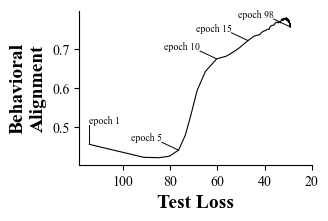

In [14]:
# Plot the baseline data's behavioral alignment vs validation loss

plt.plot(baseline_df['test_loss'], baseline_df['behavioral_rsa_rho'], linewidth=.8, color='black')
# Plot only the first 15 epochs as points
#scatter = plt.scatter(baseline_df['test_loss'][:15], baseline_df['behavioral_rsa_rho'][:15], s=15, color='black')

# Label only epochs 1, 5, 10, and 15 (if they exist)
label_epochs = [1, 5, 10, 15, 98]
for i in range(min(98, len(baseline_df))):
    epoch = baseline_df['epoch'].iloc[i]
    if epoch in label_epochs:
        x = baseline_df['test_loss'].iloc[i]
        y = baseline_df['behavioral_rsa_rho'].iloc[i]
        # Calculate coordinates for the label
        # Make epoch 1 label further to the right (since x-axis is inverted, larger x = further right)
        if epoch == 1:
            label_x = x  
            label_y = y + 0.05
            ha = 'left'
        else:
            label_x = x + 7
            label_y = y + 0.02
            ha = 'right'
        plt.text(label_x, label_y, f'epoch {str(epoch)}', fontsize=7, ha=ha, va='bottom')
        # Draw a line connecting the label to the point
        plt.plot([x, label_x], [y, label_y], color='black', linewidth=0.7, zorder=2)

# Reverse the x-axis
ax = plt.gca()
ax.invert_xaxis()
#plt.title('CLIP-HBA-Behavior Fine-Tuning', fontweight='bold')
plt.xlabel('Test Loss', fontweight='bold', fontsize=14)
plt.ylabel('Behavioral\nAlignment', fontweight='bold', fontsize=14)
plt.gcf().set_size_inches(3, 2)

# Remove the top and right spines (borders)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set x-axis ticks to count by 10s
xmin, xmax = ax.get_xlim()
# Ensure ticks are in decreasing order since x-axis is inverted
if xmin > xmax:
    xticks = np.arange(int(xmin // 20) * 20, int(xmax // 20) * 20 - 1, -20)
else:
    xticks = np.arange(int(xmin // 20) * 20, int(xmax // 20) * 20 + 1, 20)
ax.set_xticks(xticks)

plt.show()

### Now plot Behavioral Alignment vs. Epoch.

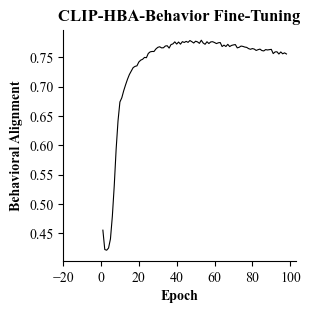

In [7]:
# Plot the baseline data's behavioral alignment vs validation loss

plt.plot(baseline_df['epoch'], baseline_df['behavioral_rsa_rho'], linewidth=.8, color='black')

ax = plt.gca()
plt.title('CLIP-HBA-Behavior Fine-Tuning', fontweight='bold')
plt.xlabel('Epoch', fontweight='bold')
plt.ylabel('Behavioral Alignment', fontweight='bold')
plt.gcf().set_size_inches(3, 3)

# Remove the top and right spines (borders)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set x-axis ticks to count by 10s
xmin, xmax = ax.get_xlim()
# Ensure ticks are in decreasing order since x-axis is inverted
if xmin > xmax:
    xticks = np.arange(int(xmin // 20) * 20, int(xmax // 20) * 20 - 1, -20)
else:
    xticks = np.arange(int(xmin // 20) * 20, int(xmax // 20) * 20 + 1, 20)
ax.set_xticks(xticks)

plt.show()

### Now plot Behavioral Alignmeent and Test Loss on two y-axes with Epoch on the x-axis.

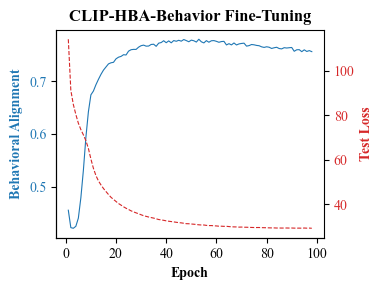

In [11]:
fig, ax1 = plt.subplots(figsize=(4, 3))

color1 = 'tab:blue'
ax1.set_xlabel('Epoch', fontweight='bold')
ax1.set_ylabel('Behavioral Alignment', color=color1, fontweight='bold')
ax1.plot(baseline_df['epoch'], baseline_df['behavioral_rsa_rho'], color=color1, linewidth=.8, label='Behavioral Alignment')
ax1.tick_params(axis='y', labelcolor=color1)

# Remove the top and right spines
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# Second y-axis for test loss
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('Test Loss', color=color2, fontweight='bold')
ax2.plot(baseline_df['epoch'], baseline_df['test_loss'], color=color2, linewidth=.8, linestyle='--', label='Test Loss')
ax2.tick_params(axis='y', labelcolor=color2)

plt.title('CLIP-HBA-Behavior Fine-Tuning', fontweight='bold')
plt.tight_layout()
plt.show()


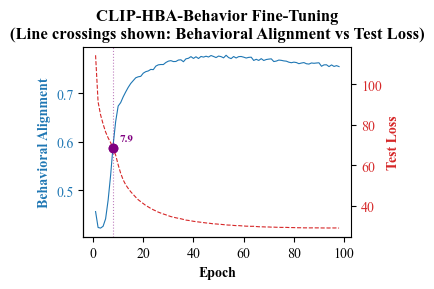

In [12]:
fig, ax1 = plt.subplots(figsize=(4, 3))

color1 = 'tab:blue'
color2 = 'tab:red'

ax1.set_xlabel('Epoch', fontweight='bold')
ax1.set_ylabel('Behavioral Alignment', color=color1, fontweight='bold')
line1, = ax1.plot(baseline_df['epoch'], baseline_df['behavioral_rsa_rho'], color=color1, linewidth=.8, label='Behavioral Alignment')
ax1.tick_params(axis='y', labelcolor=color1)

# Remove the top and right spines
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# Second y-axis for test loss
ax2 = ax1.twinx()
ax2.set_ylabel('Test Loss', color=color2, fontweight='bold')
line2, = ax2.plot(baseline_df['epoch'], baseline_df['test_loss'], color=color2, linewidth=.8, linestyle='--', label='Test Loss')
ax2.tick_params(axis='y', labelcolor=color2)

# Show where the lines cross (project Test Loss to Behavioral Alignment scale for crossing)
# We'll interpolate both to the same scale using MinMax for visualization of crossing
from sklearn.preprocessing import MinMaxScaler

epochs = baseline_df['epoch'].to_numpy()
ba = baseline_df['behavioral_rsa_rho'].to_numpy()
tl = baseline_df['test_loss'].to_numpy()

# Min-max both lines to the same (0, 1) range for crossing detection
scaler = MinMaxScaler()
ba_norm = scaler.fit_transform(ba.reshape(-1, 1)).flatten()
tl_norm = scaler.fit_transform(tl.reshape(-1, 1)).flatten()

# Find crossings (where the difference changes sign)
diff = ba_norm - tl_norm
crossings = np.where(np.diff(np.sign(diff)))[0]

for idx in crossings:
    # Linear interpolation for the crossing x (epoch)
    x0, x1 = epochs[idx], epochs[idx+1]
    y0_ba, y1_ba = ba_norm[idx], ba_norm[idx+1]
    y0_tl, y1_tl = tl_norm[idx], tl_norm[idx+1]
    # The crossing is when (y_ba - y_tl) == 0 -> find alpha
    denom = (y1_ba - y0_ba) - (y1_tl - y0_tl)
    if denom != 0:
        alpha = (y0_tl - y0_ba) / denom
        cross_epoch = x0 + alpha * (x1 - x0)
    else:
        cross_epoch = (x0 + x1) / 2

    # Now get value for Behavioral Alignment and Test Loss at this epoch (interpolated)
    ba_cross = ba[idx] + (ba[idx+1] - ba[idx]) * alpha
    tl_cross = tl[idx] + (tl[idx+1] - tl[idx]) * alpha

    # Plot on both axes
    ax1.plot(cross_epoch, ba_cross, 'o', color='purple', markersize=6, zorder=5)
    ax2.plot(cross_epoch, tl_cross, 'o', color='purple', markersize=6, zorder=5)
    # Dashed line
    ax1.axvline(cross_epoch, color='purple', linestyle=':', linewidth=0.8, alpha=0.5)
    ax1.annotate(f'{cross_epoch:.1f}', (cross_epoch, ba_cross), color='purple',
                 xytext=(5,5), textcoords='offset points', fontsize=8, fontweight='bold')

plt.title('CLIP-HBA-Behavior Fine-Tuning\n(Line crossings shown: Behavioral Alignment vs Test Loss)', fontweight='bold')
plt.tight_layout()
plt.show()

## Baseline neural results

In [5]:
# read in the neural alignment results from the baseline training run
baseline_neural_alignment_results = pd.read_csv('./baseline_brain_rsa_results.csv')
print(baseline_neural_alignment_results)


      epoch   roi       rho       p_value
0         1    V3 -0.008457  2.273970e-09
1         1   FFC  0.134525  0.000000e+00
2         1   LO3  0.078347  0.000000e+00
3         1   PIT  0.096469  0.000000e+00
4         1    V2  0.006478  4.681941e-06
...     ...   ...       ...           ...
1367     98   VVC  0.011358  9.961243e-16
1368     98    V1  0.013390  2.976495e-21
1369     98   LO1  0.075666  0.000000e+00
1370     98  VMV2  0.015696  1.345096e-28
1371     98  VMV3 -0.011128  3.700983e-15

[1372 rows x 4 columns]


In [9]:
# join the baseline_df with the baseline_neural_alignment_results on the epoch column
baseline_neural_behavioral_merged = pd.merge(baseline_df, baseline_neural_alignment_results, on='epoch', how='left')
print(baseline_neural_behavioral_merged)


      epoch  train_loss   test_loss  behavioral_rsa_rho  \
0         1  143.198375  114.267337            0.455443   
1         1  143.198375  114.267337            0.455443   
2         1  143.198375  114.267337            0.455443   
3         1  143.198375  114.267337            0.455443   
4         1  143.198375  114.267337            0.455443   
...     ...         ...         ...                 ...   
1367     98   17.214430   29.101309            0.755587   
1368     98   17.214430   29.101309            0.755587   
1369     98   17.214430   29.101309            0.755587   
1370     98   17.214430   29.101309            0.755587   
1371     98   17.214430   29.101309            0.755587   

      behavioral_rsa_p_value   roi       rho       p_value  
0               7.497325e-59    V3 -0.008457  2.273970e-09  
1               7.497325e-59   FFC  0.134525  0.000000e+00  
2               7.497325e-59   LO3  0.078347  0.000000e+00  
3               7.497325e-59   PIT  0.096469  0

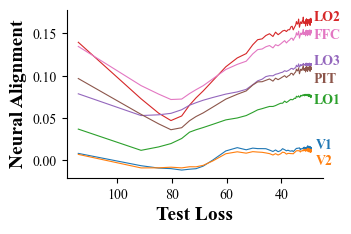

In [13]:


roi_order = ['V1', 'V2', 'LO1', 'LO2', 'LO3', 'PIT', 'FFC']
roi_text_labels = {'V1', 'V2', 'LO1', 'LO2', 'LO3', 'PIT', 'FFC'}

# For ROIs not to be shown in legend, we'll collect handles and labels separately
handles = []
labels = []

for idx, roi in enumerate(roi_order):
    if roi in baseline_neural_behavioral_merged['roi'].unique():
        roi_df = baseline_neural_behavioral_merged[baseline_neural_behavioral_merged['roi'] == roi]
        # Plot the line for this ROI, but only include in legend if not in roi_text_labels
        if roi in roi_text_labels:
            handle, = plt.plot(roi_df['test_loss'], roi_df['rho'], linestyle='-', linewidth=0.8)
        else:
            handle, = plt.plot(roi_df['test_loss'], roi_df['rho'], linestyle='-', label=roi)
            handles.append(handle)
            labels.append(roi)
        # Only add text labels for selected ROIs
        if roi in roi_text_labels and not roi_df.empty:
            x = roi_df['test_loss'].iloc[-1] - 5
            y = roi_df['rho'].iloc[-1]

            if roi == "V2":
                y = y - 0.016

            elif roi == "LO1":
                y = y - 0.009
                x = x - 1

            elif roi == "PIT":
                y = y - 0.018

            elif roi == "FFC":
                y = y - 0.009
                x = x - 1

            elif roi == "LO2":
                y = y - 0.001
                x = x - 1
            
            elif roi == "LO3":
                x = x - 1

            plt.text(
                x,                     # directly above the last point's epoch
                y,                 # nudge farther downward for clarity
                roi,
                color=handle.get_color(),
                #va=va,                 # position label just above/below the marker
                ha='center',
                fontsize=10,
                fontweight='bold',
                bbox=dict(facecolor='white', edgecolor='none', pad=0.2, alpha=0.7)
            )

plt.xlabel('Test Loss', fontweight='bold', fontsize=14)
plt.ylabel('Neural Alignment', fontweight='bold', fontsize=14)
#plt.title('CLIP-HBA-Behavior Neural Alignment with NOD fMRI Activations', fontweight='bold', fontsize=16)
if handles and labels:
    plt.legend(handles, labels, title='ROI', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()

# Flip the x-axis so that loss goes from high to low
ax = plt.gca()
ax.invert_xaxis()

# # Label only epochs 1, 5, 10, and 15 (if they exist)
# label_epochs = [1, 5, 10, 15, 98]
# for i in range(len(baseline_neural_behavioral_merged)):
#     epoch = baseline_neural_behavioral_merged['epoch'].iloc[i]
#     roi = baseline_neural_behavioral_merged['roi'].iloc[i]
#     if epoch in label_epochs and roi == "LO2":
#         x = baseline_neural_behavioral_merged['test_loss'].iloc[i]
#         y = baseline_neural_behavioral_merged['rho'].iloc[i]
#         # Calculate coordinates for the label
#         # Make epoch 1 label further to the right (since x-axis is inverted, larger x = further right)
#         if epoch == 1:
#             label_x = x  
#             label_y = y + 0.02
#             ha = 'left'
#         elif epoch == 5:
#             label_x = x + 4
#             label_y = y + 0.05
#             ha = 'right'
#         else:
#             label_x = x + 7
#             label_y = y + 0.02
#             ha = 'right'
#         plt.text(label_x, label_y, f'epoch {str(epoch)}', fontsize=7, ha=ha, va='bottom')
#         # Draw a line connecting the label to the point
#         plt.plot([x, label_x], [y, label_y], color='black', linewidth=0.7, zorder=2)

# Remove the top and right spines (borders)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.gcf().set_size_inches(3, 2)

plt.show()

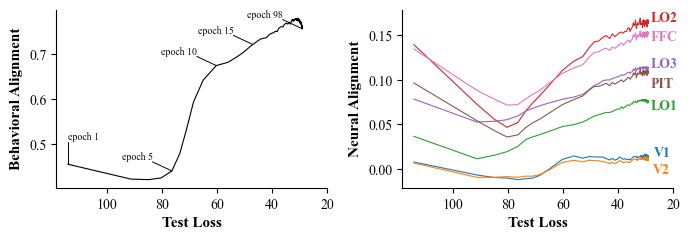

In [11]:
# Create two subplots: left for behavioral alignment, right for neural alignment

fig, axes = plt.subplots(1, 2, figsize=(7, 2.5), sharex=False)  # Make two subfigures; each axis size 2x1.75

################### Behavioral Alignment Plot (Left subplot) ###################
ax0 = axes[0]
ax = ax0  # for clarity

# Add subplot label "A."
# ax.text(-0.13, 1.07, "A.", transform=ax.transAxes, fontsize=15, fontweight='bold', va='top', ha='left')

ax.plot(baseline_df['test_loss'], baseline_df['behavioral_rsa_rho'], linewidth=.8, color='black')

# Label only epochs 1, 5, 10, and 15 (if they exist)
label_epochs = [1, 5, 10, 15, 98]
for i in range(min(98, len(baseline_df))):
    epoch = baseline_df['epoch'].iloc[i]
    if epoch in label_epochs:
        x = baseline_df['test_loss'].iloc[i]
        y = baseline_df['behavioral_rsa_rho'].iloc[i]
        # Calculate coordinates for the label
        if epoch == 1:
            label_x = x  
            label_y = y + 0.05
            ha = 'left'
        else:
            label_x = x + 7
            label_y = y + 0.02
            ha = 'right'
        ax.text(label_x, label_y, f'epoch {str(epoch)}', fontsize=7, ha=ha, va='bottom')
        ax.plot([x, label_x], [y, label_y], color='black', linewidth=0.7, zorder=2)

# Reverse the x-axis
ax.invert_xaxis()
ax.set_xlabel('Test Loss', fontweight='bold', fontsize=11)
ax.set_ylabel('Behavioral Alignment', fontweight='bold', fontsize=11)

# Remove the top and right spines (borders)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Set x-axis ticks to count by 20s (preserve logic from original)
xmin, xmax = ax.get_xlim()
if xmin > xmax:
    xticks = np.arange(int(xmin // 20) * 20, int(xmax // 20) * 20 - 1, -20)
else:
    xticks = np.arange(int(xmin // 20) * 20, int(xmax // 20) * 20 + 1, 20)
ax.set_xticks(xticks)

################### Neural Alignment Plot (Right subplot) ###################
ax1 = axes[1]
ax = ax1  # for clarity

# Add subplot label "B."
# ax.text(-0.13, 1.07, "B.", transform=ax.transAxes, fontsize=15, fontweight='bold', va='top', ha='left')

roi_order = ['V1', 'V2', 'LO1', 'LO2', 'LO3', 'PIT', 'FFC']
roi_text_labels = {'V1', 'V2', 'LO1', 'LO2', 'LO3', 'PIT', 'FFC'}

handles = []
labels = []

for idx, roi in enumerate(roi_order):
    if roi in baseline_neural_behavioral_merged['roi'].unique():
        roi_df = baseline_neural_behavioral_merged[baseline_neural_behavioral_merged['roi'] == roi]
        if roi in roi_text_labels:
            handle, = ax.plot(roi_df['test_loss'], roi_df['rho'], linestyle='-', linewidth=0.8)
        else:
            handle, = ax.plot(roi_df['test_loss'], roi_df['rho'], linestyle='-', label=roi)
            handles.append(handle)
            labels.append(roi)
        # Only add text labels for selected ROIs
        if roi in roi_text_labels and not roi_df.empty:
            x = roi_df['test_loss'].iloc[-1] - 5
            y = roi_df['rho'].iloc[-1]

            if roi == "V2":
                y = y - 0.016
            elif roi == "LO1":
                y = y - 0.009
                x = x - 1
            elif roi == "PIT":
                y = y - 0.018
            elif roi == "FFC":
                y = y - 0.009
                x = x - 1
            elif roi == "LO2":
                y = y - 0.001
                x = x - 1
            elif roi == "LO3":
                x = x - 1

            ax.text(
                x,
                y,
                roi,
                color=handle.get_color(),
                ha='center',
                fontsize=10,
                fontweight='bold',
                bbox=dict(facecolor='white', edgecolor='none', pad=0.2, alpha=0.7)
            )

ax.set_xlabel('Test Loss', fontweight='bold', fontsize=11)
ax.set_ylabel('Neural Alignment', fontweight='bold', fontsize=11)
if handles and labels:
    ax.legend(handles, labels, title='ROI', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize=7, title_fontsize=8)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.invert_xaxis()

# Match x-tick logic for this subplot too (optional: you can use the same code as above)
xmin, xmax = ax.get_xlim()
if xmin > xmax:
    xticks = np.arange(int(xmin // 20) * 20, int(xmax // 20) * 20 - 1, -20)
else:
    xticks = np.arange(int(xmin // 20) * 20, int(xmax // 20) * 20 + 1, 20)
ax.set_xticks(xticks)

################### Final subplot formatting ###################
plt.tight_layout()
plt.show()

## Single epoch perturbation sweep behavioral results

Load the results from the singel epoch perturbation sweep.

In [82]:
# Set up paths 
results_dir = Path('/home/wallacelab/teba/multimodal_brain_inspired/marren/temporal_dynamics_of_human_alignment/clip_hba_behavior_loops/20251016_125025')

# Find all training run directories from the single epoch perturbation sweep
run_dirs = sorted([d for d in results_dir.glob('training_run*') if d.is_dir()],
                  key=lambda x: int(x.name.split('run')[1]))

print(f"Found {len(run_dirs)} training runs:")
for run_dir in run_dirs:
    print(f"  - {run_dir.name}")


Found 98 training runs:
  - training_run1
  - training_run2
  - training_run3
  - training_run4
  - training_run5
  - training_run6
  - training_run7
  - training_run8
  - training_run9
  - training_run10
  - training_run11
  - training_run12
  - training_run13
  - training_run14
  - training_run15
  - training_run16
  - training_run17
  - training_run18
  - training_run19
  - training_run20
  - training_run21
  - training_run22
  - training_run23
  - training_run24
  - training_run25
  - training_run26
  - training_run27
  - training_run28
  - training_run29
  - training_run30
  - training_run31
  - training_run32
  - training_run33
  - training_run34
  - training_run35
  - training_run36
  - training_run37
  - training_run38
  - training_run39
  - training_run40
  - training_run41
  - training_run42
  - training_run43
  - training_run44
  - training_run45
  - training_run46
  - training_run47
  - training_run48
  - training_run49
  - training_run50
  - training_run51
  - training_run

In [83]:

# Load data from all training runs
training_run_data = {}

for run_dir in run_dirs:
    run_name = run_dir.name
    run_num = run_name.split('run')[1]
    csv_file = run_dir / f"training_res_run{run_num}.csv"
    
    if csv_file.exists():
        df = pd.read_csv(csv_file)
        
        if len(df) > 0:
            training_run_data[run_name] = df
            print(f"{run_name}: {len(df)} epochs with valid data")
        else:
            print(f"{run_name}: No valid data found (all NaN)")
    else:
        print(f"{run_name}: CSV file not found")

print(f"\nTotal runs with valid data: {len(training_run_data)}")


training_run1: 108 epochs with valid data
training_run2: 107 epochs with valid data
training_run3: 94 epochs with valid data
training_run4: 93 epochs with valid data
training_run5: 92 epochs with valid data
training_run6: 91 epochs with valid data
training_run7: 90 epochs with valid data
training_run8: 87 epochs with valid data
training_run9: 86 epochs with valid data
training_run10: 85 epochs with valid data
training_run11: 84 epochs with valid data
training_run12: 83 epochs with valid data
training_run13: 82 epochs with valid data
training_run14: 81 epochs with valid data
training_run15: 80 epochs with valid data
training_run16: 79 epochs with valid data
training_run17: 78 epochs with valid data
training_run18: 77 epochs with valid data
training_run19: 76 epochs with valid data
training_run20: 75 epochs with valid data
training_run21: 74 epochs with valid data
training_run22: 73 epochs with valid data
training_run23: 72 epochs with valid data
training_run24: 71 epochs with valid data

In [23]:
print(baseline_df)

    epoch  train_loss   test_loss  behavioral_rsa_rho  behavioral_rsa_p_value
0       1  143.198375  114.267337            0.455443            7.497325e-59
1       2   99.003030   91.310430            0.422459            4.797240e-50
2       3   88.155927   84.871568            0.421268            9.572966e-50
3       4   82.863315   80.375895            0.425018            1.076738e-50
4       5   78.583811   76.447118            0.440511            9.591843e-55
..    ...         ...         ...                 ...                     ...
93     94   17.675313   29.133197            0.755533           4.658267e-209
94     95   17.545072   29.212518            0.759054           4.063549e-212
95     96   17.450050   29.148153            0.755926           2.132139e-209
96     97   17.317206   29.184973            0.757532           8.660125e-211
97     98   17.214430   29.101309            0.755587           4.177484e-209

[98 rows x 5 columns]


### To account for the epochs that were recorded before early stopping was triggered, but after the the minimum test loss was reached, remove all the rows of each training run after the minimum test loss of that run.

In [84]:

all_data = {}

for run_name, df in training_run_data.items():
    if len(df) == 0:
        all_data[run_name] = df
        continue

    # Find the epoch with minimum test loss
    min_test_loss_idx = df['test_loss'].idxmin()

    # Keep all rows up to and including the minimum test loss epoch
    filtered_df = df.loc[:min_test_loss_idx].copy()

    all_data[run_name] = filtered_df

    # Print info about the filtering
    original_epochs = len(df)
    filtered_epochs = len(filtered_df)
    removed_epochs = original_epochs - filtered_epochs
    print(f"{run_name}: {original_epochs} -> {filtered_epochs} epochs "
            f"(removed {removed_epochs} epochs after minimum test loss)")

training_run1: 108 -> 98 epochs (removed 10 epochs after minimum test loss)
training_run2: 107 -> 97 epochs (removed 10 epochs after minimum test loss)
training_run3: 94 -> 84 epochs (removed 10 epochs after minimum test loss)
training_run4: 93 -> 83 epochs (removed 10 epochs after minimum test loss)
training_run5: 92 -> 82 epochs (removed 10 epochs after minimum test loss)
training_run6: 91 -> 81 epochs (removed 10 epochs after minimum test loss)
training_run7: 90 -> 80 epochs (removed 10 epochs after minimum test loss)
training_run8: 87 -> 77 epochs (removed 10 epochs after minimum test loss)
training_run9: 86 -> 76 epochs (removed 10 epochs after minimum test loss)
training_run10: 85 -> 75 epochs (removed 10 epochs after minimum test loss)
training_run11: 84 -> 74 epochs (removed 10 epochs after minimum test loss)
training_run12: 83 -> 73 epochs (removed 10 epochs after minimum test loss)
training_run13: 82 -> 72 epochs (removed 10 epochs after minimum test loss)
training_run14: 81 

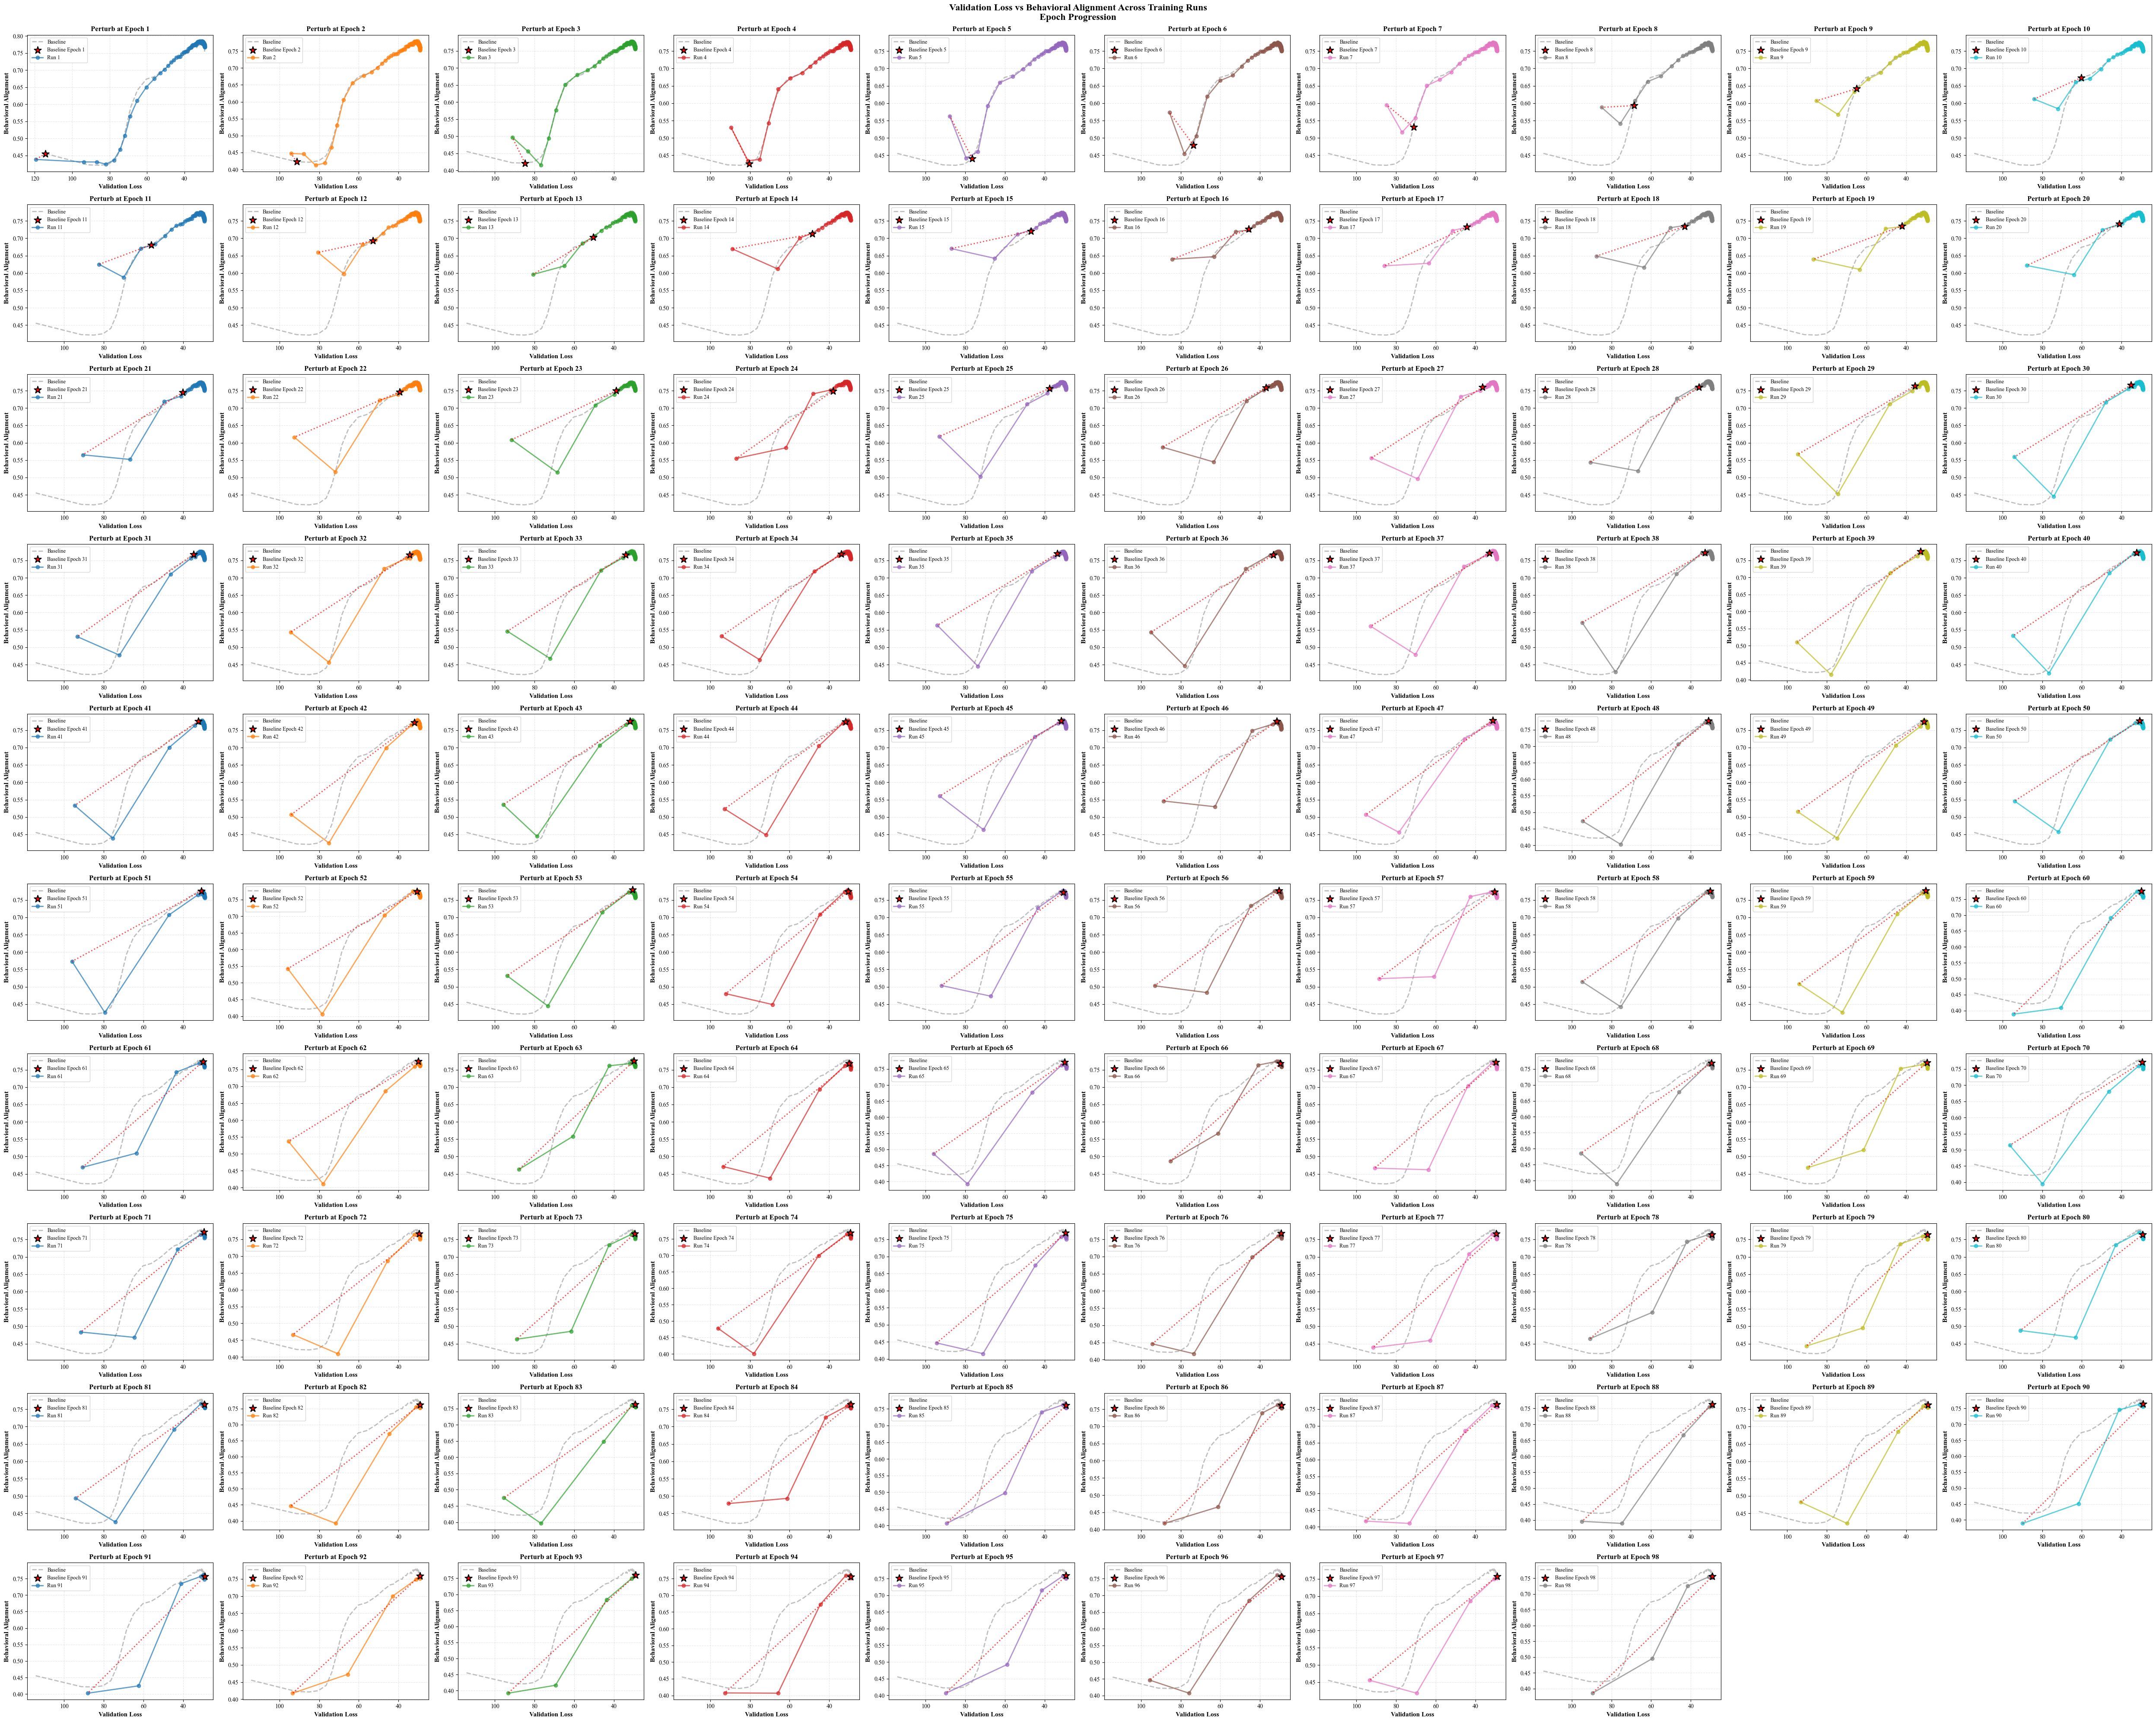

In [85]:
# Create multi-panel figure with separate subplot for each training run
n_runs = len(all_data)

# Determine grid layout (try to make it roughly square)
n_cols = int(np.ceil(np.sqrt(n_runs)))
n_rows = int(np.ceil(n_runs / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))

# Flatten axes array for easier indexing
if n_runs > 1:
    axes = axes.flatten()
else:
    axes = [axes]

# Use a consistent color scheme
colors = plt.cm.tab10(np.linspace(0, 1, 10))

for idx, (run_name, df) in enumerate(all_data.items()):
    ax = axes[idx]
    
    # Sort by epoch to ensure proper line connection
    df_sorted = df.sort_values('epoch')
    
    # Extract run number for title
    run_num = run_name.split('run')[1]
    perturb_epoch = int(run_num)
    
    # Plot baseline first if available
    baseline_at_perturb = None
    if baseline_df is not None:
        baseline_sorted = baseline_df.sort_values('epoch')
        ax.plot(baseline_sorted['test_loss'], 
                baseline_sorted['behavioral_rsa_rho'],
                linestyle='--',
                linewidth=2,
                color='gray',
                alpha=0.5,
                label='Baseline',
                zorder=1)
        
        # Mark the perturbation epoch on the baseline
        baseline_at_perturb = baseline_df[baseline_df['epoch'] == perturb_epoch]
        if len(baseline_at_perturb) > 0:
            baseline_point = baseline_at_perturb.iloc[0]
            ax.scatter(baseline_point['test_loss'], 
                      baseline_point['behavioral_rsa_rho'],
                      s=150, 
                      color='red', 
                      marker='*',
                      edgecolors='black',
                      linewidth=1.5,
                      zorder=5,
                      label=f'Baseline Epoch {perturb_epoch}')
    
    # Plot perturbation run line with markers
    ax.plot(df_sorted['test_loss'], 
            df_sorted['behavioral_rsa_rho'],
            marker='o',
            markersize=6,
            linewidth=2,
            color=colors[idx % 10],
            alpha=0.7,
            label=f'Run {run_num}',
            zorder=2)
    
    # Connect the perturbation epoch on baseline to the corresponding epoch in perturbation run
    first_epoch = df_sorted.iloc[0]
    last_epoch = df_sorted.iloc[-1]
    
    if baseline_at_perturb is not None and len(baseline_at_perturb) > 0:
        # Draw connection line from baseline to perturbation run
        perturb_run_at_epoch = df_sorted[df_sorted['epoch'] == perturb_epoch]
        if len(perturb_run_at_epoch) > 0:
            perturb_point = perturb_run_at_epoch.iloc[0]
            ax.plot([baseline_point['test_loss'], perturb_point['test_loss']],
                   [baseline_point['behavioral_rsa_rho'], perturb_point['behavioral_rsa_rho']],
                   color='red',
                   linestyle=':',
                   linewidth=2,
                   alpha=0.7,
                   zorder=4)
    
    # Formatting
    ax.set_xlabel('Validation Loss', fontsize=11, fontweight='bold')
    ax.set_ylabel('Behavioral Alignment', fontsize=11, fontweight='bold')
    ax.set_title(f'Perturb at Epoch {run_num}', # ({len(df_sorted)} epochs: {int(df_sorted["epoch"].min())}-{int(df_sorted["epoch"].max())})', 
                 fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.legend(loc='best', fontsize=9, framealpha=0.8)
    
    # Flip x-axis so loss goes from high to low
    ax.invert_xaxis()

# Hide any unused subplots
for idx in range(n_runs, len(axes)):
    axes[idx].set_visible(False)

# Add overall title
fig.suptitle('Validation Loss vs Behavioral Alignment Across Training Runs\nEpoch Progression', 
             fontsize=16, fontweight='bold', y=0.995)

plt.tight_layout()
plt.show()


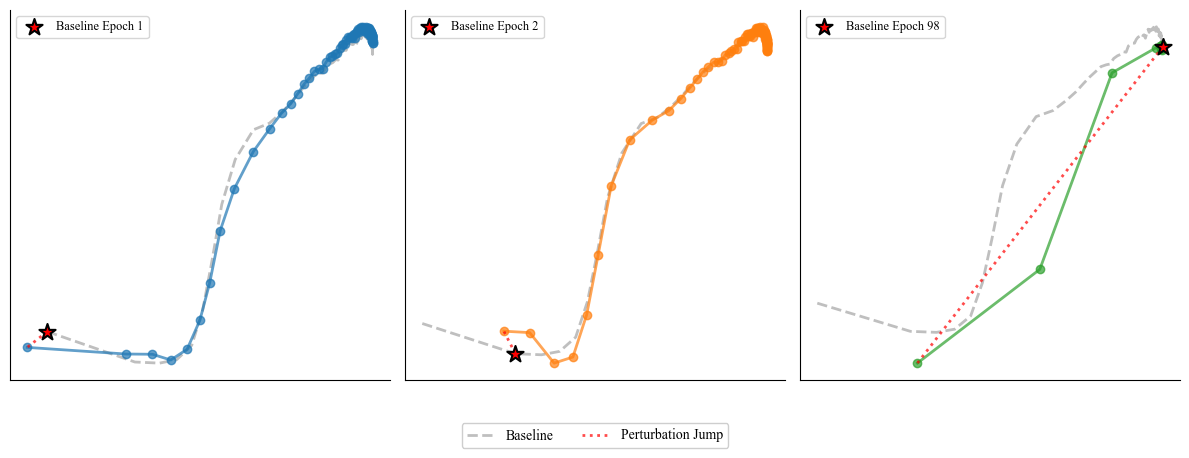

In [86]:
# Making example figures for the schematic
# Only show the first two figures (runs) and the last (epoch 98), in one row.
# Keep both x and y axes for all plots; remove background and the outer square border ("frame").
# TAKE AWAY ALL AXES TEXT AND LABELS.

run_names = list(all_data.keys())
if len(run_names) < 3:
    runs_to_show = run_names
else:
    runs_to_show = [run_names[0], run_names[1], run_names[-1]]

n_show = len(runs_to_show)
n_cols = n_show
fig_width_per_plot = 4
fig, axes = plt.subplots(1, n_cols, figsize=(fig_width_per_plot * n_cols, 4), squeeze=False)
axes = axes[0]

colors = plt.cm.tab10(np.linspace(0, 1, 10))

# For the figure-level legend at the bottom (only once)
fig_legend_handles = []
fig_legend_labels = []
used_legend_labels = set()

for idx, run_name in enumerate(runs_to_show):
    ax = axes[idx]
    df = all_data[run_name]
    df_sorted = df.sort_values('epoch')
    run_num = run_name.split('run')[1]
    perturb_epoch = int(run_num)

    # Frameless look: remove background and outer spines
    ax.set_facecolor('none')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Remove axis text and labels
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title('')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])

    # Handles for per-axis legend (for the baseline epoch star only)
    ax_legend_handles = []
    ax_legend_labels = []

    # Plot baseline if available
    baseline_at_perturb = None
    baseline_point = None
    if baseline_df is not None:
        baseline_sorted = baseline_df.sort_values('epoch')
        baseline_label = 'Baseline'
        baseline_line, = ax.plot(
            baseline_sorted['test_loss'],
            baseline_sorted['behavioral_rsa_rho'],
            linestyle='--',
            linewidth=2,
            color='gray',
            alpha=0.5,
            label=baseline_label,
            zorder=1
        )
        if baseline_label not in used_legend_labels:
            fig_legend_handles.append(baseline_line)
            fig_legend_labels.append(baseline_label)
            used_legend_labels.add(baseline_label)
        baseline_at_perturb = baseline_df[baseline_df['epoch'] == perturb_epoch]

        # Mark the perturbation epoch on the baseline
        if len(baseline_at_perturb) > 0:
            baseline_point = baseline_at_perturb.iloc[0]
            star_label = f'Baseline Epoch {perturb_epoch}'
            baseline_scatter = ax.scatter(
                baseline_point['test_loss'],
                baseline_point['behavioral_rsa_rho'],
                s=150,
                color='red',
                marker='*',
                edgecolors='black',
                linewidth=1.5,
                zorder=5,
                label=star_label
            )
            ax_legend_handles.append(baseline_scatter)
            ax_legend_labels.append(star_label)

    # Plot perturbation run line with markers (NO legend entry)
    ax.plot(df_sorted['test_loss'],
            df_sorted['behavioral_rsa_rho'],
            marker='o',
            markersize=6,
            linewidth=2,
            color=colors[idx % 10],
            alpha=0.7,
            label=None,
            zorder=2)

    # Connect the perturbation epoch on baseline to the corresponding epoch in perturbation run
    first_epoch = df_sorted.iloc[0]
    last_epoch = df_sorted.iloc[-1]

    if baseline_at_perturb is not None and len(baseline_at_perturb) > 0:
        perturb_run_at_epoch = df_sorted[df_sorted['epoch'] == perturb_epoch]
        if len(perturb_run_at_epoch) > 0:
            perturb_point = perturb_run_at_epoch.iloc[0]
            jump_label = 'Perturbation Jump'
            connect_line, = ax.plot(
                [baseline_point['test_loss'], perturb_point['test_loss']],
                [baseline_point['behavioral_rsa_rho'], perturb_point['behavioral_rsa_rho']],
                color='red',
                linestyle=':',
                linewidth=2,
                alpha=0.7,
                zorder=4,
                label=jump_label if jump_label not in used_legend_labels else None
            )
            if jump_label not in used_legend_labels:
                fig_legend_handles.append(connect_line)
                fig_legend_labels.append(jump_label)
                used_legend_labels.add(jump_label)

    # Per-plot legend: only for the star if present
    if ax_legend_handles and ax_legend_labels:
        ax.legend(
            handles=ax_legend_handles,
            labels=ax_legend_labels,
            loc='upper left',
            fontsize=9, framealpha=0.8
        )
    else:
        ax.legend().set_visible(False)  # No legend if no star

    # Flip x-axis so loss goes from high to low
    ax.invert_xaxis()
    # Remove grid lines
    ax.grid(False)

# Hide any unused subplots
for idx in range(n_show, len(axes)):
    axes[idx].set_visible(False)

# Add single legend for all plots at the bottom (only for baseline/jump handles)
if fig_legend_handles and fig_legend_labels:
    fig.legend(
        fig_legend_handles,
        fig_legend_labels,
        loc='lower center',
        ncol=min(len(fig_legend_handles), 5),
        fontsize=10,
        bbox_to_anchor=(0.5, -0.15),
        framealpha=0.95
    )

plt.tight_layout()
plt.show()

In [87]:
# Print summary statistics for all runs
print("\n" + "="*60)
print("SUMMARY STATISTICS")
print("="*60 + "\n")

# Print baseline statistics first
if baseline_df is not None:
    baseline_sorted = baseline_df.sort_values('epoch')
    print("BASELINE (No Perturbations):")
    print(f"  Epochs: {baseline_df['epoch'].min():.0f} - {baseline_df['epoch'].max():.0f} ({len(baseline_df)} total)")
    print(f"  Validation Loss:")
    print(f"    Range: {baseline_df['test_loss'].min():.2f} - {baseline_df['test_loss'].max():.2f}")
    print(f"    Initial: {baseline_sorted.iloc[0]['test_loss']:.2f}")
    print(f"    Final: {baseline_sorted.iloc[-1]['test_loss']:.2f}")
    print(f"  Behavioral Alignment:")
    print(f"    Range: {baseline_df['behavioral_rsa_rho'].min():.4f} - {baseline_df['behavioral_rsa_rho'].max():.4f}")
    print(f"    Initial: {baseline_sorted.iloc[0]['behavioral_rsa_rho']:.4f}")
    print(f"    Final: {baseline_sorted.iloc[-1]['behavioral_rsa_rho']:.4f}")
    print(f"    Change: {(baseline_sorted.iloc[-1]['behavioral_rsa_rho'] - baseline_sorted.iloc[0]['behavioral_rsa_rho']):.4f}")
    print("\n" + "-"*60 + "\n")

for run_name, df in all_data.items():
    run_num = run_name.split('run')[1]
    df_sorted = df.sort_values('epoch')
    
    print(f"Training Run {run_num} (Perturbed at epoch {run_num}):")
    print(f"  Epochs: {df['epoch'].min():.0f} - {df['epoch'].max():.0f} ({len(df)} total)")
    print(f"  Validation Loss:")
    print(f"    Range: {df['test_loss'].min():.2f} - {df['test_loss'].max():.2f}")
    print(f"    Final: {df_sorted.iloc[-1]['test_loss']:.2f}")
    print(f"  Behavioral Alignment:")
    print(f"    Range: {df['behavioral_rsa_rho'].min():.4f} - {df['behavioral_rsa_rho'].max():.4f}")
    print(f"    Initial: {df_sorted.iloc[0]['behavioral_rsa_rho']:.4f}")
    print(f"    Final: {df_sorted.iloc[-1]['behavioral_rsa_rho']:.4f}")
    print(f"    Change: {(df_sorted.iloc[-1]['behavioral_rsa_rho'] - df_sorted.iloc[0]['behavioral_rsa_rho']):.4f}")
    
    # Compare to baseline at same epoch if available
    if baseline_df is not None:
        perturb_epoch = int(run_num)
        baseline_at_perturb = baseline_df[baseline_df['epoch'] == perturb_epoch]
        if len(baseline_at_perturb) > 0:
            baseline_ba = baseline_at_perturb.iloc[0]['behavioral_rsa_rho']
            final_ba = df_sorted.iloc[-1]['behavioral_rsa_rho']
            print(f"  Comparison to baseline at perturbation epoch {perturb_epoch}:")
            print(f"    Baseline BA: {baseline_ba:.4f}")
            print(f"    Final BA after recovery: {final_ba:.4f}")
            print(f"    Difference: {(final_ba - baseline_ba):.4f}")
    print()



SUMMARY STATISTICS

BASELINE (No Perturbations):
  Epochs: 1 - 98 (98 total)
  Validation Loss:
    Range: 29.10 - 114.27
    Initial: 114.27
    Final: 29.10
  Behavioral Alignment:
    Range: 0.4213 - 0.7790
    Initial: 0.4554
    Final: 0.7556
    Change: 0.3001

------------------------------------------------------------

Training Run 1 (Perturbed at epoch 1):
  Epochs: 1 - 98 (98 total)
  Validation Loss:
    Range: 29.10 - 119.47
    Final: 29.10
  Behavioral Alignment:
    Range: 0.4246 - 0.7853
    Initial: 0.4383
    Final: 0.7674
    Change: 0.3291
  Comparison to baseline at perturbation epoch 1:
    Baseline BA: 0.4554
    Final BA after recovery: 0.7674
    Difference: 0.3120

Training Run 2 (Perturbed at epoch 2):
  Epochs: 2 - 98 (97 total)
  Validation Loss:
    Range: 29.17 - 94.16
    Final: 29.17
  Behavioral Alignment:
    Range: 0.4122 - 0.7796
    Initial: 0.4471
    Final: 0.7532
    Change: 0.3061
  Comparison to baseline at perturbation epoch 2:
    Baseline

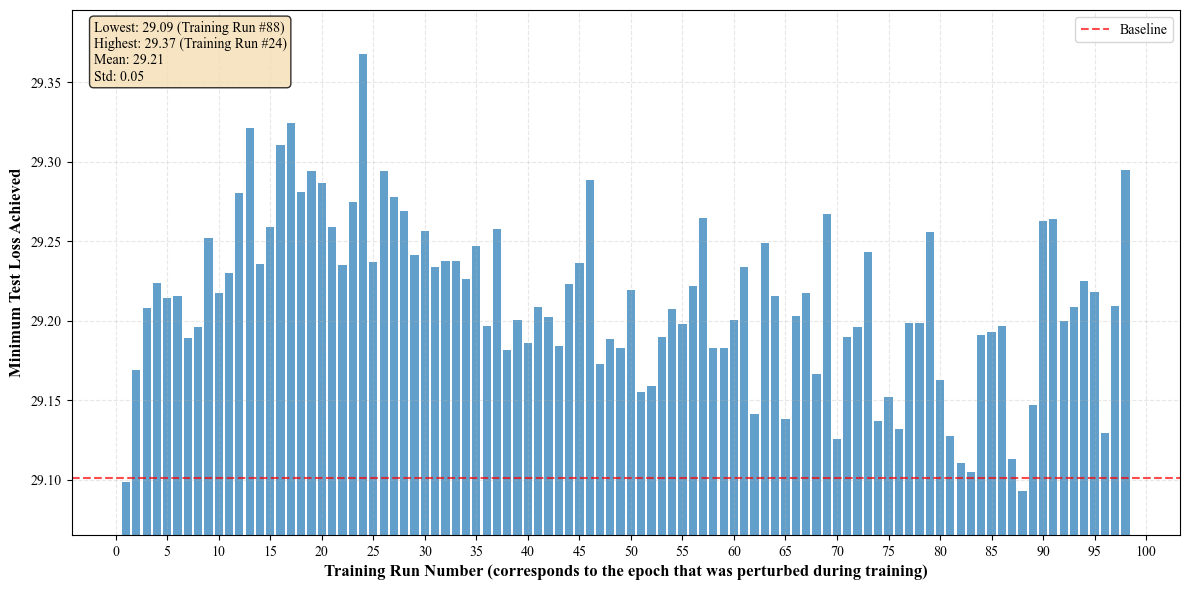


Minimum test loss statistics:
  Overall minimum: 29.09
  Overall maximum: 29.37
  Mean: 29.21
  Standard deviation: 0.05
  Range: 0.28


In [88]:
# Plot the minimum test loss for each run
min_test_losses = []
run_numbers = []

for run_name, df in all_data.items():
    run_num = int(run_name.split('run')[1])
    min_loss = df['test_loss'].min()
    min_test_losses.append(min_loss)
    run_numbers.append(run_num)

# Sort by run number for proper ordering
sorted_data = sorted(zip(run_numbers, min_test_losses))
run_numbers_sorted, min_test_losses_sorted = zip(*sorted_data)

# Create the plot
plt.figure(figsize=(12, 6))
plt.bar(run_numbers_sorted, min_test_losses_sorted, alpha=0.7)
plt.xlabel('Training Run Number (corresponds to the epoch that was perturbed during training)', fontsize=12, fontweight='bold')
plt.ylabel('Minimum Test Loss Achieved', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')
plt.xticks(range(0, 101, 5))

# Add some statistics
min_loss_overall = min(min_test_losses_sorted)
max_loss_overall = max(min_test_losses_sorted)
mean_loss = np.mean(min_test_losses_sorted)
baseline_loss = min(baseline_df['test_loss'])
min_loss_run_num = run_numbers_sorted[min_test_losses_sorted.index(min_loss_overall)]
max_loss_run_num = run_numbers_sorted[min_test_losses_sorted.index(max_loss_overall)]

# set y-axis limits
y_range = max_loss_overall - min_loss_overall
y_margin = y_range * 0.1  # 10% margin
plt.ylim(min_loss_overall - y_margin, max_loss_overall + y_margin)

# Add the red dashed line for baseline (mean)
baseline_loss = plt.axhline(y=baseline_loss, color='red', linestyle='--', alpha=0.7, label='Baseline')

# Add legend including baseline description
plt.legend()

# Add text box with statistics
stats_text = f'Lowest: {min_loss_overall:.2f} (Training Run #{min_loss_run_num})\nHighest: {max_loss_overall:.2f} (Training Run #{max_loss_run_num})\nMean: {mean_loss:.2f}\nStd: {np.std(min_test_losses_sorted):.2f}'
plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
         fontsize=10)

plt.tight_layout()
plt.show()

print(f"\nMinimum test loss statistics:")
print(f"  Overall minimum: {min_loss_overall:.2f}")
print(f"  Overall maximum: {max_loss_overall:.2f}")
print(f"  Mean: {mean_loss:.2f}")
print(f"  Standard deviation: {np.std(min_test_losses_sorted):.2f}")
print(f"  Range: {max_loss_overall - min_loss_overall:.2f}")

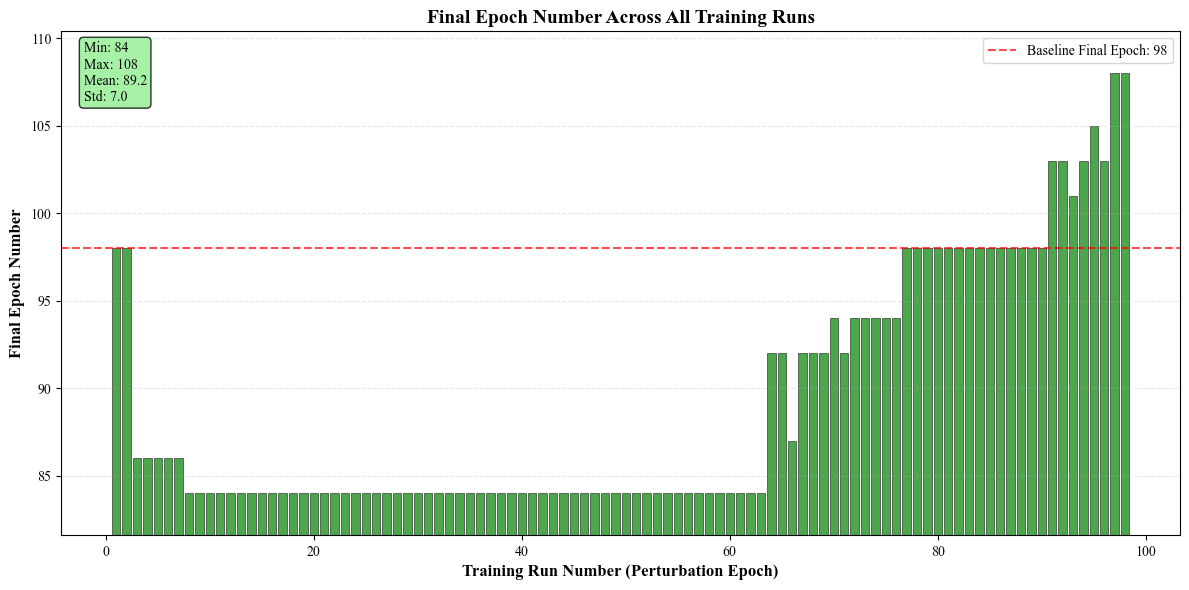


Final epoch statistics:
  Overall minimum: 84
  Overall maximum: 108
  Mean: 89.2
  Standard deviation: 7.0
  Range: 24


In [89]:
# Plot the final epoch number for each training run
final_epochs = []
run_numbers_final = []

for run_name, df in all_data.items():
    run_num = int(run_name.split('run')[1])
    final_epoch = df['epoch'].max()
    final_epochs.append(final_epoch)
    run_numbers_final.append(run_num)

# Sort by run number for proper ordering
sorted_data_final = sorted(zip(run_numbers_final, final_epochs))
run_numbers_final_sorted, final_epochs_sorted = zip(*sorted_data_final)

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(run_numbers_final_sorted, final_epochs_sorted, alpha=0.7, color='green', edgecolor='black', linewidth=0.5)
plt.xlabel('Training Run Number (Perturbation Epoch)', fontsize=12, fontweight='bold')
plt.ylabel('Final Epoch Number', fontsize=12, fontweight='bold')
plt.title('Final Epoch Number Across All Training Runs', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--', axis='y')

# Add some statistics
min_final_overall = min(final_epochs_sorted)
max_final_overall = max(final_epochs_sorted)
baseline_final = baseline_df['epoch'].max()
mean_final = np.mean(final_epochs_sorted)

# Zoom in on the data by setting y-axis limits
y_range_final = max_final_overall - min_final_overall
y_margin_final = y_range_final * 0.1  # 10% margin
plt.ylim(min_final_overall - y_margin_final, max_final_overall + y_margin_final)

plt.axhline(y=baseline_final, color='red', linestyle='--', alpha=0.7, label=f'Baseline Final Epoch: {baseline_final}')
plt.legend()

# Add text box with statistics
stats_text_final = f'Min: {min_final_overall}\nMax: {max_final_overall}\nMean: {mean_final:.1f}\nStd: {np.std(final_epochs_sorted):.1f}'
plt.text(0.02, 0.98, stats_text_final, transform=plt.gca().transAxes, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8),
         fontsize=10)

plt.tight_layout()
plt.show()

print(f"\nFinal epoch statistics:")
print(f"  Overall minimum: {min_final_overall}")
print(f"  Overall maximum: {max_final_overall}")
print(f"  Mean: {mean_final:.1f}")
print(f"  Standard deviation: {np.std(final_epochs_sorted):.1f}")
print(f"  Range: {max_final_overall - min_final_overall}")


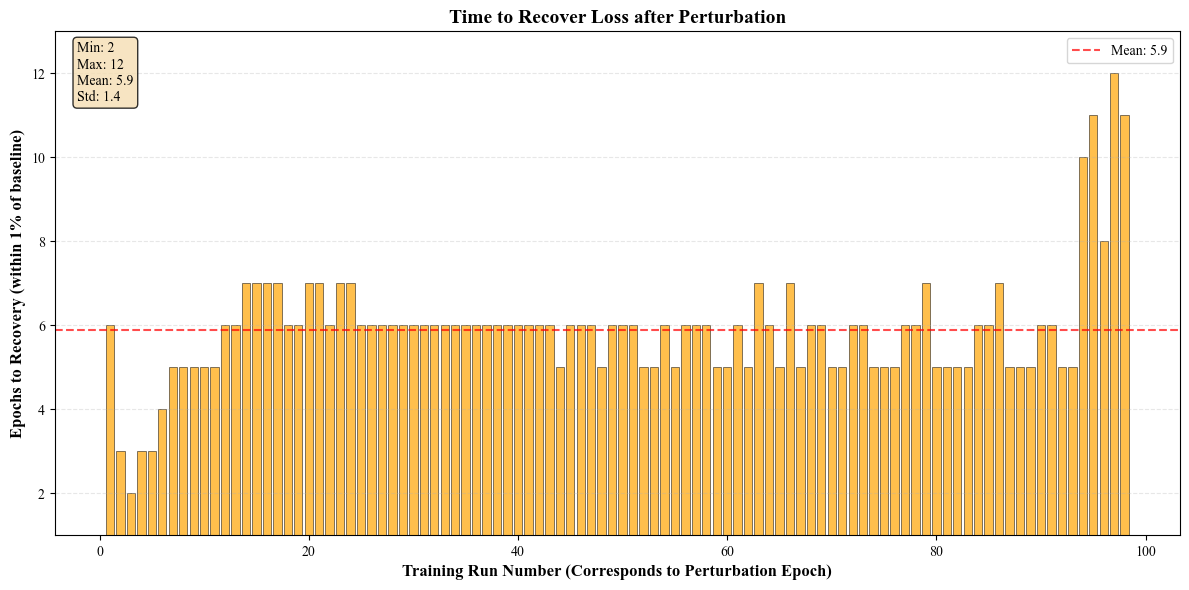


Recovery time statistics (epochs to within 1% of baseline):
  Overall minimum: 2
  Overall maximum: 12
  Mean: 5.9
  Standard deviation: 1.4
  Range: 10

Recovery examples:
  Run 1: 6 epochs to recovery
  Run 2: 3 epochs to recovery
  Run 3: 2 epochs to recovery
  Run 4: 3 epochs to recovery
  Run 5: 3 epochs to recovery


In [90]:
# Plot how many epochs it takes each run to return within 1% of baseline loss
recovery_epochs = []
run_numbers_recovery = []

for run_name, df in all_data.items():
    run_num = int(run_name.split('run')[1])
    
    # Sort the run data by epoch
    df_sorted = df.sort_values('epoch')
    perturb_epoch = int(run_num)
    
    # Find the first epoch where test_loss is within % of baseline at the same epoch
    recovery_epoch = None
    
    for _, row in df_sorted.iterrows():
        current_epoch = int(row['epoch'])
        
        # Get baseline loss at the same epoch
        baseline_at_same_epoch = baseline_df[baseline_df['epoch'] == current_epoch]
        
        if len(baseline_at_same_epoch) > 0:
            baseline_loss = baseline_at_same_epoch.iloc[0]['test_loss']
            target_loss = baseline_loss * 1.01  # Within % of baseline at same epoch
            
            if row['test_loss'] <= target_loss:
                recovery_epoch = current_epoch
                break
    
    if recovery_epoch is not None:
        # Calculate epochs from perturbation to recovery
        epochs_to_recovery = recovery_epoch - perturb_epoch
        recovery_epochs.append(epochs_to_recovery)
        run_numbers_recovery.append(run_num)
    else:
        # If never recovered, use the total epochs trained
        epochs_trained = len(df_sorted)
        recovery_epochs.append(epochs_trained)
        run_numbers_recovery.append(run_num)

# Sort by run number for proper ordering
sorted_data_recovery = sorted(zip(run_numbers_recovery, recovery_epochs))
run_numbers_recovery_sorted, recovery_epochs_sorted = zip(*sorted_data_recovery)

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(run_numbers_recovery_sorted, recovery_epochs_sorted, alpha=0.7, color='orange', edgecolor='black', linewidth=0.5)
plt.xlabel('Training Run Number (Corresponds to Perturbation Epoch)', fontsize=12, fontweight='bold')
plt.ylabel('Epochs to Recovery (within 1% of baseline)', fontsize=12, fontweight='bold')
plt.title('Time to Recover Loss after Perturbation', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--', axis='y')

# Add some statistics
min_recovery_overall = min(recovery_epochs_sorted)
max_recovery_overall = max(recovery_epochs_sorted)
mean_recovery = np.mean(recovery_epochs_sorted)

# Zoom in on the data by setting y-axis limits
y_range_recovery = max_recovery_overall - min_recovery_overall
y_margin_recovery = y_range_recovery * 0.1  # 10% margin
plt.ylim(min_recovery_overall - y_margin_recovery, max_recovery_overall + y_margin_recovery)

plt.axhline(y=mean_recovery, color='red', linestyle='--', alpha=0.7, label=f'Mean: {mean_recovery:.1f}')
plt.legend()

# Add text box with statistics
stats_text_recovery = f'Min: {min_recovery_overall}\nMax: {max_recovery_overall}\nMean: {mean_recovery:.1f}\nStd: {np.std(recovery_epochs_sorted):.1f}'
plt.text(0.02, 0.98, stats_text_recovery, transform=plt.gca().transAxes, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
         fontsize=10)

plt.tight_layout()
plt.show()

print(f"\nRecovery time statistics (epochs to within 1% of baseline):")
print(f"  Overall minimum: {min_recovery_overall}")
print(f"  Overall maximum: {max_recovery_overall}")
print(f"  Mean: {mean_recovery:.1f}")
print(f"  Standard deviation: {np.std(recovery_epochs_sorted):.1f}")
print(f"  Range: {max_recovery_overall - min_recovery_overall}")

# Print some examples for verification
print(f"\nRecovery examples:")
for i in range(min(5, len(run_numbers_recovery_sorted))):
    run_num = run_numbers_recovery_sorted[i]
    recovery_time = recovery_epochs_sorted[i]
    print(f"  Run {run_num}: {recovery_time} epochs to recovery")


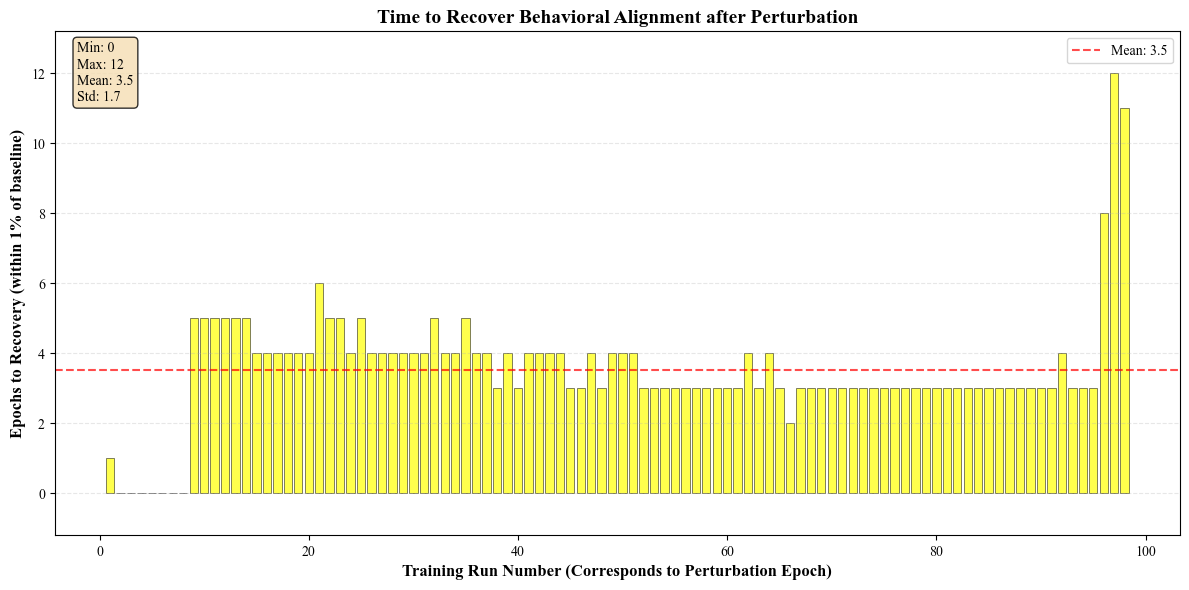


Behavioral alignment recovery time statistics (epochs to within 1% of baseline):
  Overall minimum: 0
  Overall maximum: 12
  Mean: 3.5
  Standard deviation: 1.7
  Range: 12

Behavioral alignment recovery examples:
  Run 1: 1 epochs to recovery
  Run 2: 0 epochs to recovery
  Run 3: 0 epochs to recovery
  Run 4: 0 epochs to recovery
  Run 5: 0 epochs to recovery


In [91]:
# Plot how many epochs it takes each run to return within 1% of baseline behavioral alignment
recovery_epochs_ba = []
run_numbers_recovery_ba = []

for run_name, df in all_data.items():
    run_num = int(run_name.split('run')[1])
    
    # Sort the run data by epoch
    df_sorted = df.sort_values('epoch')
    perturb_epoch = int(run_num)
    
    # Find the first epoch where behavioral_rsa_rho is within 1% of baseline at the same epoch
    recovery_epoch = None
    
    for _, row in df_sorted.iterrows():
        current_epoch = int(row['epoch'])
        
        # Get baseline behavioral alignment at the same epoch
        baseline_at_same_epoch = baseline_df[baseline_df['epoch'] == current_epoch]
        
        if len(baseline_at_same_epoch) > 0:
            baseline_ba = baseline_at_same_epoch.iloc[0]['behavioral_rsa_rho']
            # For behavioral alignment, we want to be within 1% of baseline
            # Since higher is better, we check if run_ba >= baseline_ba * 0.99
            target_ba = baseline_ba * 0.99  # Within 1% of baseline (1% lower)
            
            if row['behavioral_rsa_rho'] >= target_ba:
                recovery_epoch = current_epoch
                break
    
    if recovery_epoch is not None:
        # Calculate epochs from perturbation to recovery
        epochs_to_recovery = recovery_epoch - perturb_epoch
        recovery_epochs_ba.append(epochs_to_recovery)
        run_numbers_recovery_ba.append(run_num)
    else:
        # If never recovered, use the total epochs trained
        epochs_trained = len(df_sorted)
        recovery_epochs_ba.append(epochs_trained)
        run_numbers_recovery_ba.append(run_num)

# Sort by run number for proper ordering
sorted_data_recovery_ba = sorted(zip(run_numbers_recovery_ba, recovery_epochs_ba))
run_numbers_recovery_ba_sorted, recovery_epochs_ba_sorted = zip(*sorted_data_recovery_ba)

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(run_numbers_recovery_ba_sorted, recovery_epochs_ba_sorted, alpha=0.7, color='yellow', edgecolor='black', linewidth=0.5)
plt.xlabel('Training Run Number (Corresponds to Perturbation Epoch)', fontsize=12, fontweight='bold')
plt.ylabel('Epochs to Recovery (within 1% of baseline)', fontsize=12, fontweight='bold')
plt.title('Time to Recover Behavioral Alignment after Perturbation', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--', axis='y')

# Add some statistics
min_recovery_ba_overall = min(recovery_epochs_ba_sorted)
max_recovery_ba_overall = max(recovery_epochs_ba_sorted)
mean_recovery_ba = np.mean(recovery_epochs_ba_sorted)

# Zoom in on the data by setting y-axis limits
y_range_recovery_ba = max_recovery_ba_overall - min_recovery_ba_overall
y_margin_recovery_ba = y_range_recovery_ba * 0.1  # 10% margin
plt.ylim(min_recovery_ba_overall - y_margin_recovery_ba, max_recovery_ba_overall + y_margin_recovery_ba)

plt.axhline(y=mean_recovery_ba, color='red', linestyle='--', alpha=0.7, label=f'Mean: {mean_recovery_ba:.1f}')
plt.legend()

# Add text box with statistics
stats_text_recovery_ba = f'Min: {min_recovery_ba_overall}\nMax: {max_recovery_ba_overall}\nMean: {mean_recovery_ba:.1f}\nStd: {np.std(recovery_epochs_ba_sorted):.1f}'
plt.text(0.02, 0.98, stats_text_recovery_ba, transform=plt.gca().transAxes, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
         fontsize=10)

plt.tight_layout()
plt.show()

print(f"\nBehavioral alignment recovery time statistics (epochs to within 1% of baseline):")
print(f"  Overall minimum: {min_recovery_ba_overall}")
print(f"  Overall maximum: {max_recovery_ba_overall}")
print(f"  Mean: {mean_recovery_ba:.1f}")
print(f"  Standard deviation: {np.std(recovery_epochs_ba_sorted):.1f}")
print(f"  Range: {max_recovery_ba_overall - min_recovery_ba_overall}")

# Print some examples for verification
print(f"\nBehavioral alignment recovery examples:")
for i in range(min(5, len(run_numbers_recovery_ba_sorted))):
    run_num = run_numbers_recovery_ba_sorted[i]
    recovery_time = recovery_epochs_ba_sorted[i]
    print(f"  Run {run_num}: {recovery_time} epochs to recovery")


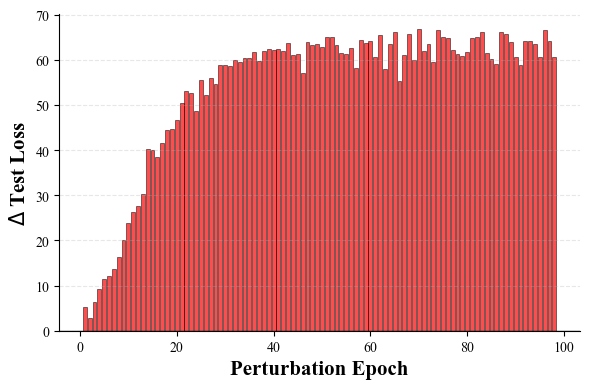


Test loss deviation at perturbation epoch statistics:
  Overall minimum: 2.85
  Overall maximum: 66.68
  Mean: 53.91
  Standard deviation: 16.39
  Range: 63.83

Deviation breakdown:
  Positive deviations (higher loss): 98
  Negative deviations (lower loss): 0
  Zero deviations (same loss): 0

Deviation examples:
  Run 1: +5.20 deviation
  Run 2: +2.85 deviation
  Run 3: +6.33 deviation
  Run 4: +9.14 deviation
  Run 5: +11.36 deviation


In [92]:
# Plot test loss deviation at perturbation epoch compared to baseline
perturbation_deviations = []
run_numbers_deviation = []

for run_name, df in all_data.items():
    run_num = int(run_name.split('run')[1])
    
    perturb_epoch = int(run_num)
    
    # Get test loss at perturbation epoch for this run
    run_at_perturb = df[df['epoch'] == perturb_epoch]
    
    # Get baseline test loss at the same epoch
    baseline_at_perturb = baseline_df[baseline_df['epoch'] == perturb_epoch]
    
    if len(run_at_perturb) > 0 and len(baseline_at_perturb) > 0:
        run_loss = run_at_perturb.iloc[0]['test_loss']
        baseline_loss = baseline_at_perturb.iloc[0]['test_loss']
        
        # Calculate deviation (run - baseline)
        deviation = run_loss - baseline_loss
        perturbation_deviations.append(deviation)
        run_numbers_deviation.append(run_num)

# Sort by run number for proper ordering
sorted_data_deviation = sorted(zip(run_numbers_deviation, perturbation_deviations))
run_numbers_deviation_sorted, perturbation_deviations_sorted = zip(*sorted_data_deviation)

# Create the bar plot
fig, ax = plt.subplots(figsize=(6, 4))
colors = ['red' if dev > 0 else 'green' for dev in perturbation_deviations_sorted]
ax.bar(run_numbers_deviation_sorted, perturbation_deviations_sorted, alpha=0.7, color=colors, edgecolor='black', linewidth=0.5)
ax.set_xlabel('Perturbation Epoch', fontsize=15, fontweight='bold')
ax.set_ylabel('$\Delta$ Test Loss', fontsize=15, fontweight='bold')
#ax.set_title('Test Loss Deviation at Perturbation Epoch', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, linestyle='--', axis='y')

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add zero line
ax.axhline(y=0, color='black', linestyle='-', alpha=0.8, linewidth=1)

# Add some statistics
min_deviation_overall = min(perturbation_deviations_sorted)
max_deviation_overall = max(perturbation_deviations_sorted)
mean_deviation = np.mean(perturbation_deviations_sorted)

# Add mean line
# ax.axhline(y=mean_deviation, color='blue', linestyle='--', alpha=0.7, label=f'Mean: {mean_deviation:.2f}')
# ax.legend()

# Add text box with statistics
# stats_text_deviation = f'Min: {min_deviation_overall:.2f} (Epoch {run_numbers_deviation_sorted[np.argmin(perturbation_deviations_sorted)]})\nMax: {max_deviation_overall:.2f} (Epoch {run_numbers_deviation_sorted[np.argmax(perturbation_deviations_sorted)]})\nMean: {mean_deviation:.2f}\nStd: {np.std(perturbation_deviations_sorted):.2f}'
# ax.text(0.02, 0.98, stats_text_deviation, transform=ax.transAxes, 
#          verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
#          fontsize=10)

plt.tight_layout()
plt.show()

print(f"\nTest loss deviation at perturbation epoch statistics:")
print(f"  Overall minimum: {min_deviation_overall:.2f}")
print(f"  Overall maximum: {max_deviation_overall:.2f}")
print(f"  Mean: {mean_deviation:.2f}")
print(f"  Standard deviation: {np.std(perturbation_deviations_sorted):.2f}")
print(f"  Range: {max_deviation_overall - min_deviation_overall:.2f}")

# Count positive vs negative deviations
positive_deviations = sum(1 for dev in perturbation_deviations_sorted if dev > 0)
negative_deviations = sum(1 for dev in perturbation_deviations_sorted if dev < 0)
zero_deviations = sum(1 for dev in perturbation_deviations_sorted if dev == 0)

print(f"\nDeviation breakdown:")
print(f"  Positive deviations (higher loss): {positive_deviations}")
print(f"  Negative deviations (lower loss): {negative_deviations}")
print(f"  Zero deviations (same loss): {zero_deviations}")

# Print some examples for verification
print(f"\nDeviation examples:")
for i in range(min(5, len(run_numbers_deviation_sorted))):
    run_num = run_numbers_deviation_sorted[i]
    deviation = perturbation_deviations_sorted[i]
    print(f"  Run {run_num}: {deviation:+.2f} deviation")


Show how behavioral alignment changes at the epoch the model is perturbed.

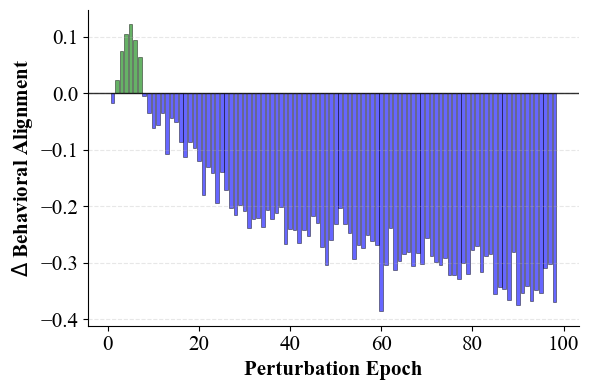


Behavioral alignment deviation at perturbation epoch statistics:
  Overall minimum: -0.3861
  Overall maximum: 0.1224
  Mean: -0.2199
  Standard deviation: 0.1179
  Range: 0.5084

Deviation breakdown:
  Positive deviations (higher alignment): 6
  Negative deviations (lower alignment): 92
  Zero deviations (same alignment): 0

Deviation examples:
  Run 1: -0.0171 deviation
  Run 2: +0.0246 deviation
  Run 3: +0.0760 deviation
  Run 4: +0.1051 deviation
  Run 5: +0.1224 deviation


In [93]:
# Plot behavioral alignment deviation at perturbation epoch compared to baseline
perturbation_deviations_ba = []
run_numbers_deviation_ba = []

for run_name, df in all_data.items():
    run_num = int(run_name.split('run')[1])
    
    perturb_epoch = int(run_num)
    
    # Get behavioral alignment at perturbation epoch for this run
    run_at_perturb = df[df['epoch'] == perturb_epoch]
    
    # Get baseline behavioral alignment at the same epoch
    baseline_at_perturb = baseline_df[baseline_df['epoch'] == perturb_epoch]
    
    if len(run_at_perturb) > 0 and len(baseline_at_perturb) > 0:
        run_ba = run_at_perturb.iloc[0]['behavioral_rsa_rho']
        baseline_ba = baseline_at_perturb.iloc[0]['behavioral_rsa_rho']
        
        # Calculate deviation (run - baseline)
        deviation = run_ba - baseline_ba
        perturbation_deviations_ba.append(deviation)
        run_numbers_deviation_ba.append(run_num)

# Sort by run number for proper ordering
sorted_data_deviation_ba = sorted(zip(run_numbers_deviation_ba, perturbation_deviations_ba))
run_numbers_deviation_ba_sorted, perturbation_deviations_ba_sorted = zip(*sorted_data_deviation_ba)

# Create the bar plot
fig, ax = plt.subplots(figsize=(6, 4))
colors = ['green' if dev > 0 else 'blue' for dev in perturbation_deviations_ba_sorted]
ax.bar(run_numbers_deviation_ba_sorted, perturbation_deviations_ba_sorted, alpha=0.6, color=colors, edgecolor='black', linewidth=0.5)
ax.set_xlabel('Perturbation Epoch', fontweight='bold', fontsize=15)
ax.set_ylabel(r'$\Delta$ Behavioral Alignment', fontweight='bold', fontsize=15)
#ax.set_title('Behavioral Alignment Deviation at Perturbation Epoch\n(Green = Higher Alignment, Red = Lower Alignment)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, linestyle='--', axis='y')

# Increase tick label sizes for both x and y axes
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

# Remove top and right border
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add zero line
ax.axhline(y=0, color='black', linestyle='-', alpha=0.8, linewidth=1)

# Add some statistics
min_deviation_ba_overall = min(perturbation_deviations_ba_sorted)
max_deviation_ba_overall = max(perturbation_deviations_ba_sorted)
mean_deviation_ba = np.mean(perturbation_deviations_ba_sorted)

# # Add text box with statistics
# stats_text_deviation_ba = f'Min: {min_deviation_ba_overall:.4f}\nMax: {max_deviation_ba_overall:.4f}\nMean: {mean_deviation_ba:.4f}\nStd: {np.std(perturbation_deviations_ba_sorted):.4f}'
# ax.text(0.02, 0.98, stats_text_deviation_ba, transform=ax.transAxes, 
#          verticalalignment='top', horizontalalignment='left', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
#          fontsize=10)

plt.tight_layout()
plt.show()

print(f"\nBehavioral alignment deviation at perturbation epoch statistics:")
print(f"  Overall minimum: {min_deviation_ba_overall:.4f}")
print(f"  Overall maximum: {max_deviation_ba_overall:.4f}")
print(f"  Mean: {mean_deviation_ba:.4f}")
print(f"  Standard deviation: {np.std(perturbation_deviations_ba_sorted):.4f}")
print(f"  Range: {max_deviation_ba_overall - min_deviation_ba_overall:.4f}")

# Count positive vs negative deviations
positive_deviations_ba = sum(1 for dev in perturbation_deviations_ba_sorted if dev > 0)
negative_deviations_ba = sum(1 for dev in perturbation_deviations_ba_sorted if dev < 0)
zero_deviations_ba = sum(1 for dev in perturbation_deviations_ba_sorted if dev == 0)

print(f"\nDeviation breakdown:")
print(f"  Positive deviations (higher alignment): {positive_deviations_ba}")
print(f"  Negative deviations (lower alignment): {negative_deviations_ba}")
print(f"  Zero deviations (same alignment): {zero_deviations_ba}")

# Print some examples for verification
print(f"\nDeviation examples:")
for i in range(min(5, len(run_numbers_deviation_ba_sorted))):
    run_num = run_numbers_deviation_ba_sorted[i]
    deviation = perturbation_deviations_ba_sorted[i]
    print(f"  Run {run_num}: {deviation:+.4f} deviation")


Read in the data from NOD inference on the single epoch perturbation sweep.

In [94]:
# Set up paths 
results_dir = Path('/home/wallacelab/teba/multimodal_brain_inspired/marren/temporal_dynamics_of_human_alignment/clip_hba_behavior_loops/20251016_125025')

Create path names to the nod_inference_results folders in each training run

## Single epoch perturbation sweep neural results

In [72]:
# read in the baseline neural results
baseline_neural_results = pd.read_csv('baseline_brain_rsa_results.csv')

# rename the 'rho' column to 'baseline_rho'
baseline_neural_results = baseline_neural_results.rename(columns={'rho': 'baseline_rho'})

# rename the p-value column to 'baseline_pval'
baseline_neural_results = baseline_neural_results.rename(columns={'p_value': 'baseline_pval'})

print(baseline_neural_results.head())

# read in the single epoch perturbation sweep neural results
single_epoch_sweep_neural_results = pd.read_csv('perturbation_sweep_rsa_results.csv')

# rename the 'rho' column to 'single_epoch_sweep_rho'
single_epoch_sweep_neural_results = single_epoch_sweep_neural_results.rename(columns={'rho': 'single_epoch_sweep_rho'})

# rename the p-value column to 'single_epoch_sweep_pval'
single_epoch_sweep_neural_results = single_epoch_sweep_neural_results.rename(columns={'p_value': 'single_epoch_sweep_pval'})

print(single_epoch_sweep_neural_results.head())

   epoch  roi  baseline_rho  baseline_pval
0      1   V3     -0.008457   2.273970e-09
1      1  FFC      0.134525   0.000000e+00
2      1  LO3      0.078347   0.000000e+00
3      1  PIT      0.096469   0.000000e+00
4      1   V2      0.006478   4.681941e-06
   roi  epoch  training_run  single_epoch_sweep_rho  single_epoch_sweep_pval
0  FFC      1             1                0.143683                      0.0
1  FFC      2             1                0.118665                      0.0
2  FFC      3             1                0.099650                      0.0
3  FFC      4             1                0.081523                      0.0
4  FFC      5             1                0.072510                      0.0


In [73]:
# Merge the baseline and single epoch sweep results on the epoch and roi column
merged_neural_results = pd.merge(baseline_neural_results, single_epoch_sweep_neural_results, on=['epoch', 'roi'])

print(merged_neural_results.head())


   epoch  roi  baseline_rho  baseline_pval  training_run  \
0      1   V3     -0.008457   2.273970e-09             1   
1      1  FFC      0.134525   0.000000e+00             1   
2      1  LO3      0.078347   0.000000e+00             1   
3      1  PIT      0.096469   0.000000e+00             1   
4      1   V2      0.006478   4.681941e-06             1   

   single_epoch_sweep_rho  single_epoch_sweep_pval  
0               -0.015317             2.588652e-27  
1                0.143683             0.000000e+00  
2                0.077981             0.000000e+00  
3                0.103188             0.000000e+00  
4                0.000229             8.716887e-01  


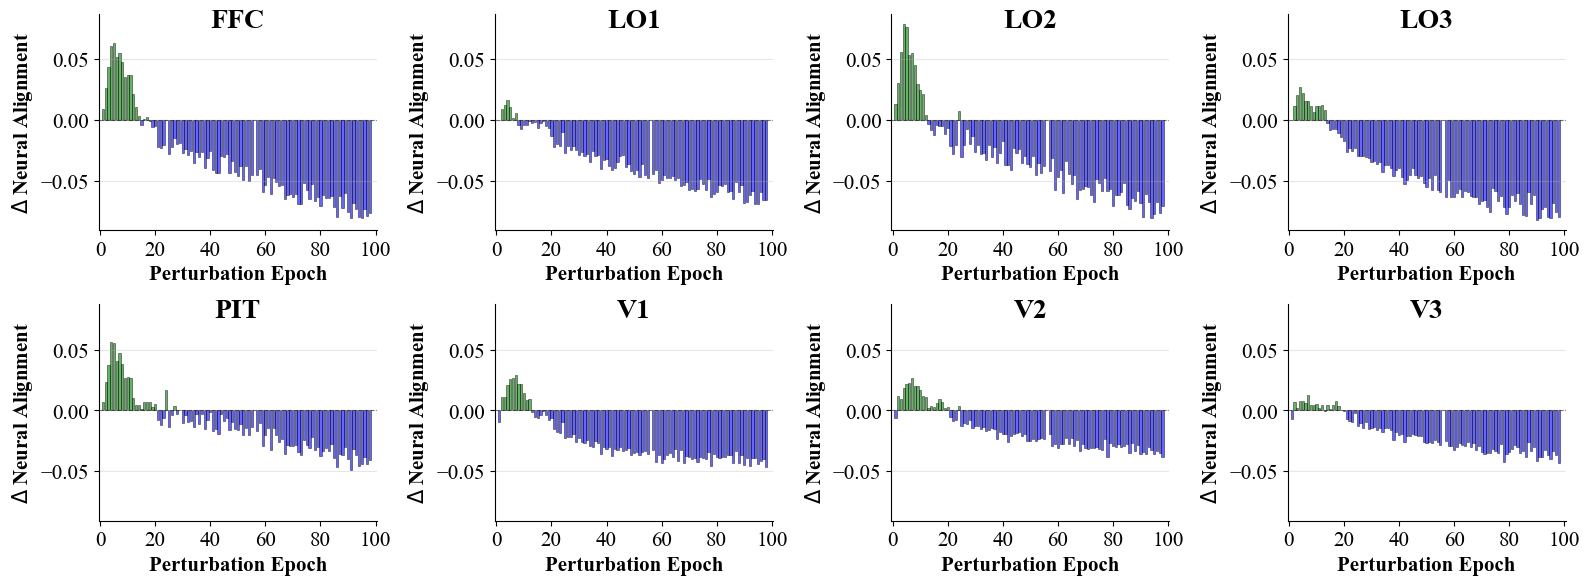

In [74]:
# Extract data at the perturbation epoch for each training run and ROI

# Define ROIs to exclude from the plots
excluded_rois = {'V4', 'V8', 'VMV1', 'VMV2', 'VMV3', 'VVC'}

# Get unique ROIs and training runs, EXCLUDING the ones in excluded_rois
unique_rois = sorted([roi for roi in merged_neural_results['roi'].unique() if roi not in excluded_rois])
unique_training_runs = sorted(merged_neural_results['training_run'].unique())

# --- First, gather all deviations for all ROIs to find the global min and max ---
all_deviations = []

roi_deviation_data_dict = {}

for roi in unique_rois:
    deviation_data = []
    for train_run in unique_training_runs:
        # Filter to this ROI, training run, and the epoch at which it was perturbed
        run_data = merged_neural_results[
            (merged_neural_results['roi'] == roi) &
            (merged_neural_results['training_run'] == train_run) &
            (merged_neural_results['epoch'] == train_run)
        ]

        if len(run_data) > 0:
            row = run_data.iloc[0]
            deviation = row['single_epoch_sweep_rho'] - row['baseline_rho']
            deviation_data.append({
                'perturbation_epoch': train_run,
                'neural_alignment_deviation': deviation
            })
            all_deviations.append(deviation)
    roi_deviation_data_dict[roi] = deviation_data

if all_deviations:
    global_ymin = min(all_deviations)
    global_ymax = max(all_deviations)
    # Add small padding for clarity
    ypad = 0.05 * (global_ymax - global_ymin) if (global_ymax - global_ymin) != 0 else 0.05
    global_ymin -= ypad
    global_ymax += ypad
else:
    global_ymin, global_ymax = -1, 1

# Calculate number of rows and columns for subplots
n_rois = len(unique_rois)
n_cols = 4  # You can adjust this
n_rows = (n_rois + n_cols - 1) // n_cols  # Ceiling division

# Define standard x-ticks for all axes
x_tick_labels = [0, 20, 40, 60, 80, 100]

# Create subplots
# Reduce height factor to make each subplot slightly shorter than before.
fig_height_per_row = 3.0  # Was 4, now 3 for shorter subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, fig_height_per_row * n_rows))
axes_flat = axes.flatten()

# Process each ROI
for roi_idx, roi in enumerate(unique_rois):
    ax = axes_flat[roi_idx]
    deviation_data = roi_deviation_data_dict[roi]
    if len(deviation_data) > 0:
        deviation_df = pd.DataFrame(deviation_data).sort_values('perturbation_epoch')

        # Bar plot for this ROI with color depending on sign of deviation
        bar_colors = ['green' if val > 0 else 'blue' for val in deviation_df['neural_alignment_deviation']]
        ax.bar(
            deviation_df['perturbation_epoch'],
            deviation_df['neural_alignment_deviation'],
            color=bar_colors,
            linewidth=0.5,
            edgecolor='black',
            alpha=0.6
        )

        # Add horizontal line at y=0
        ax.axhline(y=0, color='black', linestyle='--', linewidth=0.8, alpha=0.5)

        ax.set_xlabel('Perturbation Epoch', fontweight='bold', fontsize=15)
        ax.set_ylabel('$\Delta$ Neural Alignment', fontweight='bold', fontsize=15)
        # Move subplot title down: y=1.01 just below the top of the y-axis
        ax.set_title(f'{roi}', fontweight='bold', fontsize=20, y=0.9)
        ax.grid(axis='y', alpha=0.3)

        # Set x-axis from 0 to 100 with ticks at [0, 20, 40, 60, 80, 100]
        ax.set_xlim(-0.5, 100.5)
        ax.set_xticks(x_tick_labels)
        ax.set_xticklabels([str(x) for x in x_tick_labels], fontsize=7)

        # Increase tick label sizes for both x and y axes
        ax.tick_params(axis='x', labelsize=15)
        ax.tick_params(axis='y', labelsize=15)  

        # Set the y-axis to be the same across all subplots
        ax.set_ylim(global_ymin, global_ymax)

        # Remove top and right spines
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
    else:
        # No data for this ROI
        ax.text(0.5, 0.5, f'No data for {roi}',
                transform=ax.transAxes, ha='center', va='center')
        # Move subplot title down: y=1.01 just below the top of the y-axis
        ax.set_title(f'ROI: {roi}', fontweight='bold', fontsize=20, y=1.01)
        ax.set_ylim(global_ymin, global_ymax)
        ax.set_xlim(-0.5, 100.5)
        ax.set_xticks(x_tick_labels)
        ax.set_xticklabels([str(x) for x in x_tick_labels], fontsize=7)

# Hide unused subplots
for roi_idx in range(n_rois, len(axes_flat)):
    axes_flat[roi_idx].set_visible(False)

plt.tight_layout()
plt.subplots_adjust(top=0.96)
plt.show()

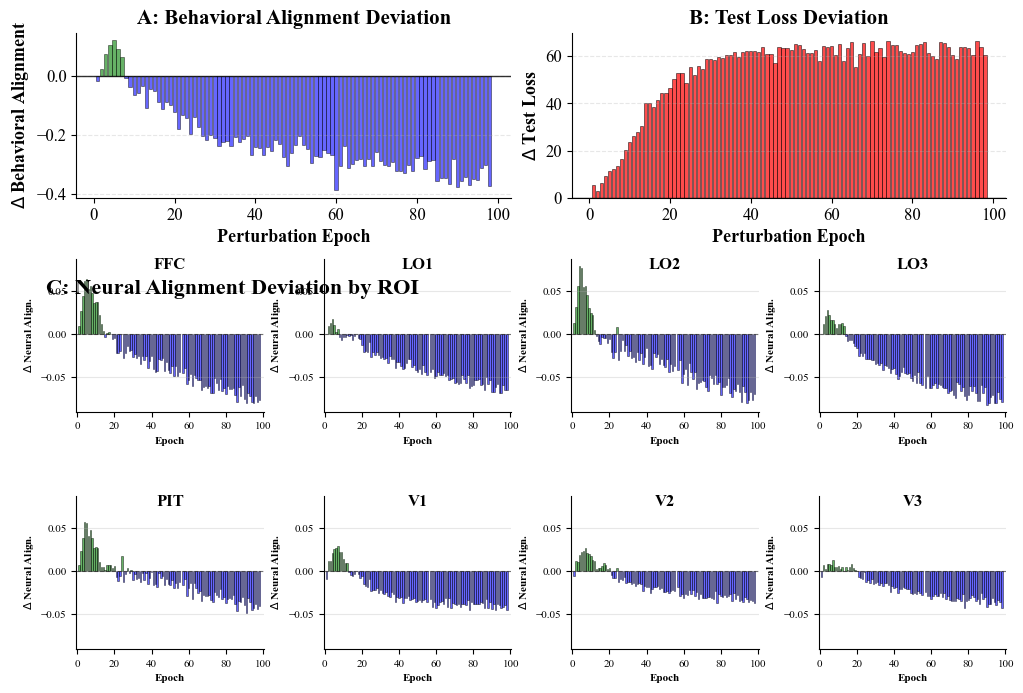


Behavioral alignment deviation at perturbation epoch statistics:
  Overall minimum: -0.3861
  Overall maximum: 0.1224
  Mean: -0.2199
  Standard deviation: 0.1179
  Range: 0.5084

Deviation breakdown:
  Positive deviations (higher alignment): 6
  Negative deviations (lower alignment): 92
  Zero deviations (same alignment): 0

Deviation examples:
  Run 1: -0.0171 deviation
  Run 2: +0.0246 deviation
  Run 3: +0.0760 deviation
  Run 4: +0.1051 deviation
  Run 5: +0.1224 deviation

Test loss deviation at perturbation epoch statistics:
  Overall minimum: 2.85
  Overall maximum: 66.68
  Mean: 53.91
  Standard deviation: 16.39
  Range: 63.83

Deviation breakdown:
  Positive deviations (higher loss): 98
  Negative deviations (lower loss): 0
  Zero deviations (same loss): 0

Deviation examples:
  Run 1: +5.20 deviation
  Run 2: +2.85 deviation
  Run 3: +6.33 deviation
  Run 4: +9.14 deviation
  Run 5: +11.36 deviation


In [108]:
# --- Calculate values for all three plots first ---

# First subplot: Behavioral alignment deviation
perturbation_deviations_ba = []
run_numbers_deviation_ba = []

for run_name, df in all_data.items():
    run_num = int(run_name.split('run')[1])
    perturb_epoch = int(run_num)
    run_at_perturb = df[df['epoch'] == perturb_epoch]
    baseline_at_perturb = baseline_df[baseline_df['epoch'] == perturb_epoch]
    if len(run_at_perturb) > 0 and len(baseline_at_perturb) > 0:
        run_ba = run_at_perturb.iloc[0]['behavioral_rsa_rho']
        baseline_ba = baseline_at_perturb.iloc[0]['behavioral_rsa_rho']
        deviation = run_ba - baseline_ba
        perturbation_deviations_ba.append(deviation)
        run_numbers_deviation_ba.append(run_num)

sorted_data_deviation_ba = sorted(zip(run_numbers_deviation_ba, perturbation_deviations_ba))
run_numbers_deviation_ba_sorted, perturbation_deviations_ba_sorted = zip(*sorted_data_deviation_ba)
min_deviation_ba_overall = min(perturbation_deviations_ba_sorted)
max_deviation_ba_overall = max(perturbation_deviations_ba_sorted)
mean_deviation_ba = np.mean(perturbation_deviations_ba_sorted)

positive_deviations_ba = sum(1 for dev in perturbation_deviations_ba_sorted if dev > 0)
negative_deviations_ba = sum(1 for dev in perturbation_deviations_ba_sorted if dev < 0)
zero_deviations_ba = sum(1 for dev in perturbation_deviations_ba_sorted if dev == 0)

# Second subplot: Test loss deviation
perturbation_deviations = []
run_numbers_deviation = []

for run_name, df in all_data.items():
    run_num = int(run_name.split('run')[1])
    perturb_epoch = int(run_num)
    run_at_perturb = df[df['epoch'] == perturb_epoch]
    baseline_at_perturb = baseline_df[baseline_df['epoch'] == perturb_epoch]
    if len(run_at_perturb) > 0 and len(baseline_at_perturb) > 0:
        run_loss = run_at_perturb.iloc[0]['test_loss']
        baseline_loss = baseline_at_perturb.iloc[0]['test_loss']
        deviation = run_loss - baseline_loss
        perturbation_deviations.append(deviation)
        run_numbers_deviation.append(run_num)

sorted_data_deviation = sorted(zip(run_numbers_deviation, perturbation_deviations))
run_numbers_deviation_sorted, perturbation_deviations_sorted = zip(*sorted_data_deviation)
min_deviation_overall = min(perturbation_deviations_sorted)
max_deviation_overall = max(perturbation_deviations_sorted)
mean_deviation = np.mean(perturbation_deviations_sorted)

positive_deviations = sum(1 for dev in perturbation_deviations_sorted if dev > 0)
negative_deviations = sum(1 for dev in perturbation_deviations_sorted if dev < 0)
zero_deviations = sum(1 for dev in perturbation_deviations_sorted if dev == 0)

# Third subplot setup: Gather data for neural alignment deviation across ROIs
excluded_rois = {'V4', 'V8', 'VMV1', 'VMV2', 'VMV3', 'VVC'}
unique_rois = sorted([roi for roi in merged_neural_results['roi'].unique() if roi not in excluded_rois])
unique_training_runs = sorted(merged_neural_results['training_run'].unique())

all_deviations = []
roi_deviation_data_dict = {}

for roi in unique_rois:
    deviation_data = []
    for train_run in unique_training_runs:
        run_data = merged_neural_results[
            (merged_neural_results['roi'] == roi) &
            (merged_neural_results['training_run'] == train_run) &
            (merged_neural_results['epoch'] == train_run)
        ]
        if len(run_data) > 0:
            row = run_data.iloc[0]
            deviation = row['single_epoch_sweep_rho'] - row['baseline_rho']
            deviation_data.append({
                'perturbation_epoch': train_run,
                'neural_alignment_deviation': deviation
            })
            all_deviations.append(deviation)
    roi_deviation_data_dict[roi] = deviation_data

if all_deviations:
    global_ymin = min(all_deviations)
    global_ymax = max(all_deviations)
    ypad = 0.05 * (global_ymax - global_ymin) if (global_ymax - global_ymin) != 0 else 0.05
    global_ymin -= ypad
    global_ymax += ypad
else:
    global_ymin, global_ymax = -1, 1

x_tick_labels = [0, 20, 40, 60, 80, 100]

# ------------------- Make composite subplot layout -------------------
import matplotlib.gridspec as gridspec

n_rois = len(unique_rois)
n_cols = 4
n_rows = (n_rois + n_cols - 1) // n_cols

fig = plt.figure(figsize=(12, 8))

# Gridspec: two rows:
# - Row 0: two columns for A and B (spans left and right halves)
# - Row 1: one cell spanning both columns for C, inside is a ROI grid

outer_gs = gridspec.GridSpec(2, 2, height_ratios=[1.1, 2.6], width_ratios=[1, 1], hspace=0.22, wspace=0.14)

# --- Subplots A and B ---
ax1 = fig.add_subplot(outer_gs[0, 0])
ax2 = fig.add_subplot(outer_gs[0, 1])

# --- Subplot C: grid for ROI neural alignment deviation ---
# This ROI grid spans both columns of row 1
inner_gs = gridspec.GridSpecFromSubplotSpec(n_rows, n_cols, subplot_spec=outer_gs[1, :], hspace=0.55, wspace=0.32)
axes_grid = np.empty((n_rows, n_cols), dtype=object)
axes_flat = []

for i in range(n_rows):
    for j in range(n_cols):
        axes_grid[i, j] = fig.add_subplot(inner_gs[i, j])
        axes_flat.append(axes_grid[i, j])

# --- Subplot A: Behavioral alignment deviation ---
colors1 = ['green' if dev > 0 else 'blue' for dev in perturbation_deviations_ba_sorted]
ax1.bar(run_numbers_deviation_ba_sorted, perturbation_deviations_ba_sorted, alpha=0.6, color=colors1, edgecolor='black', linewidth=0.5)
ax1.set_xlabel('Perturbation Epoch', fontweight='bold', fontsize=13)
ax1.set_ylabel(r'$\Delta$ Behavioral Alignment', fontweight='bold', fontsize=13)
ax1.grid(True, alpha=0.3, linestyle='--', axis='y')
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.axhline(y=0, color='black', linestyle='-', alpha=0.8, linewidth=1)
ax1.set_title("A: Behavioral Alignment Deviation", fontsize=15, fontweight="bold")

# --- Subplot B: Test loss deviation ---
colors2 = ['red' if dev > 0 else 'green' for dev in perturbation_deviations_sorted]
ax2.bar(run_numbers_deviation_sorted, perturbation_deviations_sorted, alpha=0.7, color=colors2, edgecolor='black', linewidth=0.5)
ax2.set_xlabel('Perturbation Epoch', fontsize=13, fontweight='bold')
ax2.set_ylabel('$\Delta$ Test Loss', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3, linestyle='--', axis='y')
ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.8, linewidth=1)
ax2.set_title("B: Test Loss Deviation", fontsize=15, fontweight="bold")

# --- Subplot C: Neural alignment deviation for each ROI (ROI grid) ---
for roi_idx, roi in enumerate(unique_rois):
    ax = axes_flat[roi_idx]
    deviation_data = roi_deviation_data_dict[roi]
    if len(deviation_data) > 0:
        deviation_df = pd.DataFrame(deviation_data).sort_values('perturbation_epoch')
        bar_colors = ['green' if val > 0 else 'blue' for val in deviation_df['neural_alignment_deviation']]
        ax.bar(
            deviation_df['perturbation_epoch'],
            deviation_df['neural_alignment_deviation'],
            color=bar_colors,
            linewidth=0.5,
            edgecolor='black',
            alpha=0.6
        )
        ax.axhline(y=0, color='black', linestyle='--', linewidth=0.8, alpha=0.5)
        ax.set_xlabel('Epoch', fontweight='bold', fontsize=8)
        ax.set_ylabel('$\Delta$ Neural Align.', fontweight='bold', fontsize=8)
        ax.set_title(f'{roi}', fontweight='bold', fontsize=12, y=0.88)
        ax.grid(axis='y', alpha=0.3)
        ax.set_xlim(-0.5, 100.5)
        ax.set_xticks(x_tick_labels)
        ax.set_xticklabels([str(x) for x in x_tick_labels], fontsize=7)
        ax.tick_params(axis='x', labelsize=8)
        ax.tick_params(axis='y', labelsize=8)
        ax.set_ylim(global_ymin, global_ymax)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
    else:
        ax.text(0.5, 0.5, f'No data for {roi}',
                transform=ax.transAxes, ha='center', va='center', fontsize=8)
        ax.set_title(f'ROI: {roi}', fontweight='bold', fontsize=12, y=1.0)
        ax.set_ylim(global_ymin, global_ymax)
        ax.set_xlim(-0.5, 100.5)
        ax.set_xticks(x_tick_labels)
        ax.set_xticklabels([str(x) for x in x_tick_labels], fontsize=7)

for roi_idx in range(n_rois, len(axes_flat)):
    axes_flat[roi_idx].set_visible(False)

# Add a single big title for the third subplot section, above the ROI grid
fig.text(0.10, 0.56, "C: Neural Alignment Deviation by ROI", fontsize=16, fontweight="bold", ha='left', va='center')

#plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Print statistics as before (unchanged)
print(f"\nBehavioral alignment deviation at perturbation epoch statistics:")
print(f"  Overall minimum: {min_deviation_ba_overall:.4f}")
print(f"  Overall maximum: {max_deviation_ba_overall:.4f}")
print(f"  Mean: {mean_deviation_ba:.4f}")
print(f"  Standard deviation: {np.std(perturbation_deviations_ba_sorted):.4f}")
print(f"  Range: {max_deviation_ba_overall - min_deviation_ba_overall:.4f}")

print(f"\nDeviation breakdown:")
print(f"  Positive deviations (higher alignment): {positive_deviations_ba}")
print(f"  Negative deviations (lower alignment): {negative_deviations_ba}")
print(f"  Zero deviations (same alignment): {zero_deviations_ba}")

print(f"\nDeviation examples:")
for i in range(min(5, len(run_numbers_deviation_ba_sorted))):
    run_num = run_numbers_deviation_ba_sorted[i]
    deviation = perturbation_deviations_ba_sorted[i]
    print(f"  Run {run_num}: {deviation:+.4f} deviation")

print(f"\nTest loss deviation at perturbation epoch statistics:")
print(f"  Overall minimum: {min_deviation_overall:.2f}")
print(f"  Overall maximum: {max_deviation_overall:.2f}")
print(f"  Mean: {mean_deviation:.2f}")
print(f"  Standard deviation: {np.std(perturbation_deviations_sorted):.2f}")
print(f"  Range: {max_deviation_overall - min_deviation_overall:.2f}")

print(f"\nDeviation breakdown:")
print(f"  Positive deviations (higher loss): {positive_deviations}")
print(f"  Negative deviations (lower loss): {negative_deviations}")
print(f"  Zero deviations (same loss): {zero_deviations}")

print(f"\nDeviation examples:")
for i in range(min(5, len(run_numbers_deviation_sorted))):
    run_num = run_numbers_deviation_sorted[i]
    deviation = perturbation_deviations_sorted[i]
    print(f"  Run {run_num}: {deviation:+.2f} deviation")


## Perturbation length experiments behavioral results

In [84]:
# load the baseline results
# read in baseline data
baseline_csv = Path('/home/wallacelab/teba/multimodal_brain_inspired/marren/temporal_dynamics_of_human_alignment/clip_hba_behavior/training_results/training_res_20251013_220330.csv')
baseline_df = '/home/wallacelab/teba/multimodal_brain_inspired/marren/temporal_dynamics_of_human_alignment/clip_hba_behavior/training_results/training_res_20251013_220330.csv'

if baseline_csv.exists():
    baseline_df = pd.read_csv(baseline_csv)
    print(f"Baseline data loaded: {len(baseline_df)} epochs")
else:
    print("Warning: Baseline data not found")

Baseline data loaded: 118 epochs


In [85]:
# Find the epoch with minimum test loss
baseline_min_test_loss_idx = baseline_df['test_loss'].idxmin()

# Keep all rows up to and including the minimum test loss epoch
baseline_filtered_df = baseline_df.loc[:baseline_min_test_loss_idx].copy()

# replace the baseline data in all_data with the baseline_filtered_df
baseline_df = baseline_filtered_df

print(baseline_df)

    epoch  train_loss   test_loss  behavioral_rsa_rho  behavioral_rsa_p_value
0       1  143.198375  114.267337            0.455443            7.497325e-59
1       2   99.003030   91.310430            0.422459            4.797240e-50
2       3   88.155927   84.871568            0.421268            9.572966e-50
3       4   82.863315   80.375895            0.425018            1.076738e-50
4       5   78.583811   76.447118            0.440511            9.591843e-55
..    ...         ...         ...                 ...                     ...
93     94   17.675313   29.133197            0.755533           4.658267e-209
94     95   17.545072   29.212518            0.759054           4.063549e-212
95     96   17.450050   29.148153            0.755926           2.132139e-209
96     97   17.317206   29.184973            0.757532           8.660125e-211
97     98   17.214430   29.101309            0.755587           4.177484e-209

[98 rows x 5 columns]


In [86]:
# get all of the training run results from the perturbation length experiments

# path to base directory of the perturbation length experiments
perturb_length_base_dir = Path('/home/wallacelab/teba/multimodal_brain_inspired/marren/temporal_dynamics_of_human_alignment/clip_hba_behavior_loops/perturb_length_experiments')

# list all training run directories in the results_dir
run_dirs = sorted([d for d in perturb_length_base_dir.iterdir() 
                  if d.is_dir()
                  and d.name.startswith('random_target')])

for run_dir in run_dirs:
    print(run_dir.name)

random_target_e10_l10
random_target_e10_l2
random_target_e10_l20
random_target_e10_l30
random_target_e10_l40
random_target_e10_l5
random_target_e10_l50
random_target_e13_l10
random_target_e13_l20
random_target_e13_l30
random_target_e13_l40
random_target_e13_l5
random_target_e13_l50
random_target_e16_l10
random_target_e16_l20
random_target_e16_l30
random_target_e16_l40
random_target_e16_l5
random_target_e16_l50
random_target_e19_l10
random_target_e19_l20
random_target_e19_l30
random_target_e19_l40
random_target_e19_l5
random_target_e19_l50
random_target_e1_l10
random_target_e1_l2
random_target_e1_l20
random_target_e1_l30
random_target_e1_l40
random_target_e1_l5
random_target_e1_l50
random_target_e22_l5
random_target_e2_l10
random_target_e2_l2
random_target_e2_l20
random_target_e2_l30
random_target_e2_l40
random_target_e2_l5
random_target_e2_l50
random_target_e3_l10
random_target_e3_l2
random_target_e3_l20
random_target_e3_l30
random_target_e3_l40
random_target_e3_l5
random_target_e3_l50

In [87]:
# in every run_dir, find the folder called either metrics.csv or training_res.csv
# and read it in as a pandas dataframe

#all_perturb_length_dfs should be a dict mapping run names (strings) to DataFrames, or a list of DataFrames, where each DataFrame has a 'test_loss' column and its indices represent epochs. 

all_perturb_length_dfs = {}

for run_dir in run_dirs:
    if 'metrics.csv' in os.listdir(run_dir):
        print(f'Found results csv in {run_dir.name}')
        df = pd.read_csv(run_dir / 'metrics.csv')
        all_perturb_length_dfs[run_dir.name] = df
    elif 'training_res.csv' in os.listdir(run_dir):
        print(f'Found results csv in {run_dir.name}')
        df = pd.read_csv(run_dir / 'training_res.csv')
        all_perturb_length_dfs[run_dir.name] = df

Found results csv in random_target_e10_l10
Found results csv in random_target_e10_l2
Found results csv in random_target_e10_l20
Found results csv in random_target_e10_l30
Found results csv in random_target_e10_l40
Found results csv in random_target_e10_l5
Found results csv in random_target_e10_l50
Found results csv in random_target_e13_l10
Found results csv in random_target_e13_l20
Found results csv in random_target_e13_l30
Found results csv in random_target_e13_l40
Found results csv in random_target_e13_l5
Found results csv in random_target_e13_l50
Found results csv in random_target_e16_l10
Found results csv in random_target_e16_l20
Found results csv in random_target_e16_l30
Found results csv in random_target_e16_l40
Found results csv in random_target_e16_l5
Found results csv in random_target_e16_l50
Found results csv in random_target_e19_l10
Found results csv in random_target_e19_l20
Found results csv in random_target_e19_l30
Found results csv in random_target_e19_l40
Found results c

Found results csv in random_target_e2_l2
Found results csv in random_target_e2_l20
Found results csv in random_target_e2_l30
Found results csv in random_target_e2_l40
Found results csv in random_target_e2_l5
Found results csv in random_target_e2_l50
Found results csv in random_target_e3_l10
Found results csv in random_target_e3_l2
Found results csv in random_target_e3_l20
Found results csv in random_target_e3_l30
Found results csv in random_target_e3_l40
Found results csv in random_target_e3_l5
Found results csv in random_target_e3_l50
Found results csv in random_target_e40_l10
Found results csv in random_target_e40_l2
Found results csv in random_target_e40_l20
Found results csv in random_target_e40_l30
Found results csv in random_target_e40_l40
Found results csv in random_target_e40_l5
Found results csv in random_target_e40_l50
Found results csv in random_target_e58_l10
Found results csv in random_target_e58_l20
Found results csv in random_target_e58_l30
Found results csv in random_ta

In [88]:
print(all_perturb_length_dfs)

{'random_target_e10_l10':      epoch  train_loss  test_loss  behavioral_rsa_rho  behavioral_rsa_p_value  \
0       10  116.037356  83.877477            0.627783           1.161130e-124   
1       11  108.866402  87.170436            0.620361           6.029206e-121   
2       12  106.712804  90.209957            0.620820           3.575812e-121   
3       13  105.615242  92.952512            0.619597           1.434417e-120   
4       14  104.945687  95.128610            0.619060           2.637457e-120   
..     ...         ...        ...                 ...                     ...   
104    114   14.820902  29.497532            0.730804           5.946660e-189   
105    115   14.732647  29.561627            0.734103           1.669248e-191   
106    116   14.660842  29.512901            0.734373           1.028537e-191   
107    117   14.560640  29.578890            0.734255           1.272555e-191   
108    118   14.474779  29.601395            0.732563           2.619055e-190   

 

In [89]:

# combine this with the baseline df, merging on the epoch column, then select 'epoch', and any columns containing 'test_loss' in their names
special_df = pd.merge(baseline_df, all_perturb_length_dfs['random_target_e1_l10'], on='epoch', how='outer')[['epoch', 'test_loss_x', 'test_loss_y']]

print(special_df.to_string())


     epoch  test_loss_x  test_loss_y
0        1   114.267337   119.604526
1        2    91.310430    96.775429
2        3    84.871568    94.975433
3        4    80.375895    94.335770
4        5    76.447118    93.972163
5        6    73.568759    94.914375
6        7    71.198615    97.326795
7        8    68.586059    98.607863
8        9    65.068034    99.358473
9       10    60.307024    99.739522
10      11    56.113487    88.394170
11      12    52.844717    80.833261
12      13    50.444933    76.297111
13      14    48.648318    70.509161
14      15    47.024271    61.654141
15      16    45.653933    52.840882
16      17    44.318907    48.203231
17      18    43.059134    45.092564
18      19    42.113390    43.049189
19      20    41.175045    41.457544
20      21    40.246910    40.045311
21      22    39.534341    39.082488
22      23    38.785147    38.157802
23      24    38.125127    37.309418
24      25    37.566435    36.695788
25      26    36.954318    36.103118
2

In [90]:
# filter out the rows that were from before early stopping kicked in (but after the minimum test loss was achieved)

all_perturb_length_data = {}

for run_name, df in all_perturb_length_dfs.items():
    if len(df) == 0:
        all_perturb_length_data[run_name] = df
        continue

    # Find the epoch with minimum test loss
    min_test_loss_idx = df['test_loss'].idxmin()

    # Keep all rows up to and including the minimum test loss epoch
    filtered_df = df.loc[:min_test_loss_idx].copy()

    all_perturb_length_data[run_name] = filtered_df

    # Print info about the filtering
    original_epochs = len(df)
    filtered_epochs = len(filtered_df)
    removed_epochs = original_epochs - filtered_epochs
    print(f"{run_name}: {original_epochs} -> {filtered_epochs} epochs "
            f"(removed {removed_epochs} epochs after minimum test loss)")

random_target_e10_l10: 109 -> 89 epochs (removed 20 epochs after minimum test loss)
random_target_e10_l2: 95 -> 75 epochs (removed 20 epochs after minimum test loss)
random_target_e10_l20: 109 -> 89 epochs (removed 20 epochs after minimum test loss)
random_target_e10_l30: 119 -> 99 epochs (removed 20 epochs after minimum test loss)
random_target_e10_l40: 127 -> 107 epochs (removed 20 epochs after minimum test loss)
random_target_e10_l5: 97 -> 77 epochs (removed 20 epochs after minimum test loss)
random_target_e10_l50: 136 -> 116 epochs (removed 20 epochs after minimum test loss)
random_target_e13_l10: 106 -> 86 epochs (removed 20 epochs after minimum test loss)
random_target_e13_l20: 106 -> 86 epochs (removed 20 epochs after minimum test loss)
random_target_e13_l30: 124 -> 104 epochs (removed 20 epochs after minimum test loss)
random_target_e13_l40: 124 -> 104 epochs (removed 20 epochs after minimum test loss)
random_target_e13_l5: 106 -> 86 epochs (removed 20 epochs after minimum test

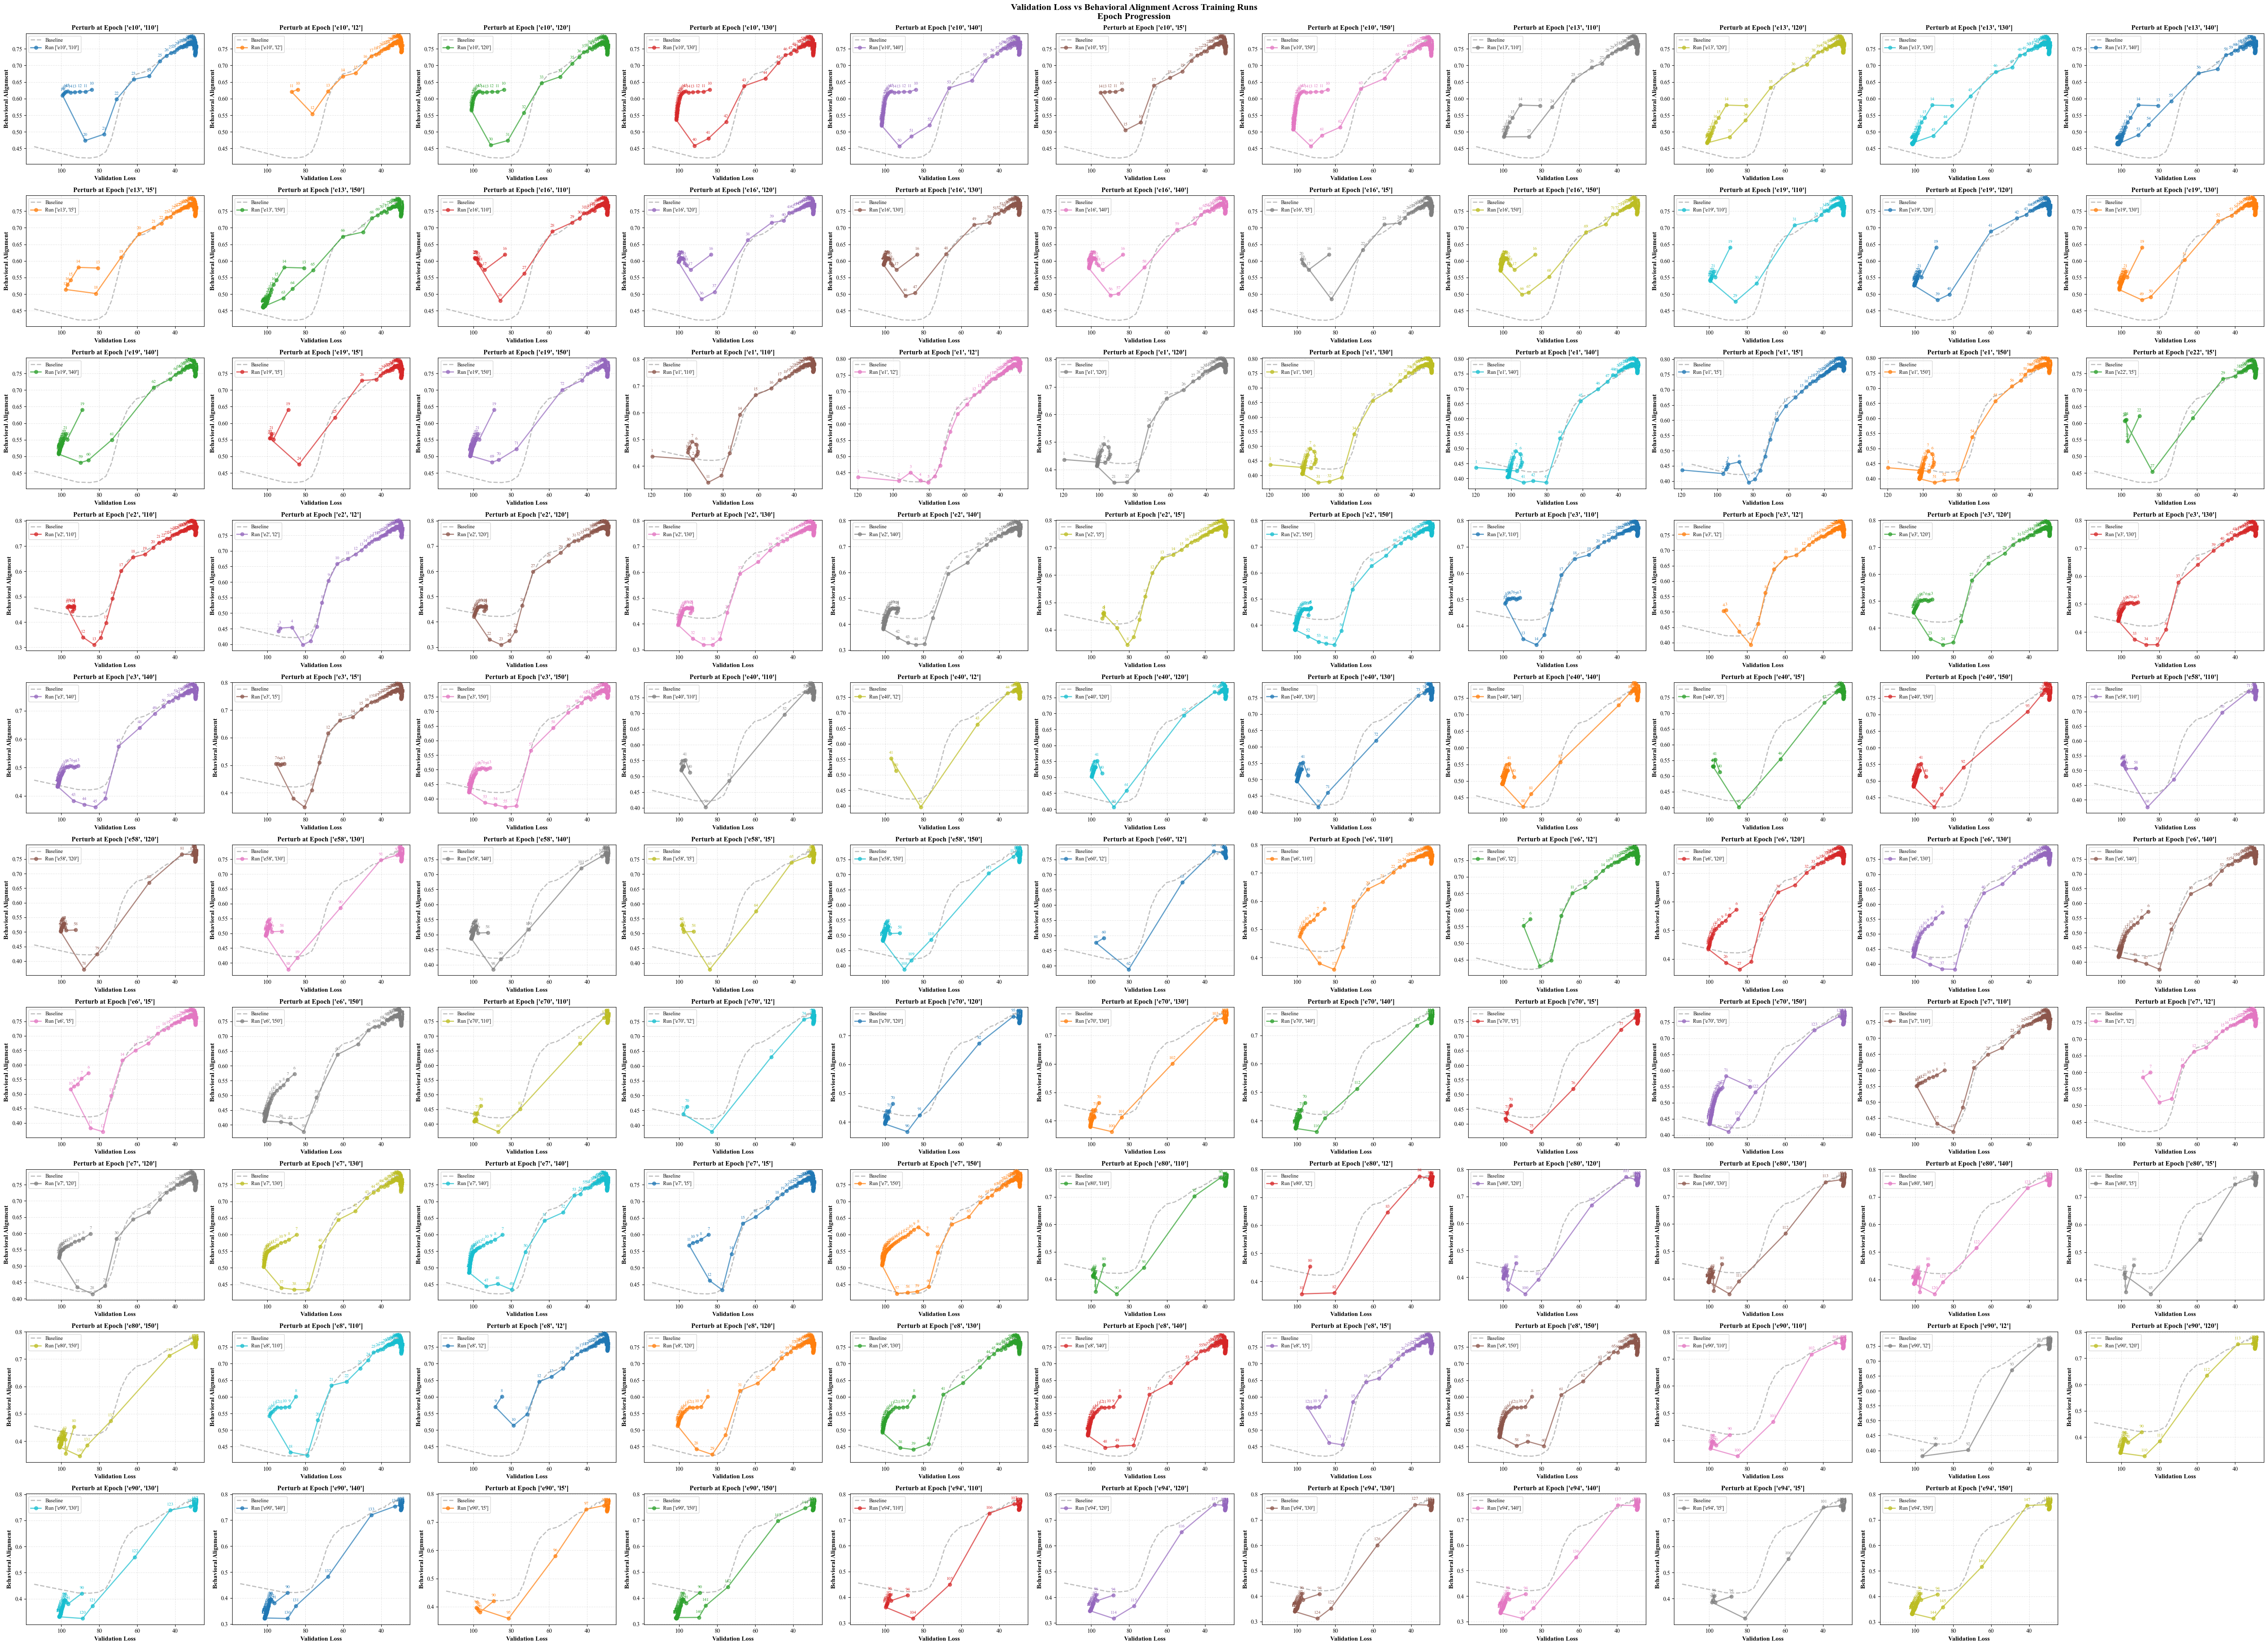

In [91]:
# Create multi-panel figure with separate subplot for each training run
n_runs = len(all_perturb_length_dfs)

# Determine grid layout (try to make it roughly square)
n_cols = int(np.ceil(np.sqrt(n_runs)))
n_rows = int(np.ceil(n_runs / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))

# Flatten axes array for easier indexing
if n_runs > 1:
    axes = axes.flatten()
else:
    axes = [axes]

# Use a consistent color scheme
colors = plt.cm.tab10(np.linspace(0, 1, 10))

for idx, (run_name, df) in enumerate(all_perturb_length_dfs.items()):
    ax = axes[idx]
    
    # Sort by epoch to ensure proper line connection
    df_sorted = df.sort_values('epoch')
    
    # Extract run number for title
    run_num = run_name.split('_')[2:]
    
    # Plot baseline first if available
    baseline_at_perturb = None
    if baseline_df is not None:
        baseline_sorted = baseline_df.sort_values('epoch')
        ax.plot(baseline_sorted['test_loss'], 
                baseline_sorted['behavioral_rsa_rho'],
                linestyle='--',
                linewidth=2,
                color='gray',
                alpha=0.5,
                label='Baseline',
                zorder=1)
    
    # Plot perturbation run line with markers
    line, = ax.plot(df_sorted['test_loss'], 
            df_sorted['behavioral_rsa_rho'],
            marker='o',
            markersize=6,
            linewidth=2,
            color=colors[idx % 10],
            alpha=0.7,
            label=f'Run {run_num}',
            zorder=2)
    
    # Label the epoch numbers on each marker for this curve
    for i, (x, y, epoch) in enumerate(zip(df_sorted['test_loss'], df_sorted['behavioral_rsa_rho'], df_sorted['epoch'])):
        ax.annotate(
            str(int(epoch)),
            (x, y),
            textcoords="offset points",
            xytext=(0, 8),  # offset to avoid overlapping the marker
            ha='center',
            fontsize=8,
            color=colors[idx % 10],
            zorder=10
        )

    # Formatting
    ax.set_xlabel('Validation Loss', fontsize=11, fontweight='bold')
    ax.set_ylabel('Behavioral Alignment', fontsize=11, fontweight='bold')
    ax.set_title(f'Perturb at Epoch {run_num}', # ({len(df_sorted)} epochs: {int(df_sorted["epoch"].min())}-{int(df_sorted["epoch"].max())})', 
                 fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.legend(loc='best', fontsize=9, framealpha=0.8)
    
    # Flip x-axis so loss goes from high to low
    ax.invert_xaxis()
    
    # # Add summary text
    # summary_text = f"Start: {first_epoch['behavioral_rsa_rho']:.3f}\nEnd: {last_epoch['behavioral_rsa_rho']:.3f}"
    # ax.text(0.02, 0.98, summary_text, transform=ax.transAxes,
    #         fontsize=9, verticalalignment='top',
    #         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

# Hide any unused subplots
for idx in range(n_runs, len(axes)):
    axes[idx].set_visible(False)

# Add overall title
fig.suptitle('Validation Loss vs Behavioral Alignment Across Training Runs\nEpoch Progression', 
             fontsize=16, fontweight='bold', y=0.995)

plt.tight_layout()
plt.show()

In [101]:


# First, let's examine the actual run names to understand the format
print("Actual run names:")
for run_name, df in all_perturb_length_dfs.items():
    print(f"  {run_name}")

print("\nParsing run names...")

# Extract metadata for each run
run_metadata = []
for run_name, df in all_perturb_length_dfs.items():
    # Parse run name - format appears to be "random_target_e{epoch}_l{length}"
    # Let's handle this more carefully
    if 'random_target_e' in run_name:
        # Extract epoch and length from format like "random_target_e70_l20"
        parts = run_name.split('_')
        start_epoch = None
        length = None
        
        for part in parts:
            if part.startswith('e') and part[1:].isdigit():
                start_epoch = int(part[1:])
            elif part.startswith('l') and part[1:].isdigit():
                length = int(part[1:])
        
        if start_epoch is not None and length is not None:
            run_metadata.append({
                'run_name': run_name,
                'start_epoch': start_epoch,
                'length': length,
                'df': df
            })
            
            print(f"Run: {run_name}")
            print(f"  Start epoch: {start_epoch}")
            print(f"  Length: {length} epochs")
            print(f"  Total epochs: {len(df)}")
            print()
        else:
            print(f"Warning: Could not parse run name: {run_name}")
    else:
        print(f"Warning: Unexpected run name format: {run_name}")

print(f"Total runs parsed: {len(run_metadata)}")


Actual run names:
  random_target_e10_l10
  random_target_e10_l2
  random_target_e10_l20
  random_target_e10_l30
  random_target_e10_l40
  random_target_e10_l5
  random_target_e10_l50
  random_target_e13_l10
  random_target_e13_l20
  random_target_e13_l30
  random_target_e13_l40
  random_target_e13_l5
  random_target_e13_l50
  random_target_e16_l10
  random_target_e16_l20
  random_target_e16_l30
  random_target_e16_l40
  random_target_e16_l5
  random_target_e16_l50
  random_target_e19_l10
  random_target_e19_l20
  random_target_e19_l30
  random_target_e19_l40
  random_target_e19_l5
  random_target_e19_l50
  random_target_e1_l10
  random_target_e1_l2
  random_target_e1_l20
  random_target_e1_l30
  random_target_e1_l40
  random_target_e1_l5
  random_target_e1_l50
  random_target_e22_l5
  random_target_e2_l10
  random_target_e2_l2
  random_target_e2_l20
  random_target_e2_l30
  random_target_e2_l40
  random_target_e2_l5
  random_target_e2_l50
  random_target_e3_l10
  random_target_e3_l2
 

In [102]:
# Calculate recovery times for behavioral alignment within 1% of baseline
recovery_data = []

for run_info in run_metadata:
    run_name = run_info['run_name']
    start_epoch = run_info['start_epoch']
    length = run_info['length']
    df = run_info['df']
    
    # Sort the run data by epoch
    df_sorted = df.sort_values('epoch')
    
    # Calculate when perturbation ends
    perturbation_end = start_epoch + length - 1
    
    # Only check for recovery AFTER the perturbation period has ended
    # Filter data to only include epochs after perturbation
    post_perturbation_data = df_sorted[df_sorted['epoch'] > perturbation_end]
    
    if len(post_perturbation_data) == 0:
        # If no data after perturbation, mark as not recovered
        recovery_data.append({
            'run_name': run_name,
            'start_epoch': start_epoch,
            'length': length,
            'perturbation_end': perturbation_end,
            'recovery_epoch': None,
            'epochs_to_recovery': None
        })
        continue
    
    # Find the first epoch AFTER perturbation where behavioral_rsa_rho is within 1% of baseline
    recovery_epoch = None
    
    for _, row in post_perturbation_data.iterrows():
        current_epoch = int(row['epoch'])
        
        # Get baseline behavioral alignment at the same epoch
        baseline_at_same_epoch = baseline_df[baseline_df['epoch'] == current_epoch]
        
        if len(baseline_at_same_epoch) > 0:
            baseline_ba = baseline_at_same_epoch.iloc[0]['behavioral_rsa_rho']
            # For behavioral alignment, we want to be within 1% of baseline
            # Since higher is better, we check if run_ba >= baseline_ba * 0.99
            target_ba = baseline_ba * 0.99  # Within 1% of baseline (1% lower)
            
            if row['behavioral_rsa_rho'] >= target_ba:
                recovery_epoch = current_epoch
                break
    
    if recovery_epoch is not None:
        # Calculate epochs from end of perturbation to recovery
        epochs_to_recovery = recovery_epoch - perturbation_end
        recovery_data.append({
            'run_name': run_name,
            'start_epoch': start_epoch,
            'length': length,
            'perturbation_end': perturbation_end,
            'recovery_epoch': recovery_epoch,
            'epochs_to_recovery': epochs_to_recovery
        })
    else:
        # If never recovered after perturbation, mark as not recovered
        recovery_data.append({
            'run_name': run_name,
            'start_epoch': start_epoch,
            'length': length,
            'perturbation_end': perturbation_end,
            'recovery_epoch': None,
            'epochs_to_recovery': None
        })

# Print recovery results
print("Recovery Analysis Results:")
print("="*60)
for data in recovery_data:
    print(f"Run: {data['run_name']}")
    print(f"  Perturbation: Epoch {data['start_epoch']} to {data['perturbation_end']} (length: {data['length']})")
    if data['recovery_epoch'] is not None:
        print(f"  Recovery: Epoch {data['recovery_epoch']} ({data['epochs_to_recovery']} epochs after perturbation)")
    else:
        print(f"  Recovery: Never recovered within 1% of baseline after perturbation")
    print()


Recovery Analysis Results:
Run: random_target_e10_l10
  Perturbation: Epoch 10 to 19 (length: 10)
  Recovery: Epoch 37 (18 epochs after perturbation)

Run: random_target_e10_l2
  Perturbation: Epoch 10 to 11 (length: 2)
  Recovery: Epoch 17 (6 epochs after perturbation)

Run: random_target_e10_l20
  Perturbation: Epoch 10 to 29 (length: 20)
  Recovery: Epoch 52 (23 epochs after perturbation)

Run: random_target_e10_l30
  Perturbation: Epoch 10 to 39 (length: 30)
  Recovery: Epoch 59 (20 epochs after perturbation)

Run: random_target_e10_l40
  Perturbation: Epoch 10 to 49 (length: 40)
  Recovery: Epoch 65 (16 epochs after perturbation)

Run: random_target_e10_l5
  Perturbation: Epoch 10 to 14 (length: 5)
  Recovery: Epoch 23 (9 epochs after perturbation)

Run: random_target_e10_l50
  Perturbation: Epoch 10 to 59 (length: 50)
  Recovery: Epoch 73 (14 epochs after perturbation)

Run: random_target_e13_l10
  Perturbation: Epoch 13 to 22 (length: 10)
  Recovery: Epoch 41 (19 epochs after pe

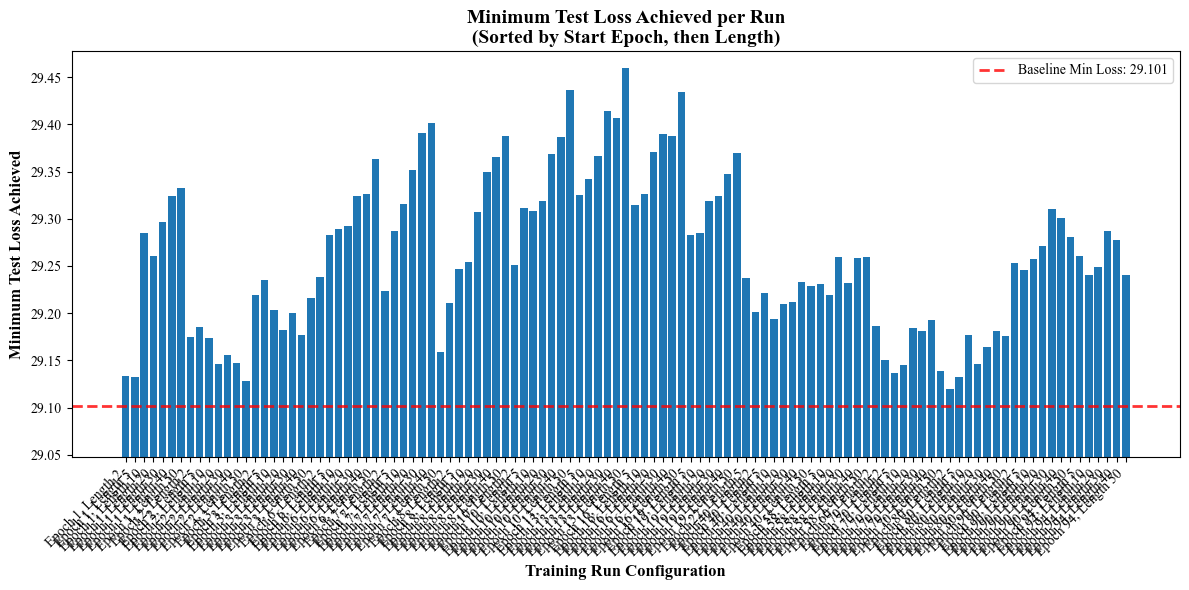

Run order (sorted by start epoch, then length):
   1. Epoch 1, Length 2 (min loss: 29.133)
   2. Epoch 1, Length 5 (min loss: 29.132)
   3. Epoch 1, Length 10 (min loss: 29.284)
   4. Epoch 1, Length 20 (min loss: 29.261)
   5. Epoch 1, Length 30 (min loss: 29.297)
   6. Epoch 1, Length 40 (min loss: 29.325)
   7. Epoch 1, Length 50 (min loss: 29.332)
   8. Epoch 2, Length 2 (min loss: 29.175)
   9. Epoch 2, Length 5 (min loss: 29.185)
  10. Epoch 2, Length 10 (min loss: 29.173)
  11. Epoch 2, Length 20 (min loss: 29.146)
  12. Epoch 2, Length 30 (min loss: 29.156)
  13. Epoch 2, Length 40 (min loss: 29.147)
  14. Epoch 2, Length 50 (min loss: 29.129)
  15. Epoch 3, Length 2 (min loss: 29.219)
  16. Epoch 3, Length 5 (min loss: 29.236)
  17. Epoch 3, Length 10 (min loss: 29.203)
  18. Epoch 3, Length 20 (min loss: 29.182)
  19. Epoch 3, Length 30 (min loss: 29.200)
  20. Epoch 3, Length 40 (min loss: 29.177)
  21. Epoch 3, Length 50 (min loss: 29.216)
  22. Epoch 6, Length 2 (min loss:

In [94]:
# Group all_perturb_length_data by 'run_dir' and plot the minimum test loss achieved for each one,
# with x-axis labels showing "Epoch X, length Y" format, sorted by epoch then length

# First, combine all DataFrames from the dictionary into a single DataFrame
# Add 'run_dir' column to each DataFrame before concatenating
combined_dataframes = []
for run_name, df in all_perturb_length_data.items():
    if len(df) > 0:  # Only add non-empty DataFrames
        df_copy = df.copy()
        df_copy['run_dir'] = run_name  # Add the run_dir column
        combined_dataframes.append(df_copy)

# Concatenate all DataFrames into one
if combined_dataframes:
    all_perturb_length_data_combined = pd.concat(combined_dataframes, ignore_index=True)
    
    # Now you can use it as a DataFrame
    if 'run_dir' in all_perturb_length_data_combined.columns:
        grouped = all_perturb_length_data_combined.groupby('run_dir')
        min_test_losses = grouped['test_loss'].min().reset_index()

        # Create labels in "Epoch X, length Y" format and extract sorting keys
        def parse_run_name(run_name):
            """Extract epoch and length from run name for sorting and labeling"""
            if 'random_target_e' in run_name:
                # Parse run name - format: "random_target_e{epoch}_l{length}"
                parts = run_name.split('_')
                start_epoch = None
                length = None

                for part in parts:
                    if part.startswith('e') and part[1:].isdigit():
                        start_epoch = int(part[1:])
                    elif part.startswith('l') and part[1:].isdigit():
                        length = int(part[1:])
                
                if start_epoch is not None and length is not None:
                    return start_epoch, length, f"Epoch {start_epoch}, Length {length}"
                else:
                    return 0, 0, run_name  # fallback
            else:
                return 0, 0, run_name  # fallback
        
        # Parse all run names and create sorting data
        run_data = []
        for _, row in min_test_losses.iterrows():
            run_name = row['run_dir']
            start_epoch, length, label = parse_run_name(run_name)
            run_data.append({
                'run_name': run_name,
                'start_epoch': start_epoch,
                'length': length,
                'label': label,
                'min_loss': row['test_loss']
            })
        
        # Sort by start_epoch first, then by length
        run_data_sorted = sorted(run_data, key=lambda x: (x['start_epoch'], x['length']))
        
        # Extract sorted data for plotting
        sorted_labels = [item['label'] for item in run_data_sorted]
        sorted_losses = [item['min_loss'] for item in run_data_sorted]

        # Calculate baseline minimum test loss
        baseline_min_loss = baseline_df['test_loss'].min()

        plt.figure(figsize=(12,6))
        bars = plt.bar(range(len(sorted_losses)), sorted_losses)
        
        # Add horizontal dotted line for baseline minimum test loss
        plt.axhline(y=baseline_min_loss, color='red', linestyle='--', linewidth=2, 
                    alpha=0.8, label=f'Baseline Min Loss: {baseline_min_loss:.3f}')
        
        plt.xlabel('Training Run Configuration', fontsize=12, fontweight='bold')
        plt.ylabel('Minimum Test Loss Achieved', fontsize=12, fontweight='bold')
        plt.title('Minimum Test Loss Achieved per Run\n(Sorted by Start Epoch, then Length)', fontsize=14, fontweight='bold')
        
        # Set x-axis labels
        plt.xticks(range(len(sorted_labels)), sorted_labels, rotation=45, ha='right')
        
        # Set the y-axis to zoom in: don't start at zero, but leave a bit of margin
        y_min = min(sorted_losses)
        y_max = max(sorted_losses)
        
        # Ensure baseline line is visible by expanding lower boundary if needed
        y_min = min(y_min, baseline_min_loss)
        y_range = y_max - y_min
        y_margin_lower = y_range * 0.15  # 15% margin on lower side
        y_margin_upper = y_range * 0.05  # 5% margin on upper side
        
        plt.ylim(y_min - y_margin_lower, y_max + y_margin_upper)

        # Add legend
        plt.legend(loc='best', fontsize=10, framealpha=0.8)

        plt.tight_layout()
        plt.show()

        # Print the sorted order for verification
        print("Run order (sorted by start epoch, then length):")
        for i, item in enumerate(run_data_sorted):
            print(f"  {i+1:2d}. {item['label']} (min loss: {item['min_loss']:.3f})")
        
        # Print baseline comparison
        print(f"\nBaseline minimum test loss: {baseline_min_loss:.3f}")
        better_than_baseline = sum(1 for loss in sorted_losses if loss < baseline_min_loss)
        worse_than_baseline = sum(1 for loss in sorted_losses if loss >= baseline_min_loss)
        print(f"Runs better than baseline: {better_than_baseline}/{len(sorted_losses)}")
        print(f"Runs worse than baseline: {worse_than_baseline}/{len(sorted_losses)}")
    else:
        print("Column 'run_dir' not found after combining data.")
else:
    print("No data in all_perturb_length_data dictionary.")

In [95]:
# Plot difference from baseline test_loss for each run_dir group as separate subplots with bar plots

# First, let's check if we have the baseline data and all_perturb_length_data
if 'baseline_df' in locals() and baseline_df is not None and 'all_perturb_length_data' in locals() and not all_perturb_length_data.empty:
    
    # Get unique run_dir values
    unique_run_dirs = all_perturb_length_data['run_dir'].unique()
    
    # Parse run names to extract epoch and length for sorting
    def parse_run_name(run_name):
        """Parse run name like 'random_target_e2_l2' to extract epoch and length"""
        try:
            # Extract epoch and length from run name
            parts = run_name.split('_')
            epoch_part = None
            length_part = None
            
            for part in parts:
                if part.startswith('e') and part[1:].isdigit():
                    epoch_part = int(part[1:])
                elif part.startswith('l') and part[1:].isdigit():
                    length_part = int(part[1:])
            
            return epoch_part, length_part
        except:
            return None, None
    
    # Create sorting data for each run
    run_data_for_sorting = []
    for run_dir in unique_run_dirs:
        start_epoch, length = parse_run_name(run_dir)
        if start_epoch is not None and length is not None:
            run_data_for_sorting.append({
                'run_dir': run_dir,
                'start_epoch': start_epoch,
                'length': length
            })
    
    # Sort by start_epoch first, then by length
    run_data_for_sorting.sort(key=lambda x: (x['start_epoch'], x['length']))
    
    # Extract sorted run_dirs
    sorted_run_dirs = [item['run_dir'] for item in run_data_for_sorting]
    
    # Calculate number of rows and columns for subplots
    n_runs = len(sorted_run_dirs)
    n_cols = 3  # 3 columns
    n_rows = (n_runs + n_cols - 1) // n_cols  # Ceiling division
    
    # Create subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    
    # Flatten axes array for easier indexing
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    axes_flat = axes.flatten()
    
    # First pass: collect all differences to determine global y-axis limits
    all_differences_global = []
    for run_dir in sorted_run_dirs:
        run_data = all_perturb_length_data[all_perturb_length_data['run_dir'] == run_dir]
        for _, row in run_data.iterrows():
            epoch = row['epoch']
            test_loss = row['test_loss']
            baseline_at_epoch = baseline_df[baseline_df['epoch'] == epoch]
            if len(baseline_at_epoch) > 0:
                baseline_test_loss = baseline_at_epoch['test_loss'].iloc[0]
                difference = baseline_test_loss - test_loss  # baseline - run, so that if the run has larger test loss, the difference will be negative
                all_differences_global.append(difference)
    
    # Set global y-axis limits
    if all_differences_global:
        global_min = min(all_differences_global)
        global_max = max(all_differences_global)
        padding = max(abs(global_min), abs(global_max)) * 0.1
        global_ylim = (global_min - padding, global_max + padding)
    else:
        global_ylim = (-0.01, 0.01)
    
    # Process each run_dir in sorted order 
    for i, run_dir in enumerate(sorted_run_dirs):
        ax = axes_flat[i]
        
        # Filter data for this run_dir
        run_data = all_perturb_length_data[all_perturb_length_data['run_dir'] == run_dir].copy()
        
        # Sort by epoch to ensure proper ordering
        run_data = run_data.sort_values('epoch')
        
        # Calculate difference from baseline test_loss for each epoch
        differences = []
        epochs = []
        
        for _, row in run_data.iterrows():
            epoch = row['epoch']
            test_loss = row['test_loss']
            
            # Find corresponding baseline test_loss for this epoch
            baseline_at_epoch = baseline_df[baseline_df['epoch'] == epoch]
            
            if len(baseline_at_epoch) > 0:
                baseline_test_loss = baseline_at_epoch['test_loss'].iloc[0]
                difference = baseline_test_loss - test_loss  # baseline - run, so that if the run has larger test loss, the difference will be negative
                differences.append(difference)
                epochs.append(epoch)
        
        # Create bar plot
        if differences:  # Only plot if we have data
            bars = ax.bar(epochs, differences, 
                         color='steelblue', 
                         alpha=0.7,
                         edgecolor='navy',
                         linewidth=0.5)
            
            # Color bars based on whether they're positive or negative
            for j, bar in enumerate(bars):
                if differences[j] > 0:
                    bar.set_color('green')  # Better than baseline (positive difference means baseline loss was higher)
                    bar.set_alpha(0.7)
                else:
                    bar.set_color('red')  # Worse than baseline (negative difference means baseline loss was lower)
                    bar.set_alpha(0.7)
            
            # Add horizontal line at y=0 to show baseline
            ax.axhline(y=0, color='black', linestyle='-', alpha=0.8, linewidth=1)
            
            # Get epoch and length for title
            start_epoch, length = parse_run_name(run_dir)
            title = f'Epoch {start_epoch}, Length {length}' if start_epoch is not None and length is not None else run_dir
            
            # Customize the subplot
            ax.set_title(title, fontsize=10, fontweight='bold')
            ax.set_xlabel('Epoch', fontsize=9)
            ax.set_ylabel('Test Loss Difference (Baseline - Run)', fontsize=9)
            ax.grid(True, alpha=0.3)
            
            # Set all subplots to use the same y-axis limits for comparison
            ax.set_ylim(global_ylim)
            
            # Add text annotation showing summary stats
            mean_diff = np.mean(differences)
            ax.text(0.02, 0.98, f'Mean: {mean_diff:.3f}', 
                   transform=ax.transAxes, 
                   verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
                   fontsize=8)
    
    # Hide unused subplots
    for i in range(n_runs, len(axes_flat)):
        axes_flat[i].set_visible(False)
    
    # Add overall title
    fig.suptitle('Test Loss Difference from Baseline by Run Directory\n(Sorted by Starting Epoch, then Perturbation Length)', 
                 fontsize=16, fontweight='bold', y=0.98)
    
    # Adjust layout
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    
    # Show the plot
    plt.show()
    
    # Print summary statistics
    print(f"\nSummary:")
    print(f"Number of run_dir groups: {len(sorted_run_dirs)}")
    print(f"Total data points: {len(all_perturb_length_data)}")
    print(f"Baseline data points: {len(baseline_df)}")
    print(f"Global y-axis range: [{global_ylim[0]:.4f}, {global_ylim[1]:.4f}]")
    
    # Print the sorted order for verification
    print("\nRun order (sorted by start epoch, then length):")
    for i, item in enumerate(run_data_for_sorting):
        print(f"  {i+1:2d}. Epoch {item['start_epoch']}, Length {item['length']} ({item['run_dir']})")
    
    # Calculate overall statistics
    all_differences = []
    for run_dir in sorted_run_dirs:
        run_data = all_perturb_length_data[all_perturb_length_data['run_dir'] == run_dir]
        for _, row in run_data.iterrows():
            epoch = row['epoch']
            test_loss = row['test_loss']
            baseline_at_epoch = baseline_df[baseline_df['epoch'] == epoch]
            if len(baseline_at_epoch) > 0:
                baseline_test_loss = baseline_at_epoch['test_loss'].iloc[0]
                difference = baseline_test_loss - test_loss  
                all_differences.append(difference)
    
    if all_differences:
        print(f"\nOverall Statistics:")
        print(f"Mean difference: {np.mean(all_differences):.4f}")
        print(f"Std difference: {np.std(all_differences):.4f}")
        print(f"Min difference: {np.min(all_differences):.4f}")
        print(f"Max difference: {np.max(all_differences):.4f}")
        
        # Count positive vs negative differences
        positive_diffs = sum(1 for d in all_differences if d > 0)
        negative_diffs = sum(1 for d in all_differences if d < 0)
        print(f"Positive differences (better than baseline): {positive_diffs}")
        print(f"Negative differences (worse than baseline): {negative_diffs}")
        
        # Print per-run statistics
        print(f"\nPer-run statistics:")
        for item in run_data_for_sorting:
            run_dir = item['run_dir']
            run_data = all_perturb_length_data[all_perturb_length_data['run_dir'] == run_dir]
            run_differences = []
            for _, row in run_data.iterrows():
                epoch = row['epoch']
                test_loss = row['test_loss']
                baseline_at_epoch = baseline_df[baseline_df['epoch'] == epoch]
                if len(baseline_at_epoch) > 0:
                    baseline_test_loss = baseline_at_epoch['test_loss'].iloc[0]
                    difference = baseline_test_loss - test_loss 
                    run_differences.append(difference)
            
            if run_differences:
                mean_diff = np.mean(run_differences)
                print(f"  Epoch {item['start_epoch']}, Length {item['length']}: Mean diff = {mean_diff:.4f}, Range = [{np.min(run_differences):.4f}, {np.max(run_differences):.4f}]")

else:
    print("Error: Missing baseline data or all_perturb_length_data")
    if 'baseline_df' not in locals():
        print("  - baseline_df not found")
    elif baseline_df is None:
        print("  - baseline_df is None")
    if 'all_perturb_length_data' not in locals():
        print("  - all_perturb_length_data not found")
    elif all_perturb_length_data.empty:
        print("  - all_perturb_length_data is empty")


AttributeError: 'dict' object has no attribute 'empty'

In [103]:
# Calculate recovery times for test loss within 1% of baseline after perturbations finish
recovery_data = []

for run_info in run_metadata:
    run_name = run_info['run_name']
    df = run_info['df']
    start_epoch = run_info['start_epoch']
    length = run_info['length']
    
    # Calculate when perturbation ends
    perturbation_end = start_epoch + length - 1
    
    # Sort the run data by epoch
    df_sorted = df.sort_values('epoch')
    
    # Find the first epoch AFTER perturbation ends where test_loss is within 1% of baseline
    recovery_epoch = None
    
    for _, row in df_sorted.iterrows():
        current_epoch = int(row['epoch'])
        # Only check epochs after perturbation has ended
        if current_epoch <= perturbation_end:
            continue
        # Get baseline loss at the same epoch
        baseline_at_same_epoch = baseline_df[baseline_df['epoch'] == current_epoch]
        if len(baseline_at_same_epoch) > 0:
            baseline_loss = baseline_at_same_epoch.iloc[0]['test_loss']
            target_loss = baseline_loss * 1.01  # Within 1% of baseline at same epoch
            if row['test_loss'] <= target_loss:
                recovery_epoch = current_epoch
                break
        else:
            # compare to the minimum test loss epoch
            baseline_loss = baseline_df['test_loss'].min()
            target_loss = baseline_loss * 1.01
            if row['test_loss'] <= target_loss:
                recovery_epoch = current_epoch
                break
        
    if recovery_epoch is not None:
        epochs_to_recovery = recovery_epoch - perturbation_end
        recovery_data.append({
            'run_name': run_name,
            'start_epoch': start_epoch,
            'length': length,
            'perturbation_end': perturbation_end,
            'recovery_epoch': recovery_epoch,
            'epochs_to_recovery': epochs_to_recovery,
            'label': f'E{start_epoch}_L{length}',
            'recovered': True
        })
    else:
        #max_epoch_in_run = df_sorted['epoch'].max()
        #epochs_after_perturbation = max_epoch_in_run - perturbation_end
        epochs_to_recovery = None
        recovery_data.append({
            'run_name': run_name,
            'start_epoch': start_epoch,
            'length': length,
            'perturbation_end': perturbation_end,
            'recovery_epoch': None,
            'epochs_to_recovery': None,
            'label': f'E{start_epoch}_L{length}',
            'recovered': False
        })

# Convert to DataFrame for easier manipulation
recovery_df = pd.DataFrame(recovery_data)

# Sort by start_epoch, then by length for better visualization
recovery_df = recovery_df.sort_values(['start_epoch', 'length'])

print(recovery_df)


                  run_name  start_epoch  length  perturbation_end  \
26     random_target_e1_l2            1       2                 2   
30     random_target_e1_l5            1       5                 5   
25    random_target_e1_l10            1      10                10   
27    random_target_e1_l20            1      20                20   
28    random_target_e1_l30            1      30                30   
..                     ...          ...     ...               ...   
103  random_target_e94_l10           94      10               103   
104  random_target_e94_l20           94      20               113   
105  random_target_e94_l30           94      30               123   
106  random_target_e94_l40           94      40               133   
108  random_target_e94_l50           94      50               143   

     recovery_epoch  epochs_to_recovery    label  recovered  
26             43.0                41.0    E1_L2       True  
30             58.0                53.0    E1_L

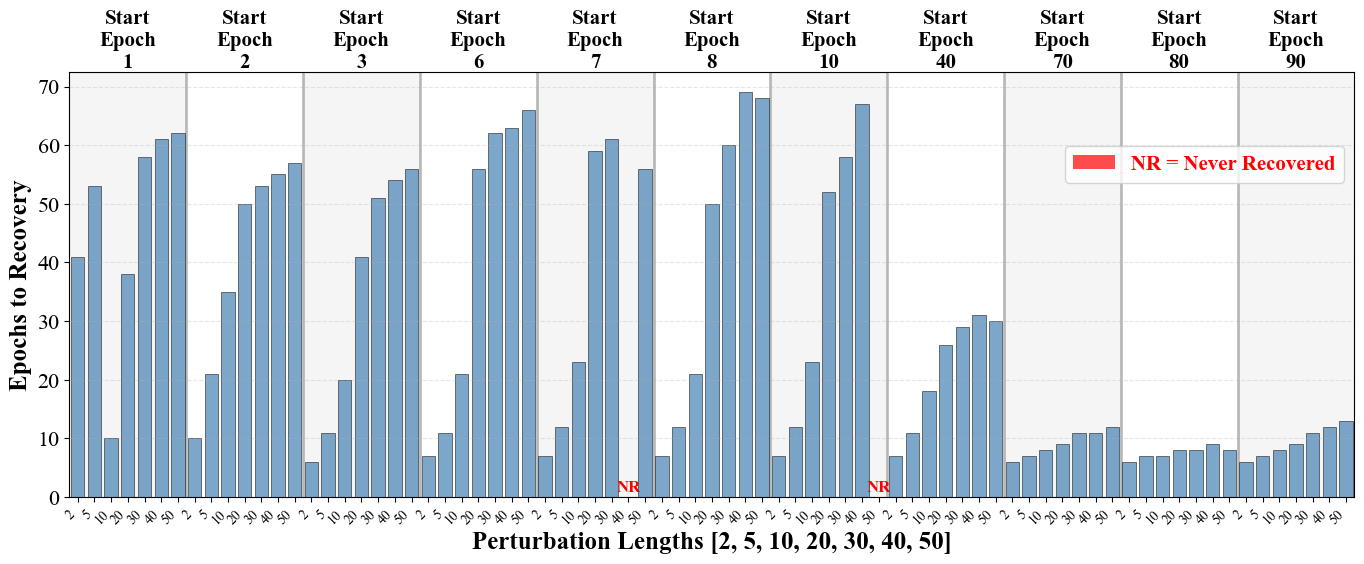


Recovery time statistics (epochs to within 1% of baseline after perturbation ends):
  Total runs analyzed: 109
  Runs that recovered: 103
  Runs that never recovered: 6
  Mean recovery time (recovered runs): 28.8 epochs
  Standard deviation: 22.0 epochs
  Minimum recovery time: 6 epochs
  Maximum recovery time (recovered): 71 epochs

Never recovered runs:
  E7_L40: nan epochs after perturbation (still not recovered)
  E10_L50: nan epochs after perturbation (still not recovered)
  E13_L30: nan epochs after perturbation (still not recovered)
  E13_L40: nan epochs after perturbation (still not recovered)
  E13_L50: nan epochs after perturbation (still not recovered)
  E16_L50: nan epochs after perturbation (still not recovered)


In [104]:

# Separate recovered and never-recovered runs
recovered_runs = recovery_df[recovery_df['recovered'] == True].copy()
never_recovered_runs = recovery_df[recovery_df['recovered'] == False].copy()

import matplotlib as mpl
from matplotlib.patches import Patch

# Exclude any rows you want to exclude
recovery_df = recovery_df[recovery_df['start_epoch'] != 13]
recovery_df = recovery_df[recovery_df['start_epoch'] != 16]
recovery_df = recovery_df[recovery_df['start_epoch'] != 19]
recovery_df = recovery_df[recovery_df['start_epoch'] != 22]
recovery_df = recovery_df[recovery_df['start_epoch'] != 60]
recovery_df = recovery_df[recovery_df['start_epoch'] != 58]
recovery_df = recovery_df[recovery_df['start_epoch'] != 94]

# Set width statically to 10 inches
plt.figure(figsize=(14, 6))

# Group by start_epoch for section delineation
x_positions = []
y_values = []
colors = []
x_labels = []
section_boundaries = []
section_centers = []
section_label_map = {}
curr_x = 0
recovery_rows = []

unique_epochs = sorted(recovery_df['start_epoch'].unique())

# Build plot arrays and calculate boundaries
for start_epoch in unique_epochs:
    section_data = recovery_df[recovery_df['start_epoch'] == start_epoch]
    section_start = curr_x  # inclusive bar
    for _, row in section_data.iterrows():
        x_positions.append(curr_x)
        # For never-recovered runs, set y to 0 so the bar is invisible
        if row['recovered']:
            y_values.append(row['epochs_to_recovery'])
        else:
            y_values.append(0)
        colors.append('steelblue' if row['recovered'] else 'red')
        x_labels.append(f"{row['length']}")
        recovery_rows.append(row)
        curr_x += 1
    section_end = curr_x - 1  # inclusive bar
    section_boundaries.append((section_start - 0.5, section_end + 0.5))
    section_centers.append((section_start + section_end) / 2)
    section_label_map[start_epoch] = (section_start, section_end)

bars = plt.bar(x_positions, y_values, alpha=0.7, color=colors, edgecolor='black', linewidth=0.5)

# Add "NR" annotation *at the bar position* for not recovered
for i, row in enumerate(recovery_rows):
    if not row['recovered']:
        # Place the "NR" right above zero, or slightly above the bar bottom
        plt.text(x_positions[i], 0.3, 'NR', ha='center', va='bottom', 
                 fontsize=12, fontweight='bold', color='red', zorder=10, clip_on=False)

plt.xlabel('Perturbation Lengths [2, 5, 10, 20, 30, 40, 50]', fontsize=18, fontweight='bold')
plt.ylabel('Epochs to Recovery', fontsize=18, fontweight='bold')

# Make y-axis tick labels larger
plt.yticks(fontsize=16)

# Section annotation: add a "Start Epoch {start_epoch}" label above each group only at the group's x center, but below the top border
ymax = plt.ylim()[1]
# Place label a fixed distance below the top
offset = 0 * ymax  # You can adjust this if desired (e.g. 0.02 or 0.05)
label_y = ymax - offset
for center, start_epoch in zip(section_centers, unique_epochs):
    plt.text(center, label_y, f"Start\nEpoch\n{start_epoch}", ha='center', va='bottom',
             fontsize=15, fontweight='bold', color='black', clip_on=False)

plt.ylim(top=ymax)  # Set top limit to origin ymax (no margin needed for label)

# Draw vertical lines between different start_epoch sections (except after the last)
for i in range(1, len(section_centers)):
    right = section_boundaries[i][0]  # position between bars
    plt.axvline(right, color='gray', linestyle='-', lw=2, alpha=0.5, zorder=0)

# Add background shading for every other section
for i, (section_start, section_end) in enumerate(section_boundaries):
    if i % 2 == 0:
        plt.axvspan(section_start, section_end, color='gray', alpha=0.08, zorder=0)

plt.xticks(x_positions, x_labels, rotation=45, ha='right', fontsize=10)
plt.grid(True, alpha=0.3, linestyle='--', axis='y')

# Remove x-axis padding to left and right
if x_positions:
    plt.xlim(left=min(x_positions) - 0.5, right=max(x_positions) + 0.5)

# Create legend with red, bold text
legend_elements = [
    Patch(facecolor='red', alpha=0.7, label='NR = Never Recovered')
]
plt.legend(
    handles=legend_elements,
    fontsize=13,
    loc='upper right',
    bbox_to_anchor=(1, 0.85),
    labelcolor='red',
    prop={'weight': 'bold',
          'size': 15}
)

plt.tight_layout(pad=2)
plt.show()

# Print summary statistics
print(f"\nRecovery time statistics (epochs to within 1% of baseline after perturbation ends):")
print(f"  Total runs analyzed: {len(recovery_data)}")
print(f"  Runs that recovered: {len(recovered_runs)}")
print(f"  Runs that never recovered: {len(never_recovered_runs)}")
if len(recovered_runs) > 0:
    mean_recovery = recovered_runs['epochs_to_recovery'].mean()
    std_recovery = recovered_runs['epochs_to_recovery'].std()
    min_recovery = recovered_runs['epochs_to_recovery'].min()
    max_recovery = recovered_runs['epochs_to_recovery'].max()
    print(f"  Mean recovery time (recovered runs): {mean_recovery:.1f} epochs")
    print(f"  Standard deviation: {std_recovery:.1f} epochs")
    print(f"  Minimum recovery time: {min_recovery:.0f} epochs")
    print(f"  Maximum recovery time (recovered): {max_recovery:.0f} epochs")
    
print(f"\nNever recovered runs:")
for _, row in never_recovered_runs.iterrows():
    print(f"  {row['label']}: {row['epochs_to_recovery']:.0f} epochs after perturbation (still not recovered)")

In [105]:
# Calculate recovery times for behavioral alignment within 1% of baseline after perturbations finish
recovery_data = []

for run_info in run_metadata:
    run_name = run_info['run_name']
    df = run_info['df']
    start_epoch = run_info['start_epoch']
    length = run_info['length']
    
    # Calculate when perturbation ends
    perturbation_end = start_epoch + length - 1
    
    # Sort the run data by epoch
    df_sorted = df.sort_values('epoch')
    
    # Find the first epoch AFTER perturbation ends where behavioral alignment is within 1% of baseline
    recovery_epoch = None
    
    for _, row in df_sorted.iterrows():
        current_epoch = int(row['epoch'])
        # Only check epochs after perturbation has ended
        if current_epoch <= perturbation_end:
            continue
        # Get baseline behavioral alignment at the same epoch
        baseline_at_same_epoch = baseline_df[baseline_df['epoch'] == current_epoch]
        if len(baseline_at_same_epoch) > 0:
            baseline_ba = baseline_at_same_epoch.iloc[0]['behavioral_rsa_rho']
            target_ba = baseline_ba * 0.99  # Within 1% of baseline at same epoch
            if row['behavioral_rsa_rho'] >= target_ba:
                recovery_epoch = current_epoch
                break
        else:
            # compare to the minimum test loss epoch
            baseline_ba = baseline_df['behavioral_rsa_rho'].min()
            target_ba = baseline_ba * 0.99
            if row['behavioral_rsa_rho'] >= target_ba:
                recovery_epoch = current_epoch
                break
        
    if recovery_epoch is not None:
        epochs_to_recovery = recovery_epoch - perturbation_end
        recovery_data.append({
            'run_name': run_name,
            'start_epoch': start_epoch,
            'length': length,
            'perturbation_end': perturbation_end,
            'recovery_epoch': recovery_epoch,
            'epochs_to_recovery': epochs_to_recovery,
            'label': f'E{start_epoch}_L{length}',
            'recovered': True
        })
    else:
        #max_epoch_in_run = df_sorted['epoch'].max()
        #epochs_after_perturbation = max_epoch_in_run - perturbation_end
        epochs_to_recovery = None
        recovery_data.append({
            'run_name': run_name,
            'start_epoch': start_epoch,
            'length': length,
            'perturbation_end': perturbation_end,
            'recovery_epoch': None,
            'epochs_to_recovery': None,
            'label': f'E{start_epoch}_L{length}',
            'recovered': False
        })

# Convert to DataFrame for easier manipulation
recovery_df = pd.DataFrame(recovery_data)

# Sort by start_epoch, then by length for better visualization
recovery_df = recovery_df.sort_values(['start_epoch', 'length'])

print(recovery_df)

                  run_name  start_epoch  length  perturbation_end  \
26     random_target_e1_l2            1       2                 2   
30     random_target_e1_l5            1       5                 5   
25    random_target_e1_l10            1      10                10   
27    random_target_e1_l20            1      20                20   
28    random_target_e1_l30            1      30                30   
..                     ...          ...     ...               ...   
103  random_target_e94_l10           94      10               103   
104  random_target_e94_l20           94      20               113   
105  random_target_e94_l30           94      30               123   
106  random_target_e94_l40           94      40               133   
108  random_target_e94_l50           94      50               143   

     recovery_epoch  epochs_to_recovery    label  recovered  
26                3                   1    E1_L2       True  
30               18                  13    E1_L

Empty DataFrame
Columns: [run_name, start_epoch, length, perturbation_end, recovery_epoch, epochs_to_recovery, label, recovered]
Index: []


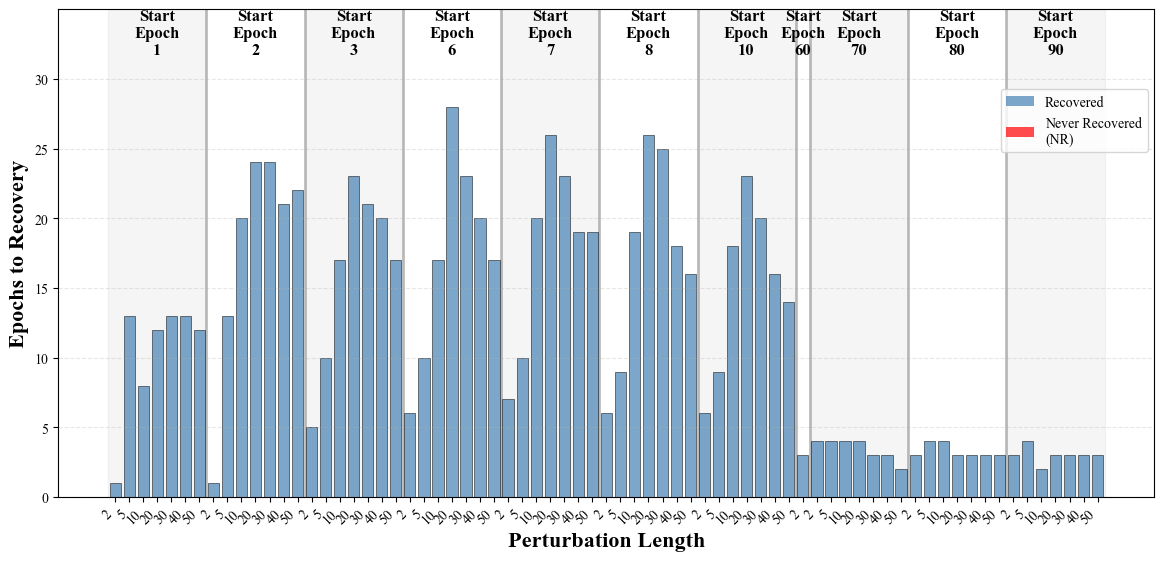


Recovery time statistics (epochs to within 1% of baseline after perturbation ends):
  Total runs analyzed: 109
  Runs that recovered: 109
  Runs that never recovered: 0
  Mean recovery time (recovered runs): 10.8 epochs
  Standard deviation: 7.6 epochs
  Minimum recovery time: 1 epochs
  Maximum recovery time (recovered): 28 epochs

Never recovered runs:


In [106]:
# Separate recovered and never-recovered runs
recovered_runs = recovery_df[recovery_df['recovered'] == True].copy()
never_recovered_runs = recovery_df[recovery_df['recovered'] == False].copy()

print(never_recovered_runs)

import matplotlib as mpl
from matplotlib.patches import Patch

# Exclude any rows you want to exclude
recovery_df = recovery_df[recovery_df['start_epoch'] != 13]
recovery_df = recovery_df[recovery_df['start_epoch'] != 16]
recovery_df = recovery_df[recovery_df['start_epoch'] != 19]
recovery_df = recovery_df[recovery_df['start_epoch'] != 22]
recovery_df = recovery_df[recovery_df['start_epoch'] != 40]
recovery_df = recovery_df[recovery_df['start_epoch'] != 58]
recovery_df = recovery_df[recovery_df['start_epoch'] != 94]

# Set a less wide figure for the plot
# Set width statically to 10 inches, but ensure at least a minimum
n_bars = len(recovery_df)
fig_w = min(12, max(7, n_bars * 0.5 + 3))  # narrower bars, less scaling per bar
plt.figure(figsize=(fig_w, 6))

# Group by start_epoch for section delineation
x_positions = []
y_values = []
colors = []
x_labels = []
section_boundaries = []
section_centers = []
section_label_map = {}
curr_x = 0
recovery_rows = []

unique_epochs = sorted(recovery_df['start_epoch'].unique())

# Build plot arrays and calculate boundaries
for start_epoch in unique_epochs:
    section_data = recovery_df[recovery_df['start_epoch'] == start_epoch]
    section_start = curr_x  # inclusive bar
    for _, row in section_data.iterrows():
        x_positions.append(curr_x)
        # For never-recovered runs, set y to 0 so the bar is invisible
        if row['recovered']:
            y_values.append(row['epochs_to_recovery'])
        else:
            y_values.append(0)
        colors.append('steelblue' if row['recovered'] else 'red')
        x_labels.append(f"{row['length']}")
        recovery_rows.append(row)
        curr_x += 1
    section_end = curr_x - 1  # inclusive bar
    section_boundaries.append((section_start - 0.5, section_end + 0.5))
    section_centers.append((section_start + section_end) / 2)
    section_label_map[start_epoch] = (section_start, section_end)

bars = plt.bar(x_positions, y_values, alpha=0.7, color=colors, edgecolor='black', linewidth=0.5)

# Add "NR" annotation *at the bar position* for not recovered
for i, row in enumerate(recovery_rows):
    if not row['recovered']:
        # Place the "NR" right above zero, or slightly above the bar bottom
        plt.text(x_positions[i], 0.3, 'NR', ha='center', va='bottom', 
                 fontsize=12, fontweight='bold', color='red', zorder=10, clip_on=False)

plt.xlabel('Perturbation Length', fontsize=16, fontweight='bold')
plt.ylabel('Epochs to Recovery', fontsize=16, fontweight='bold')

# Section annotation: add a "Start Epoch {start_epoch}" label above each group only at the group's x center
ymax = plt.ylim()[1]
label_y = ymax + 0.07 * ymax
for center, start_epoch in zip(section_centers, unique_epochs):
    plt.text(center, label_y, f"Start\nEpoch\n{start_epoch}", ha='center', va='bottom',
             fontsize=12, fontweight='bold', color='black', clip_on=False)

plt.ylim(top=label_y + 0.12 * ymax)

# Draw vertical lines between different start_epoch sections (except after the last)
for i in range(1, len(section_centers)):
    right = section_boundaries[i][0]  # position between bars
    plt.axvline(right, color='gray', linestyle='-', lw=2, alpha=0.5, zorder=0)

# Add background shading for every other section
for i, (section_start, section_end) in enumerate(section_boundaries):
    if i % 2 == 0:
        plt.axvspan(section_start, section_end, color='gray', alpha=0.08, zorder=0)

plt.xticks(x_positions, x_labels, rotation=45, ha='right', fontsize=10)
plt.grid(True, alpha=0.3, linestyle='--', axis='y')

# Create legend
legend_elements = [
    Patch(facecolor='steelblue', alpha=0.7, label='Recovered'),
    Patch(facecolor='red', alpha=0.7, label='Never Recovered\n(NR)')
]
plt.legend(handles=legend_elements, fontsize=10, loc='upper right', bbox_to_anchor=(1, 0.85))

plt.tight_layout(pad=2)
plt.show()

# Print summary statistics
print(f"\nRecovery time statistics (epochs to within 1% of baseline after perturbation ends):")
print(f"  Total runs analyzed: {len(recovery_data)}")
print(f"  Runs that recovered: {len(recovered_runs)}")
print(f"  Runs that never recovered: {len(never_recovered_runs)}")
if len(recovered_runs) > 0:
    mean_recovery = recovered_runs['epochs_to_recovery'].mean()
    std_recovery = recovered_runs['epochs_to_recovery'].std()
    min_recovery = recovered_runs['epochs_to_recovery'].min()
    max_recovery = recovered_runs['epochs_to_recovery'].max()
    print(f"  Mean recovery time (recovered runs): {mean_recovery:.1f} epochs")
    print(f"  Standard deviation: {std_recovery:.1f} epochs")
    print(f"  Minimum recovery time: {min_recovery:.0f} epochs")
    print(f"  Maximum recovery time (recovered): {max_recovery:.0f} epochs")
    
print(f"\nNever recovered runs:")
for _, row in never_recovered_runs.iterrows():
    print(f"  {row['label']}: {row['epochs_to_recovery']:.0f} epochs after perturbation (still not recovered)")


Summary Statistics:
  Baseline maximum BA (epoch 53): 0.7790
  Total runs: 77
  Mean deviation: -0.0065
  Standard deviation: 0.0060
  Min deviation: -0.0200
  Max deviation: 0.0064
  Runs better than baseline maximum: 9
  Runs worse than baseline maximum: 68


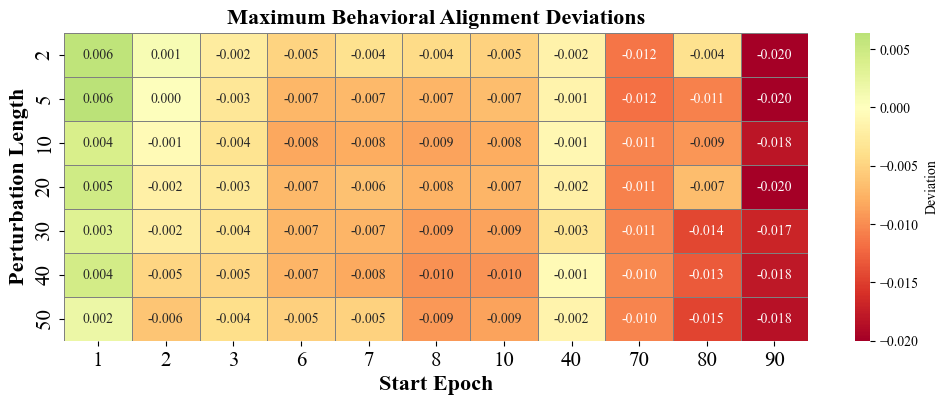

In [107]:
# show the deviation of the best experiment behavioral alignment from best baseline behavioral alignment in a heatmap, with starting epoch on the x-axis and perturbation length on the y-axis
# the color of the cell shows the deviation from baseline behavioral alignment
# the heatmap is sorted by starting epoch on the x-axis, then by perturbation length on the y-axis

import seaborn as sns

# Get maximum behavioral alignment from baseline run
baseline_max_ba = baseline_df['behavioral_rsa_rho'].max()
baseline_max_epoch = baseline_df.loc[baseline_df['behavioral_rsa_rho'].idxmax(), 'epoch']

# Collect maximum behavioral alignment deviations
deviation_data = []

for run_info in run_metadata:
    run_name = run_info['run_name']
    df = run_info['df']
    start_epoch = run_info['start_epoch']
    length = run_info['length']
    
    # Sort by epoch
    df_sorted = df.sort_values('epoch')
    
    if len(df_sorted) == 0:
        continue
    
    # Get maximum behavioral alignment value reached in this run
    max_ba = df_sorted['behavioral_rsa_rho'].max()
    max_ba_epoch = df_sorted.loc[df_sorted['behavioral_rsa_rho'].idxmax(), 'epoch']
    
    # Calculate deviation from baseline maximum
    # (positive = better than baseline, negative = worse)
    deviation = max_ba - baseline_max_ba

    deviation_data.append({
        'start_epoch': start_epoch,
        'length': length,
        'deviation': deviation,
        'max_ba': max_ba,
        'max_ba_epoch': max_ba_epoch,
        'baseline_max_ba': baseline_max_ba
    })

# Convert to DataFrame
deviation_df = pd.DataFrame(deviation_data)

# Exclude any rows you want to exclude
deviation_df = deviation_df[deviation_df['start_epoch'] != 13]
deviation_df = deviation_df[deviation_df['start_epoch'] != 16]
deviation_df = deviation_df[deviation_df['start_epoch'] != 19]
deviation_df = deviation_df[deviation_df['start_epoch'] != 22]
deviation_df = deviation_df[deviation_df['start_epoch'] != 60]
deviation_df = deviation_df[deviation_df['start_epoch'] != 58]
deviation_df = deviation_df[deviation_df['start_epoch'] != 94]



# Create pivot table for heatmap: rows (y-axis) = length, columns (x-axis) = start_epoch
heatmap_data = deviation_df.pivot_table(
    values='deviation',
    index='length',
    columns='start_epoch',
    aggfunc='first'  # Should only be one value per combination, but use first to be safe
)

# Sort by start_epoch (columns) and length (rows)
heatmap_data = heatmap_data.sort_index(axis=0)  # Sort rows (length)
heatmap_data = heatmap_data.sort_index(axis=1)  # Sort columns (start_epoch)

# Create the heatmap with smaller figure size
plt.figure(figsize=(12, 4))
ax = sns.heatmap(
    heatmap_data, 
    annot=True, 
    fmt='.3f', 
    cmap='RdYlGn',  # Red-Yellow-Green colormap (red=worse, green=better)
    center=0,  # Center colormap at 0 (no deviation)
    cbar_kws={'label': 'Deviation'},
    linewidths=0.5,
    linecolor='gray'
)
ax.set_xlabel('Start Epoch', fontsize=16, fontweight='bold')
ax.set_ylabel('Perturbation Length', fontsize=16, fontweight='bold')
ax.set_title('Maximum Behavioral Alignment Deviations', fontsize=16, fontweight='bold')
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

# Print summary statistics
print(f"\nSummary Statistics:")
print(f"  Baseline maximum BA (epoch {baseline_max_epoch}): {baseline_max_ba:.4f}")
print(f"  Total runs: {len(deviation_df)}")
print(f"  Mean deviation: {deviation_df['deviation'].mean():.4f}")
print(f"  Standard deviation: {deviation_df['deviation'].std():.4f}")
print(f"  Min deviation: {deviation_df['deviation'].min():.4f}")
print(f"  Max deviation: {deviation_df['deviation'].max():.4f}")
print(f"  Runs better than baseline maximum: {len(deviation_df[deviation_df['deviation'] > 0])}")
print(f"  Runs worse than baseline maximum: {len(deviation_df[deviation_df['deviation'] < 0])}")


Summary Statistics:
  Baseline minimum test loss (epoch 98): 29.1013
  Total runs: 77
  Mean deviation: 0.1416
  Standard deviation: 0.0795
  Min deviation: 0.0183
  Max deviation: 0.3354
  Runs better than baseline minimum (negative deviation): 0
  Runs worse than baseline minimum (positive deviation): 77


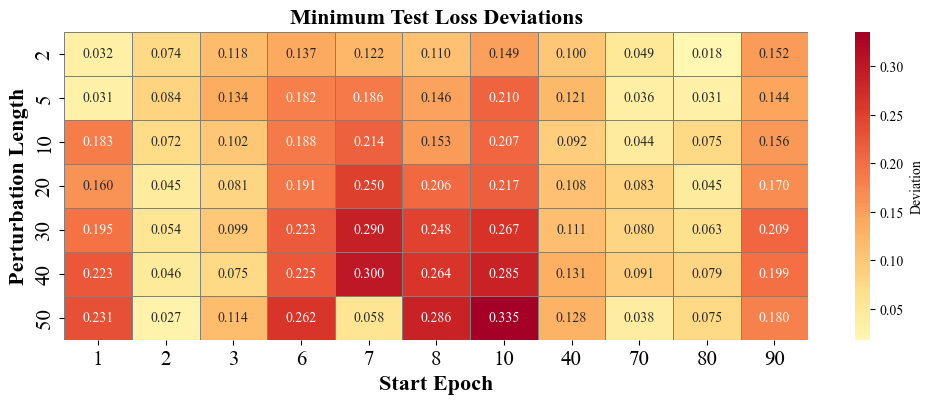

In [108]:
# show the deviation from baseline minimum test loss in a heatmap, with starting epoch on the x-axis and perturbation length on the y-axis
# the color of the cell shows the deviation from baseline minimum test loss
# the heatmap is sorted by starting epoch on the x-axis, then by perturbation length on the y-axis

import seaborn as sns

# Get minimum test loss from baseline run
baseline_min_test_loss = baseline_df['test_loss'].min()
baseline_min_epoch = baseline_df.loc[baseline_df['test_loss'].idxmin(), 'epoch']

# Collect minimum test loss deviations
deviation_data = []

for run_info in run_metadata:
    run_name = run_info['run_name']
    df = run_info['df']
    start_epoch = run_info['start_epoch']
    length = run_info['length']
    
    # Sort by epoch
    df_sorted = df.sort_values('epoch')
    
    if len(df_sorted) == 0:
        continue
    
    # Get minimum test loss value reached in this run
    min_test_loss = df_sorted['test_loss'].min()
    min_test_loss_epoch = df_sorted.loc[df_sorted['test_loss'].idxmin(), 'epoch']
    
    # Calculate deviation from baseline minimum
    # (positive = worse than baseline, negative = better)
    deviation = min_test_loss - baseline_min_test_loss

    deviation_data.append({
        'start_epoch': start_epoch,
        'length': length,
        'deviation': deviation,
        'min_test_loss': min_test_loss,
        'min_test_loss_epoch': min_test_loss_epoch,
        'baseline_min_test_loss': baseline_min_test_loss
    })

# Convert to DataFrame
deviation_df = pd.DataFrame(deviation_data)

# Exclude any rows you want to exclude
deviation_df = deviation_df[deviation_df['start_epoch'] != 13]
deviation_df = deviation_df[deviation_df['start_epoch'] != 16]
deviation_df = deviation_df[deviation_df['start_epoch'] != 19]
deviation_df = deviation_df[deviation_df['start_epoch'] != 22]
deviation_df = deviation_df[deviation_df['start_epoch'] != 60]
deviation_df = deviation_df[deviation_df['start_epoch'] != 58]
deviation_df = deviation_df[deviation_df['start_epoch'] != 94]

# Create pivot table for heatmap: rows (y-axis) = length, columns (x-axis) = start_epoch
heatmap_data = deviation_df.pivot_table(
    values='deviation',
    index='length',
    columns='start_epoch',
    aggfunc='first'  # Should only be one value per combination, but use first to be safe
)

# Sort by start_epoch (columns) and length (rows)
heatmap_data = heatmap_data.sort_index(axis=0)  # Sort rows (length)
heatmap_data = heatmap_data.sort_index(axis=1)  # Sort columns (start_epoch)

# Create the heatmap with smaller figure size
plt.figure(figsize=(12, 4))
ax = sns.heatmap(
    heatmap_data, 
    annot=True, 
    fmt='.3f', 
    cmap='RdYlGn_r',  # Reversed Red-Yellow-Green colormap (green=better/lower, red=worse/higher)
    center=0,  # Center colormap at 0 (no deviation)
    cbar_kws={'label': 'Deviation'},
    linewidths=0.5,
    linecolor='gray'
)
ax.set_xlabel('Start Epoch', fontsize=16, fontweight='bold')
ax.set_ylabel('Perturbation Length', fontsize=16, fontweight='bold')
ax.set_title('Minimum Test Loss Deviations', fontsize=16, fontweight='bold')
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

# Print summary statistics
print(f"\nSummary Statistics:")
print(f"  Baseline minimum test loss (epoch {baseline_min_epoch}): {baseline_min_test_loss:.4f}")
print(f"  Total runs: {len(deviation_df)}")
print(f"  Mean deviation: {deviation_df['deviation'].mean():.4f}")
print(f"  Standard deviation: {deviation_df['deviation'].std():.4f}")
print(f"  Min deviation: {deviation_df['deviation'].min():.4f}")
print(f"  Max deviation: {deviation_df['deviation'].max():.4f}")
print(f"  Runs better than baseline minimum (negative deviation): {len(deviation_df[deviation_df['deviation'] < 0])}")
print(f"  Runs worse than baseline minimum (positive deviation): {len(deviation_df[deviation_df['deviation'] > 0])}")

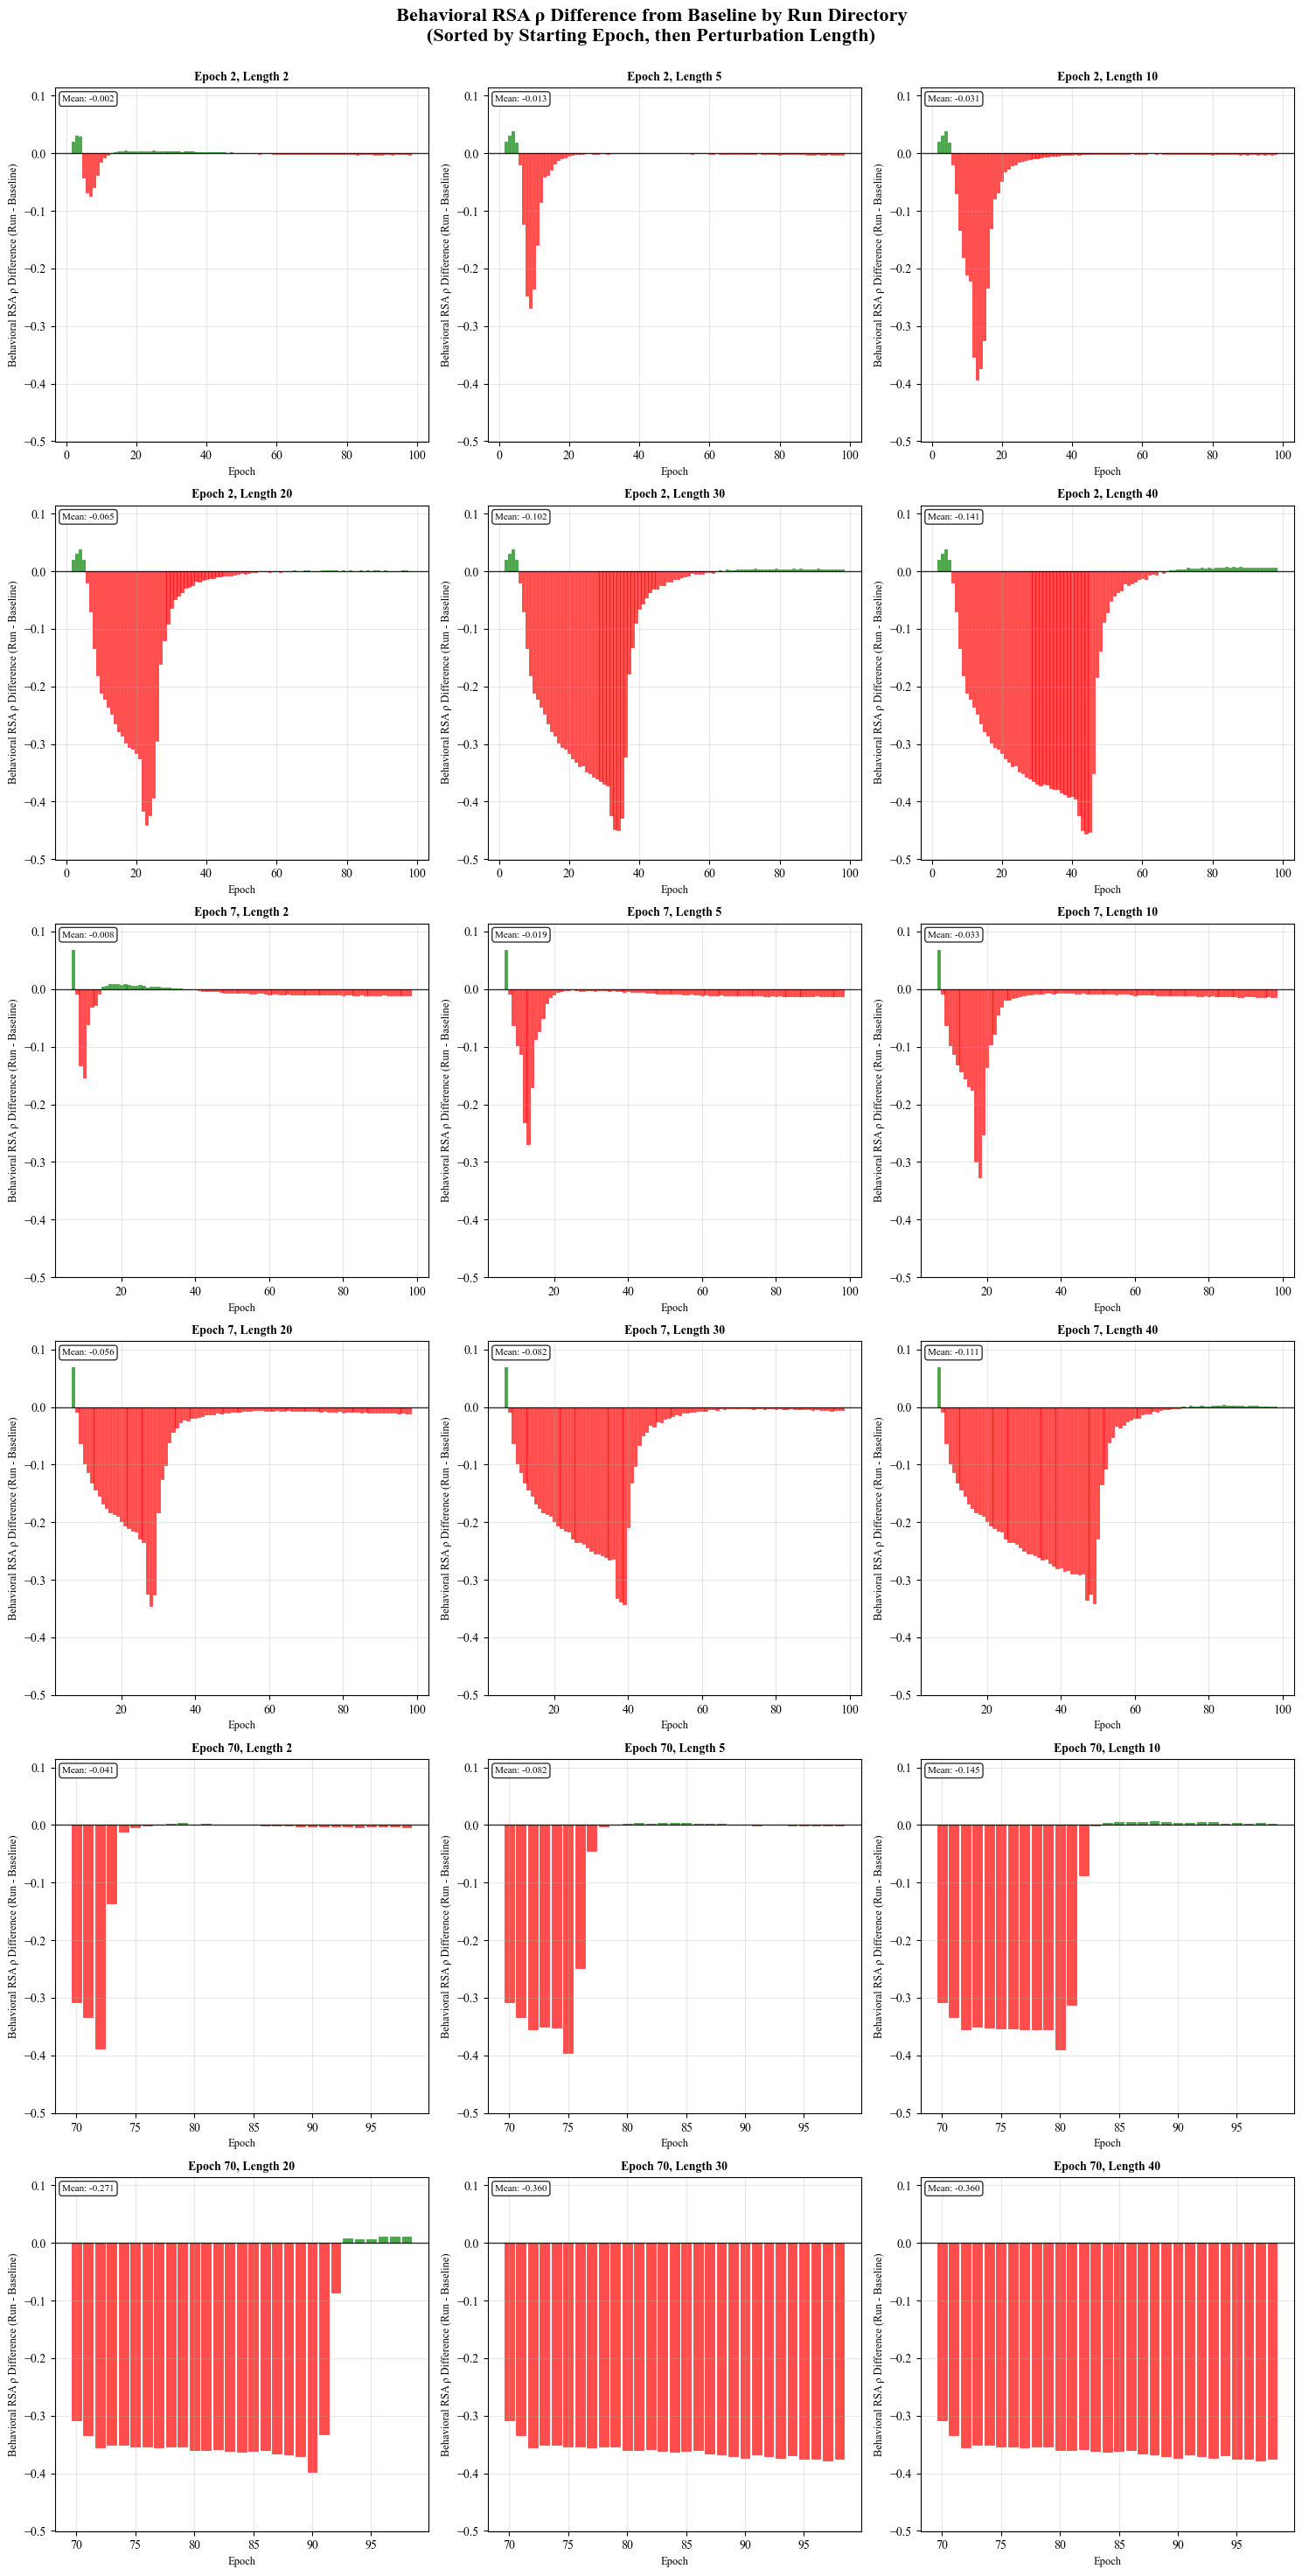


Summary:
Number of run_dir groups: 18
Total data points: 1777
Baseline data points: 98
Global y-axis range: [-0.5005, 0.1143]

Run order (sorted by start epoch, then length):
   1. Epoch 2, Length 2 (random_target_e2_l2)
   2. Epoch 2, Length 5 (random_target_e2_l5)
   3. Epoch 2, Length 10 (random_target_e2_l10)
   4. Epoch 2, Length 20 (random_target_e2_l20)
   5. Epoch 2, Length 30 (random_target_e2_l30)
   6. Epoch 2, Length 40 (random_target_e2_l40)
   7. Epoch 7, Length 2 (random_target_e7_l2)
   8. Epoch 7, Length 5 (random_target_e7_l5)
   9. Epoch 7, Length 10 (random_target_e7_l10)
  10. Epoch 7, Length 20 (random_target_e7_l20)
  11. Epoch 7, Length 30 (random_target_e7_l30)
  12. Epoch 7, Length 40 (random_target_e7_l40)
  13. Epoch 70, Length 2 (random_target_e70_l2)
  14. Epoch 70, Length 5 (random_target_e70_l5)
  15. Epoch 70, Length 10 (random_target_e70_l10)
  16. Epoch 70, Length 20 (random_target_e70_l20)
  17. Epoch 70, Length 30 (random_target_e70_l30)
  18. Epoc

In [82]:
# Plot difference from baseline behavioral_rsa_rho for each run_dir group as separate subplots with bar plots
# Sorted by starting epoch, then by perturbation length

# First, let's check if we have the baseline data and all_perturb_length_data
if 'baseline_df' in locals() and baseline_df is not None and 'all_perturb_length_data' in locals() and not all_perturb_length_data.empty:
    
    # Get unique run_dir values
    unique_run_dirs = all_perturb_length_data['run_dir'].unique()
    
    # Parse run names to extract epoch and length for sorting
    def parse_run_name(run_name):
        """Parse run name like 'random_target_e2_l2' to extract epoch and length"""
        try:
            # Extract epoch and length from run name
            parts = run_name.split('_')
            epoch_part = None
            length_part = None
            
            for part in parts:
                if part.startswith('e') and part[1:].isdigit():
                    epoch_part = int(part[1:])
                elif part.startswith('l') and part[1:].isdigit():
                    length_part = int(part[1:])
            
            return epoch_part, length_part
        except:
            return None, None
    
    # Create sorting data for each run
    run_data_for_sorting = []
    for run_dir in unique_run_dirs:
        start_epoch, length = parse_run_name(run_dir)
        if start_epoch is not None and length is not None:
            run_data_for_sorting.append({
                'run_dir': run_dir,
                'start_epoch': start_epoch,
                'length': length
            })
    
    # Sort by start_epoch first, then by length
    run_data_for_sorting.sort(key=lambda x: (x['start_epoch'], x['length']))
    
    # Extract sorted run_dirs
    sorted_run_dirs = [item['run_dir'] for item in run_data_for_sorting]
    
    # Calculate number of rows and columns for subplots
    n_runs = len(sorted_run_dirs)
    n_cols = 3  # 3 columns
    n_rows = (n_runs + n_cols - 1) // n_cols  # Ceiling division
    
    # Create subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    
    # Flatten axes array for easier indexing
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    axes_flat = axes.flatten()
    
    # First pass: collect all differences to determine global y-axis limits
    all_differences_global = []
    for run_dir in sorted_run_dirs:
        run_data = all_perturb_length_data[all_perturb_length_data['run_dir'] == run_dir]
        for _, row in run_data.iterrows():
            epoch = row['epoch']
            behavioral_rsa_rho = row['behavioral_rsa_rho']
            baseline_at_epoch = baseline_df[baseline_df['epoch'] == epoch]
            if len(baseline_at_epoch) > 0:
                baseline_behavioral_rsa_rho = baseline_at_epoch['behavioral_rsa_rho'].iloc[0]
                difference = behavioral_rsa_rho - baseline_behavioral_rsa_rho  # Run - Baseline, so that if the run has a larger behavioral_rsa_rho than baseline, the difference will be positive
                all_differences_global.append(difference)
    
    # Set global y-axis limits
    if all_differences_global:
        global_min = min(all_differences_global)
        global_max = max(all_differences_global)
        padding = max(abs(global_min), abs(global_max)) * 0.1
        global_ylim = (global_min - padding, global_max + padding)
    else:
        global_ylim = (-0.01, 0.01)
    
    # Process each run_dir in sorted order
    for i, run_dir in enumerate(sorted_run_dirs):
        ax = axes_flat[i]
        
        # Filter data for this run_dir
        run_data = all_perturb_length_data[all_perturb_length_data['run_dir'] == run_dir].copy()
        
        # Sort by epoch to ensure proper ordering
        run_data = run_data.sort_values('epoch')
        
        # Calculate difference from baseline behavioral_rsa_rho for each epoch
        differences = []
        epochs = []
        
        for _, row in run_data.iterrows():
            epoch = row['epoch']
            behavioral_rsa_rho = row['behavioral_rsa_rho']
            
            # Find corresponding baseline behavioral_rsa_rho for this epoch
            baseline_at_epoch = baseline_df[baseline_df['epoch'] == epoch]
            
            if len(baseline_at_epoch) > 0:
                baseline_behavioral_rsa_rho = baseline_at_epoch['behavioral_rsa_rho'].iloc[0]
                difference = behavioral_rsa_rho - baseline_behavioral_rsa_rho  # Run - Baseline
                differences.append(difference)
                epochs.append(epoch)
        
        # Create bar plot
        if differences:  # Only plot if we have data
            bars = ax.bar(epochs, differences, 
                         color='steelblue', 
                         alpha=0.7,
                         edgecolor='navy',
                         linewidth=0.5)
            
            # Color bars based on whether they're positive or negative
            for j, bar in enumerate(bars):
                if differences[j] > 0:
                    bar.set_color('green')  # Better behavioral alignment than baseline
                    bar.set_alpha(0.7)
                else:
                    bar.set_color('red')  # Worse behavioral alignment than baseline
                    bar.set_alpha(0.7)
            
            # Add horizontal line at y=0 to show baseline
            ax.axhline(y=0, color='black', linestyle='-', alpha=0.8, linewidth=1)
            
            # Get epoch and length for title
            start_epoch, length = parse_run_name(run_dir)
            title = f'Epoch {start_epoch}, Length {length}' if start_epoch is not None and length is not None else run_dir
            
            # Customize the subplot
            ax.set_title(title, fontsize=10, fontweight='bold')
            ax.set_xlabel('Epoch', fontsize=9)
            ax.set_ylabel('Behavioral RSA ρ Difference (Run - Baseline)', fontsize=9)
            ax.grid(True, alpha=0.3)
            
            # Set all subplots to use the same y-axis limits for comparison
            ax.set_ylim(global_ylim)
            
            # Add text annotation showing summary stats
            mean_diff = np.mean(differences)
            ax.text(0.02, 0.98, f'Mean: {mean_diff:.3f}', 
                   transform=ax.transAxes, 
                   verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
                   fontsize=8)
    
    # Hide unused subplots
    for i in range(n_runs, len(axes_flat)):
        axes_flat[i].set_visible(False)
    
    # Add overall title
    fig.suptitle('Behavioral RSA ρ Difference from Baseline by Run Directory\n(Sorted by Starting Epoch, then Perturbation Length)', 
                 fontsize=16, fontweight='bold', y=0.98)
    
    # Adjust layout
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    
    # Show the plot
    plt.show()
    
    # Print summary statistics
    print(f"\nSummary:")
    print(f"Number of run_dir groups: {len(sorted_run_dirs)}")
    print(f"Total data points: {len(all_perturb_length_data)}")
    print(f"Baseline data points: {len(baseline_df)}")
    print(f"Global y-axis range: [{global_ylim[0]:.4f}, {global_ylim[1]:.4f}]")
    
    # Print the sorted order for verification
    print("\nRun order (sorted by start epoch, then length):")
    for i, item in enumerate(run_data_for_sorting):
        print(f"  {i+1:2d}. Epoch {item['start_epoch']}, Length {item['length']} ({item['run_dir']})")
    
    # Calculate overall statistics
    all_differences = []
    for run_dir in sorted_run_dirs:
        run_data = all_perturb_length_data[all_perturb_length_data['run_dir'] == run_dir]
        for _, row in run_data.iterrows():
            epoch = row['epoch']
            behavioral_rsa_rho = row['behavioral_rsa_rho']
            baseline_at_epoch = baseline_df[baseline_df['epoch'] == epoch]
            if len(baseline_at_epoch) > 0:
                baseline_behavioral_rsa_rho = baseline_at_epoch['behavioral_rsa_rho'].iloc[0]
                difference = behavioral_rsa_rho - baseline_behavioral_rsa_rho  # Run - Baseline
                all_differences.append(difference)
    
    if all_differences:
        print(f"\nOverall Statistics:")
        print(f"Mean difference: {np.mean(all_differences):.4f}")
        print(f"Std difference: {np.std(all_differences):.4f}")
        print(f"Min difference: {np.min(all_differences):.4f}")
        print(f"Max difference: {np.max(all_differences):.4f}")
        
        # Count positive vs negative differences
        positive_diffs = sum(1 for d in all_differences if d > 0)
        negative_diffs = sum(1 for d in all_differences if d < 0)
        print(f"Positive differences (better behavioral alignment): {positive_diffs}")
        print(f"Negative differences (worse behavioral alignment): {negative_diffs}")
        
        # Print per-run statistics
        print(f"\nPer-run statistics:")
        for item in run_data_for_sorting:
            run_dir = item['run_dir']
            run_data = all_perturb_length_data[all_perturb_length_data['run_dir'] == run_dir]
            run_differences = []
            for _, row in run_data.iterrows():
                epoch = row['epoch']
                behavioral_rsa_rho = row['behavioral_rsa_rho']
                baseline_at_epoch = baseline_df[baseline_df['epoch'] == epoch]
                if len(baseline_at_epoch) > 0:
                    baseline_behavioral_rsa_rho = baseline_at_epoch['behavioral_rsa_rho'].iloc[0]
                    difference = behavioral_rsa_rho - baseline_behavioral_rsa_rho  # Run - Baseline
                    run_differences.append(difference)
            
            if run_differences:
                mean_diff = np.mean(run_differences)
                print(f"  Epoch {item['start_epoch']}, Length {item['length']}: Mean diff = {mean_diff:.4f}, Range = [{np.min(run_differences):.4f}, {np.max(run_differences):.4f}]")

else:
    print("Error: Missing baseline data or all_perturb_length_data")
    if 'baseline_df' not in locals():
        print("  - baseline_df not found")
    elif baseline_df is None:
        print("  - baseline_df is None")
    if 'all_perturb_length_data' not in locals():
        print("  - all_perturb_length_data not found")
    elif all_perturb_length_data.empty:
        print("  - all_perturb_length_data is empty")


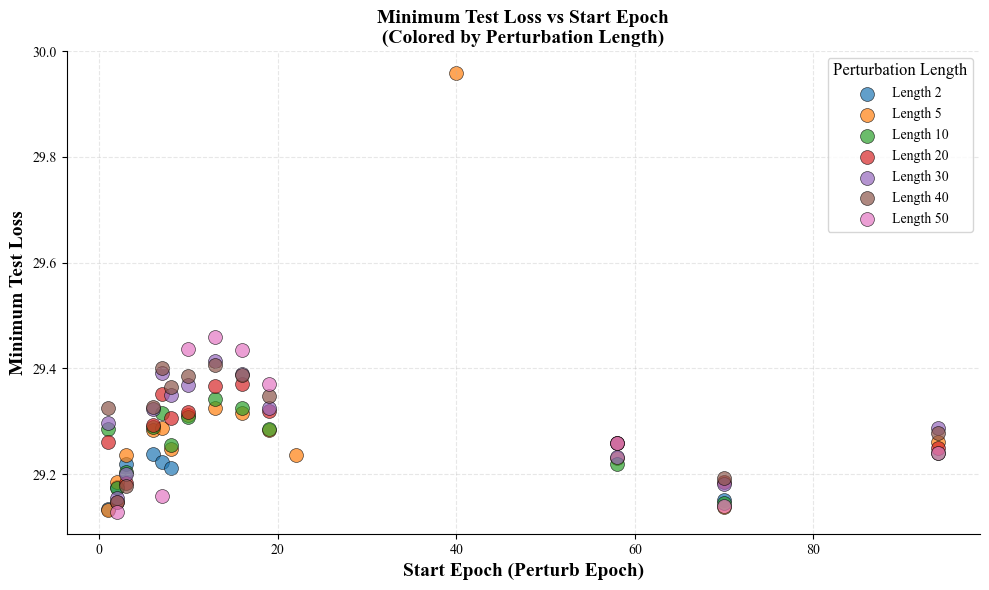

In [69]:
# Extract data for the scatterplot
plot_data = []
for run_info in run_metadata:
    run_name = run_info['run_name']
    start_epoch = run_info['start_epoch']
    length = run_info['length']
    df = run_info['df']
    
    # Get minimum test loss for this run
    if len(df) > 0 and 'test_loss' in df.columns:
        min_test_loss = df['test_loss'].min()
        plot_data.append({
            'start_epoch': start_epoch,
            'min_test_loss': min_test_loss,
            'perturb_length': length,
            'run_name': run_name
        })

# Convert to DataFrame for easier plotting
plot_df = pd.DataFrame(plot_data)

# Alternative: Use discrete colors for each perturbation length
plt.figure(figsize=(10, 6))

# Get unique perturbation lengths and assign colors
unique_lengths = sorted(plot_df['perturb_length'].unique())
colors_map = plt.cm.tab10(np.linspace(0, 1, len(unique_lengths)))

for length in unique_lengths:
    length_data = plot_df[plot_df['perturb_length'] == length]
    plt.scatter(length_data['start_epoch'], 
               length_data['min_test_loss'],
               label=f'Length {length}',
               s=100,
               alpha=0.7,
               edgecolors='black',
               linewidth=0.5)

plt.xlabel('Start Epoch (Perturb Epoch)', fontweight='bold', fontsize=14)
plt.ylabel('Minimum Test Loss', fontweight='bold', fontsize=14)
plt.title('Minimum Test Loss vs Start Epoch\n(Colored by Perturbation Length)', 
          fontweight='bold', fontsize=14)
plt.legend(title='Perturbation Length', fontsize=10, title_fontsize=12)
plt.grid(True, alpha=0.3, linestyle='--')

ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

## Perturbation length experiments neural results